# Projet 4 : Anticipez les besoins en consommation de bâtiments
## Partie 1 : Exploration

### Sommaire
 
**Partie 1 : Importation du jeu de données**
 - <a href="#C1"> 1. Importation des données</a>
 
**Partie 2 : Nettoyage**
 - <a href="#C2"> 2. Nettoyage du jeu de données</a>
     - <a href="#C21"> 2.1 Variables qualitatives </a>
     - <a href="#C22"> 2.2 Variables quantitatives </a>
     - <a href="#C23"> 2.3 Traitement des doublons </a>
         
**Partie 3 : Valeurs manquantes**
 - <a href="#C3"> 3. Traitement des valeurs manquantes</a>
     - <a href="#C31">3.1 Analyse des corrélations</a>
     - <a href="#C32">3.2 Imputations des valeurs manquantes </a>

 
**Partie 4 : Exploration**
 - <a href="#C4">4. Exploration des données </a>
     - <a href="#C41">4.1 Analyses univariées </a>
     - <a href="#C42">4.2 Analyses bivariées </a>
     - <a href="#C43">4.3 Analyses multivariées </a>

**Partie 5 : Feature Engineering**
 - <a href="#C5">5. Feature Engineering </a>
     - <a href="#C51"> 5.1 Categorical encoding </a>
     - <a href="#C52"> 5.2 One-Hot enconding des PropertyUsetype affiné </a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import re
import seaborn as sns
import missingno as msno
import clean #mon module de fontions qui me permettent de nettoyer un dataframe
import plot_

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 7.7 MB/s eta 0:00:00


# <a name="C1"> 1. Importation </a>

In [ ]:
df= pd.read_csv('data_projet4.csv',delimiter = ';',
                skip_blank_lines = True,
                skipinitialspace = True,
                usecols= (lambda x : x not in ['PropertyName',
                                        'Address','ZipCode',
                                               'ListOfAllPropertyUseTypes','PropertyGFABuilding(s)',
                                               #'SecondLargestPropertyUseTypeGFA'
                                               #'FONCTION_2','FONCTION_3',
                                               #'ThirdLargestPropertyUseTypeGFA',
                                               'DataYear',
                                               'YearsENERGYSTARCertified','SourceEUI(kBtu/sf)',
                                               'Comments','City','State',
                                               'SiteEnergyUse(kBtu)', 
                                               #'LargestPropertyUseTypeGFA',
                                               'Electricity(kWh)','SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)',
                                               'NaturalGas(therms)',#'SiteEnergyUseWN(kBtu)',
                                               'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
                                               'SourceEUIWN(kBtu/sf)',
                                               'DefaultData',
                                            ]),
                dtype={'OSEBuildingID' : 'object',      
                       'YearBuilt': 'int64',
                       #'DataYear': 'int64',
                      })


In [ ]:
df.shape

(3376, 27)

OSEBuildingID                      0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
Neighborhood                       0.000000
Latitude                           0.000000
Longitude                          0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.002370
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
LargestPropertyUseType             0.005924
LargestPropertyUseTypeGFA          0.005924
SecondLargestPropertyUseType       0.502666
SecondLargestPropertyUseTypeGFA    0.502666
ThirdLargestPropertyUseType        0.823460
ThirdLargestPropertyUseTypeGFA     0.823460
ENERGYSTARScore                    0.249704
SiteEUIWN(kBtu/sf)                 0.001777
SiteEnergyUseWN(kBtu)              0.001777
SteamUse(kBtu)                     0.002666
Electricity(kBtu)                  0.002666
NaturalGas(kBtu)                

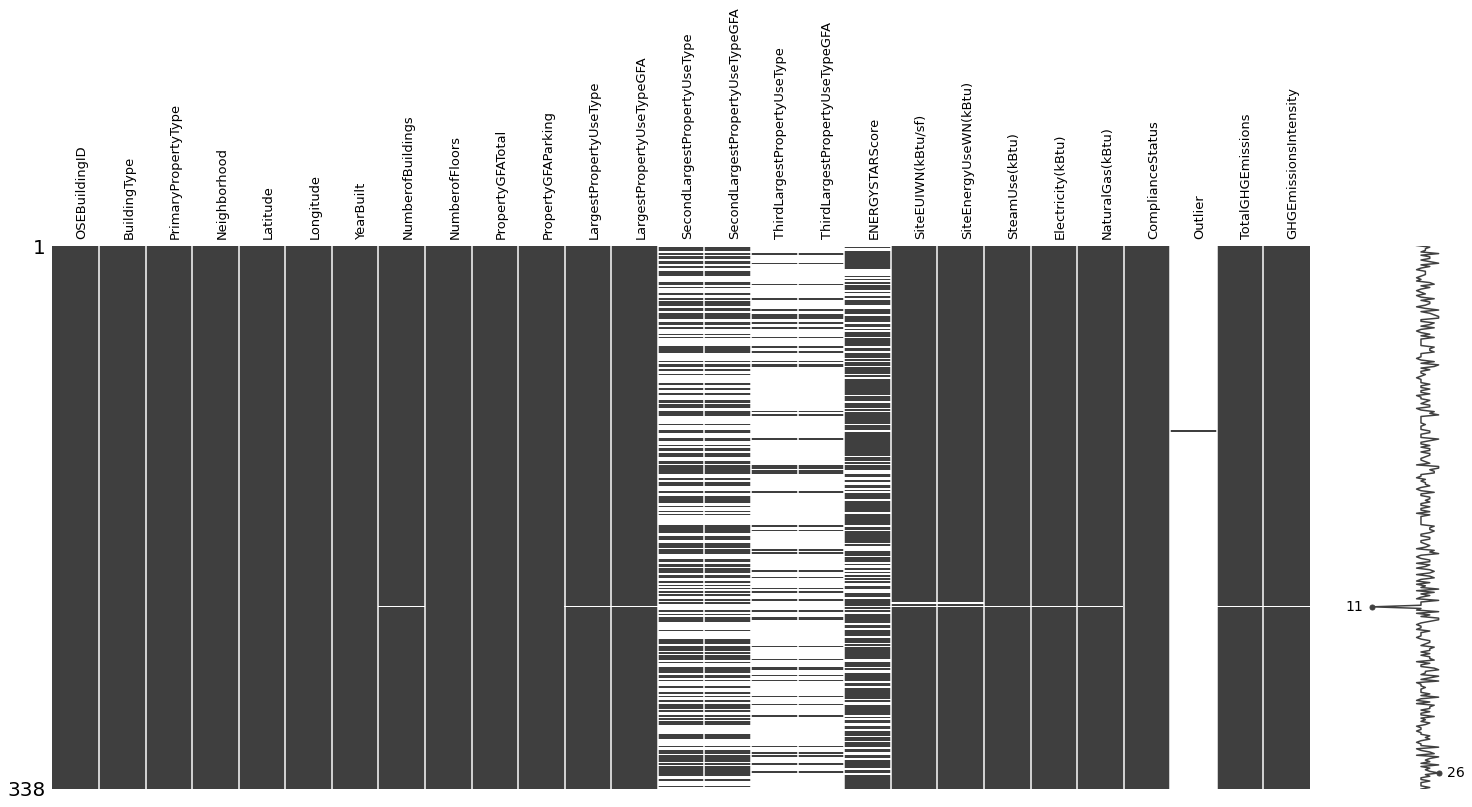

In [ ]:
clean.vm(df,0.1,'P4_N1_1a.png')

In [ ]:
mapping = {'OSEBuildingID' : 'ID', 
           #'DataYear' : 'ANNÉE D\'ENREGISTREMENT', 
           'BuildingType' : 'TYPE', 
           'PrimaryPropertyType': 'FONCTION_1',
           #'LargestPropertyUseType' : 'FONCTION_1',
           'SecondLargestPropertyUseType' : 'FONCTION_2',
           'ThirdLargestPropertyUseType'  : 'FONCTION_3',
           #'PropertyName': 'NOM', 
           #'Address' : 'ADRESSE', 
           #'ZipCode' : 'CODE_POSTAL', 
           'Neighborhood':'QUARTIER',
           'Latitude' : 'LATITUDE', 
           'Longitude':'LONGITUDE', 
           'ComplianceStatus':'CONFORMITE',
           'YearBuilt':'ANNÉE_CONST_REN', 
           'NumberofBuildings':'NBRE_IMMEUBLE',
           'NumberofFloors':'NBRE_ÉTAGE' , 
           'PropertyGFATotal': 'SUPERFICIE_TOTALE',
           'PropertyGFAParking': 'SUPERFICIE_PARKING',
           #'PropertyGFABuilding(s)': 'SUPERFICIE_IMMEUBLE(S)',
           'SteamUse(kBtu)' : 'STEAM(kBtu)',
           'SiteEUIWN(kBtu/sf)': 'INT_CONSOMMATION_ENERG_SITE',
           'SiteEnergyUseWN(kBtu)' : 'CONSOMMATION_ENERG_SITE',
           #'ListOfAllPropertyUseTypes' : 'USAGE(S)' ,
           #'SourceEUI(kBtu/sf)':'INT_CONSOMMATION_ENERG_TOT',
          # 'DefaultData' : 'PARAMÈTRES PAR DEFAULT ?',
           'TotalGHGEmissions' : 'ÉMISSIONS_TOTALES',
           'GHGEmissionsIntensity':'INTENSITÉ_ÉMISSIONS'}

df= df.rename(columns = mapping)

# <a name="C2"> 2. Nettoyage  </a> 

In [ ]:
clean.info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3376 non-null   object 
 1   TYPE                             3376 non-null   object 
 2   FONCTION_1                       3376 non-null   object 
 3   QUARTIER                         3376 non-null   object 
 4   LATITUDE                         3376 non-null   float64
 5   LONGITUDE                        3376 non-null   float64
 6   ANNÉE_CONST_REN                  3376 non-null   int64  
 7   NBRE_IMMEUBLE                    3368 non-null   float64
 8   NBRE_ÉTAGE                       3376 non-null   int64  
 9   SUPERFICIE_TOTALE                3376 non-null   int64  
 10  SUPERFICIE_PARKING               3376 non-null   int64  
 11  LargestPropertyUseType           3356 non-null   object 
 12  LargestPropertyUseTy

## <a name="C21"> 2.1 Variable qualitatives </a>  

In [ ]:
var_qual = df.dtypes[df.dtypes == 'object'].index
var_qual

for var in var_qual:
    df[var] = df[var].str.upper()
    pattern ='\W'
    df[var].replace(pattern, '_', regex=True, inplace = True)
    df[var] = df[var].str.replace('__','_')
    df[var] = df[var].str.replace('_',' ')
    df[var] = df[var].str.strip()

In [ ]:
var_qual

Index(['ID', 'TYPE', 'FONCTION_1', 'QUARTIER', 'LargestPropertyUseType',
       'FONCTION_2', 'FONCTION_3', 'CONFORMITE', 'Outlier'],
      dtype='object')

- ### ID
Vérification que les ID ne soient que des digits
## à compléter

In [ ]:
df[df['ID'].str.contains(r'^\D+',regex= True)]

Empty DataFrame
Columns: [ID, TYPE, FONCTION_1, QUARTIER, LATITUDE, LONGITUDE, ANNÉE_CONST_REN, NBRE_IMMEUBLE, NBRE_ÉTAGE, SUPERFICIE_TOTALE, SUPERFICIE_PARKING, LargestPropertyUseType, LargestPropertyUseTypeGFA, FONCTION_2, SecondLargestPropertyUseTypeGFA, FONCTION_3, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, INT_CONSOMMATION_ENERG_SITE, CONSOMMATION_ENERG_SITE, STEAM(kBtu), Electricity(kBtu), NaturalGas(kBtu), CONFORMITE, Outlier, ÉMISSIONS_TOTALES, INTENSITÉ_ÉMISSIONS]
Index: []

[0 rows x 27 columns]

- ### TYPE
Je supprime les immeubles de type habitation

In [ ]:
df['TYPE'].unique()

array(['NONRESIDENTIAL', 'NONRESIDENTIAL COS', 'MULTIFAMILY MR 5 9',
       'SPS DISTRICT K 12', 'CAMPUS', 'MULTIFAMILY LR 1 4',
       'MULTIFAMILY HR 10', 'NONRESIDENTIAL WA'], dtype=object)

In [ ]:
mapping = {'NONRESIDENTIAL COS':'NONRESIDENTIAL',
       'SPS DISTRICT K 12':'SCHOOLS',  
    'NONRESIDENTIAL WA':'NONRESIDENTIAL'}
df['TYPE'] = df['TYPE'].replace(mapping)

In [ ]:
df = df[~df['TYPE'].str.contains('FAMILY')]
df.shape

(1668, 27)

## Feature engineering, **PROPERTYUSETYPE**, 
## Variable qualitative : création de nouvelles catégories et aggrégation
Vérification que la série FONCTION_PRINCIPALE ne comporte aucun chiffre ou valeurs abbérantes 

In [ ]:
df['FONCTION_1'].unique().tolist()

['HOTEL',
 'OTHER',
 'MIXED USE PROPERTY',
 'K 12 SCHOOL',
 'UNIVERSITY',
 'SMALL AND MID SIZED OFFICE',
 'SELF STORAGE FACILITY',
 'WAREHOUSE',
 'LARGE OFFICE',
 'SENIOR CARE COMMUNITY',
 'MEDICAL OFFICE',
 'RETAIL STORE',
 'HOSPITAL',
 'RESIDENCE HALL',
 'DISTRIBUTION CENTER',
 'WORSHIP FACILITY',
 'SUPERMARKET  GROCERY STORE',
 'LABORATORY',
 'REFRIGERATED WAREHOUSE',
 'RESTAURANT',
 'LOW RISE MULTIFAMILY',
 'OFFICE']

In [ ]:
df[df['FONCTION_1'].str.contains('FAMILY')==True]
df[df['FONCTION_1'].str.contains('RESIDEN')==True]
df[df['FONCTION_1']=='SENIOR CARE COMMUNITY']

ID            TYPE             FONCTION_1              QUARTIER  \
59       84  NONRESIDENTIAL  SENIOR CARE COMMUNITY             SOUTHWEST   
60       85  NONRESIDENTIAL  SENIOR CARE COMMUNITY             NORTHWEST   
171     278  NONRESIDENTIAL  SENIOR CARE COMMUNITY              DOWNTOWN   
888   20145  NONRESIDENTIAL  SENIOR CARE COMMUNITY                  EAST   
966   20377  NONRESIDENTIAL  SENIOR CARE COMMUNITY             SOUTHEAST   
1109  20885  NONRESIDENTIAL  SENIOR CARE COMMUNITY               BALLARD   
1123  20970  NONRESIDENTIAL  SENIOR CARE COMMUNITY             SOUTHEAST   
1208  21244  NONRESIDENTIAL  SENIOR CARE COMMUNITY  MAGNOLIA  QUEEN ANNE   
1418  21741  NONRESIDENTIAL  SENIOR CARE COMMUNITY            LAKE UNION   
1456  21879  NONRESIDENTIAL  SENIOR CARE COMMUNITY             NORTHWEST   
1643  22955  NONRESIDENTIAL  SENIOR CARE COMMUNITY                 NORTH   
2202  24769  NONRESIDENTIAL  SENIOR CARE COMMUNITY                 NORTH   
2467  25737  NONRESIDENTIAL  SENIOR CARE COMMUNITY                  EAST   
2524  25965  NONRESIDENTIAL  SENIOR CARE COMMUNITY                  EAST   
2584  26157  NONRESIDENTIAL  SENIOR CARE COMMUNITY             SOUTHEAST   
2623  26289  NONRESIDENTIAL  SENIOR CARE COMMUNITY             NORTHWEST   
2628  26324  NONRESIDENTIAL  SENIOR CARE COMMUNITY                 NORTH   
2783  26930  NONRESIDENTIAL  SENIOR CARE COMMUNITY               CENTRAL   
3228  49829  NONRESIDENTIAL  SENIOR CARE COMMUNITY               CENTRAL   
3267  49945  NONRESIDENTIAL  SENIOR CARE COMMUNITY              DOWNTOWN   

      LATITUDE  LONGITUDE  ANNÉE_CONST_REN  NBRE_IMMEUBLE  NBRE_ÉTAGE  \
59    47.55837 -122.37751             1922            1.0           5   
60    47.72426 -122.35599             1970            1.0           2   
171   47.59626 -122.32180             1999            1.0           5   
888   47.60897 -122.32507             2006            1.0           6   
966   47.57188 -122.29531             1981            1.0           3   
1109  47.69875 -122.36725             1966            1.0           2   
1123  47.55387 -122.27875             1966            1.0           2   
1208  47.64410 -122.34795             1970            1.0           2   
1418  47.61935 -122.33389             2006            1.0          14   
1456  47.72618 -122.35642             1954            1.0           2   
1643  47.71069 -122.32674             1998            1.0           5   
2202  47.70178 -122.32352             2009            1.0           6   
2467  47.61318 -122.32747             1969            1.0           6   
2524  47.63429 -122.27652             1963            1.0          16   
2584  47.53515 -122.26556             1967            1.0           1   
2623  47.66312 -122.35311             1961            1.0           2   
2628  47.70883 -122.28887             1954            1.0           1   
2783  47.60133 -122.31088             1987            1.0           2   
3228  47.61885 -122.30341             2013            1.0           6   
3267  47.60898 -122.34213             1989            1.0           3   

      SUPERFICIE_TOTALE  ...  ENERGYSTARScore INT_CONSOMMATION_ENERG_SITE  \
59               217603  ...             54.0                  153.699997   
60                93397  ...              1.0                  181.600006   
171              102796  ...              NaN                  100.000000   
888               62334  ...            100.0                   22.299999   
966               78374  ...             98.0                   57.900002   
1109              34636  ...              3.0                  355.700012   
1123              48882  ...             51.0                  168.100006   
1208              46539  ...             73.0                  120.099998   
1418             724148  ...              8.0                   53.900002   
1456              51298  ...             85.0                  114.000000   
1643              43661  ...   

In [ ]:
df = df[~(df['FONCTION_1'].str.contains('FAMILY')==True)]
df = df[~(df['FONCTION_1'].str.contains('RESIDEN')==True)]
df = df[~(df['FONCTION_1']=='SENIOR CARE COMMUNITY')]

In [ ]:
df.shape

(1624, 27)

In [ ]:
df = df.reset_index(drop = True)
df

ID            TYPE          FONCTION_1              QUARTIER  \
0         1  NONRESIDENTIAL               HOTEL              DOWNTOWN   
1         2  NONRESIDENTIAL               HOTEL              DOWNTOWN   
2         3  NONRESIDENTIAL               HOTEL              DOWNTOWN   
3         5  NONRESIDENTIAL               HOTEL              DOWNTOWN   
4         8  NONRESIDENTIAL               HOTEL              DOWNTOWN   
...     ...             ...                 ...                   ...   
1619  50222  NONRESIDENTIAL              OFFICE      GREATER DUWAMISH   
1620  50223  NONRESIDENTIAL               OTHER              DOWNTOWN   
1621  50224  NONRESIDENTIAL               OTHER  MAGNOLIA  QUEEN ANNE   
1622  50225  NONRESIDENTIAL  MIXED USE PROPERTY      GREATER DUWAMISH   
1623  50226  NONRESIDENTIAL  MIXED USE PROPERTY      GREATER DUWAMISH   

      LATITUDE  LONGITUDE  ANNÉE_CONST_REN  NBRE_IMMEUBLE  NBRE_ÉTAGE  \
0     47.61220 -122.33799             1927            1.0          12   
1     47.61317 -122.33393             1996            1.0          11   
2     47.61393 -122.33810             1969            1.0          41   
3     47.61412 -122.33664             1926            1.0          10   
4     47.61375 -122.34047             1980            1.0          18   
...        ...        ...              ...            ...         ...   
1619  47.56722 -122.31154             1990            1.0           1   
1620  47.59625 -122.32283             2004            1.0           1   
1621  47.63644 -122.35784             1974            1.0           1   
1622  47.52832 -122.32431             1989            1.0           1   
1623  47.53939 -122.29536             1938            1.0           1   

      SUPERFICIE_TOTALE  ...  ENERGYSTARScore INT_CONSOMMATION_ENERG_SITE  \
0                 88434  ...             60.0                   84.300003   
1                103566  ...             61.0                   97.900002   
2                956110  ...             43.0                   97.699997   
3                 61320  ...             56.0                  113.300003   
4                175580  ...             75.0                  118.699997   
...                 ...  ...              ...                         ...   
1619              12294  ...             46.0                   76.699997   
1620              16000  ...              NaN                   65.900002   
1621              13157  ...              NaN                  460.100006   
1622              14101  ...              NaN                   55.500000   
1623              18258  ...              NaN                   70.900002   

      CONSOMMATION_ENERG_SITE  STEAM(kBtu)  Electricity(kBtu)  \
0                7.456910e+06   2003882.00       3.946027e+06   
1                8.664479e+06         0.00       3.242851e+06   
2                7.393711e+07  21566554.00       4.952666e+07   
3                6.946800e+06   2214446.25       2.768924e+06   
4                1.465650e+07         0.00       5.368607e+06   
...                       ...          ...                ...   
1619             9.430032e+05         0.00       5.242709e+05   
1620             1.053706e+06         0.00       3.965461e+05   
1621             6.053764e+06         0.00       1.792159e+06   
1622             7.828413e+05         0.00       3.488702e+05   
1623             1.293722e+06         0.00       4.325542e+05   

     NaturalGas(kBtu)                   CONFORMITE  Outlier  \
0        1.276453e+06                    COMPLIANT      NaN   
1        5.145082e+06                    COMPLIANT      NaN   
2        1.493800e+06                    COMPLIANT      NaN   
3        1.811213e+06                    COMPLIANT      NaN   
4        8.803998e+06                    COMPLIANT      NaN   
...               ...                          ...      ...   
1619     3.254750e+05  ERROR  CORRECT DEFAULT DATA      NaN   
1620     5.537300e+05                    COMP

In [ ]:
df.loc[(df['LargestPropertyUseType'].str.contains('FAMILY') == True) | 
      (df['LargestPropertyUseType'].str.contains('RESIDEN') == True) ]

ID            TYPE          FONCTION_1              QUARTIER  \
110     180  NONRESIDENTIAL               OTHER      GREATER DUWAMISH   
160     264  NONRESIDENTIAL  MIXED USE PROPERTY  MAGNOLIA  QUEEN ANNE   
812   21122  NONRESIDENTIAL  MIXED USE PROPERTY            LAKE UNION   
835   21216  NONRESIDENTIAL               OTHER             NORTHWEST   
1074  23562  NONRESIDENTIAL  MIXED USE PROPERTY              DOWNTOWN   
1104  23863  NONRESIDENTIAL               OTHER      GREATER DUWAMISH   
1294  25222  NONRESIDENTIAL  MIXED USE PROPERTY              DOWNTOWN   
1315  25522  NONRESIDENTIAL  MIXED USE PROPERTY             NORTHEAST   
1321  25546  NONRESIDENTIAL  MIXED USE PROPERTY              DOWNTOWN   
1412  26711  NONRESIDENTIAL               OTHER              DOWNTOWN   
1424  26834  NONRESIDENTIAL  MIXED USE PROPERTY              DOWNTOWN   
1430  26905  NONRESIDENTIAL               OTHER             NORTHEAST   
1483  27816  NONRESIDENTIAL               OTHER               CENTRAL   
1489  27838  NONRESIDENTIAL  MIXED USE PROPERTY                  EAST   
1501  27969  NONRESIDENTIAL  MIXED USE PROPERTY               CENTRAL   
1514  29170  NONRESIDENTIAL  MIXED USE PROPERTY                  EAST   

       LATITUDE   LONGITUDE  ANNÉE_CONST_REN  NBRE_IMMEUBLE  NBRE_ÉTAGE  \
110   47.537220 -122.284000             2009            1.0           5   
160   47.623900 -122.357560             2002            1.0           4   
812   47.650200 -122.349590             2001            5.0           3   
835   47.722990 -122.342930             1970            1.0           4   
1074  47.601950 -122.335160             1913            1.0           3   
1104  47.595490 -122.325380             1992            1.0           3   
1294  47.613760 -122.334450             2009            1.0          39   
1315  47.668270 -122.299780             1997            1.0           4   
1321  47.600500 -122.335140             2005            0.0           5   
1412  47.600550 -122.330570             1904            1.0           6   
1424  47.597690 -122.325370             1909            1.0           3   
1430  47.661920 -122.309980             1924            1.0           3   
1483  47.617960 -122.308470             1911            1.0           3   
1489  47.615540 -122.310980             1998            1.0           5   
1501  47.616080 -122.309670             2004            1.0           6   
1514  47.599016 -122.331508             1900            1.0           3   

      SUPERFICIE_TOTALE  ...  ENERGYSTARScore INT_CONSOMMATION_ENERG_SITE  \
110               89821  ...              NaN                   25.000000   
160              110785  ...              NaN                   98.099998   
812               41827  ...              NaN                  102.500000   
835               25557  ...              NaN                   89.199997   
1074              43878  ...              NaN                   23.400000   
1104              47836  ...              NaN                   84.199997   
1294            1074552  ...             65.0                   43.799999   
1315              32282  ...              NaN                   59.299999   
1321              57600  ...              NaN                  145.399994   
1412              29820  ...              NaN                   54.500000   
1424              20620  ...              NaN                   38.400002   
1430              20686  ...              NaN                   63.900002   
1483              25200  ...              NaN                   55.799999   
1489              53034  ...             93.0                   95.699997   
1501              97229  ...            100.0                   17.000000   
1514              22168  ...              NaN                   85.900002   

      CONSOMMATION_ENERG_SITE STEAM(kBtu)  Electricity(kBtu) NaturalGas(kBtu)  \
110              2.220796e+06         0.0            67462.0        1882631.0   
160              1.

In [ ]:
ind = df.loc[(df['LargestPropertyUseType'].str.contains('FAMILY') == True) | 
      (df['LargestPropertyUseType'].str.contains('RESIDEN') == True) ].index

df = df.drop(ind)
df = df.reset_index(drop = True)
df.head()

ID            TYPE FONCTION_1  QUARTIER  LATITUDE  LONGITUDE  \
0  1  NONRESIDENTIAL      HOTEL  DOWNTOWN  47.61220 -122.33799   
1  2  NONRESIDENTIAL      HOTEL  DOWNTOWN  47.61317 -122.33393   
2  3  NONRESIDENTIAL      HOTEL  DOWNTOWN  47.61393 -122.33810   
3  5  NONRESIDENTIAL      HOTEL  DOWNTOWN  47.61412 -122.33664   
4  8  NONRESIDENTIAL      HOTEL  DOWNTOWN  47.61375 -122.34047   

   ANNÉE_CONST_REN  NBRE_IMMEUBLE  NBRE_ÉTAGE  SUPERFICIE_TOTALE  ...  \
0             1927            1.0          12              88434  ...   
1             1996            1.0          11             103566  ...   
2             1969            1.0          41             956110  ...   
3             1926            1.0          10              61320  ...   
4             1980            1.0          18             175580  ...   

   ENERGYSTARScore INT_CONSOMMATION_ENERG_SITE  CONSOMMATION_ENERG_SITE  \
0             60.0                   84.300003                7456910.0   
1             61.0                   97.900002                8664479.0   
2             43.0                   97.699997               73937112.0   
3             56.0                  113.300003                6946800.5   
4             75.0                  118.699997               14656503.0   

   STEAM(kBtu)  Electricity(kBtu) NaturalGas(kBtu)  CONFORMITE  Outlier  \
0   2003882.00          3946027.0        1276453.0   COMPLIANT      NaN   
1         0.00          3242851.0        5145082.0   COMPLIANT      NaN   
2  21566554.00         49526664.0        1493800.0   COMPLIANT      NaN   
3   2214446.25          2768924.0        1811213.0   COMPLIANT      NaN   
4         0.00          5368607.0        8803998.0   COMPLIANT      NaN   

   ÉMISSIONS_TOTALES  INTENSITÉ_ÉMISSIONS  
0             249.98                 2.83  
1             295.86                 2.86  
2            2089.28                 2.19  
3             286.43                 4.67  
4             505.01                 2.88  

[5 rows x 27 columns]

In [ ]:
ind = df.loc[(df['FONCTION_2'].str.contains('FAMILY') == True) | 
      (df['FONCTION_2'].str.contains('RESIDEN') == True) |
             (df['FONCTION_2'].str.contains('LODGING') == True)].index

df = df.drop(ind)
df = df.reset_index(drop = True)
df.head()

ID            TYPE FONCTION_1  QUARTIER  LATITUDE  LONGITUDE  \
0  1  NONRESIDENTIAL      HOTEL  DOWNTOWN  47.61220 -122.33799   
1  2  NONRESIDENTIAL      HOTEL  DOWNTOWN  47.61317 -122.33393   
2  3  NONRESIDENTIAL      HOTEL  DOWNTOWN  47.61393 -122.33810   
3  5  NONRESIDENTIAL      HOTEL  DOWNTOWN  47.61412 -122.33664   
4  8  NONRESIDENTIAL      HOTEL  DOWNTOWN  47.61375 -122.34047   

   ANNÉE_CONST_REN  NBRE_IMMEUBLE  NBRE_ÉTAGE  SUPERFICIE_TOTALE  ...  \
0             1927            1.0          12              88434  ...   
1             1996            1.0          11             103566  ...   
2             1969            1.0          41             956110  ...   
3             1926            1.0          10              61320  ...   
4             1980            1.0          18             175580  ...   

   ENERGYSTARScore INT_CONSOMMATION_ENERG_SITE  CONSOMMATION_ENERG_SITE  \
0             60.0                   84.300003                7456910.0   
1             61.0                   97.900002                8664479.0   
2             43.0                   97.699997               73937112.0   
3             56.0                  113.300003                6946800.5   
4             75.0                  118.699997               14656503.0   

   STEAM(kBtu)  Electricity(kBtu) NaturalGas(kBtu)  CONFORMITE  Outlier  \
0   2003882.00          3946027.0        1276453.0   COMPLIANT      NaN   
1         0.00          3242851.0        5145082.0   COMPLIANT      NaN   
2  21566554.00         49526664.0        1493800.0   COMPLIANT      NaN   
3   2214446.25          2768924.0        1811213.0   COMPLIANT      NaN   
4         0.00          5368607.0        8803998.0   COMPLIANT      NaN   

   ÉMISSIONS_TOTALES  INTENSITÉ_ÉMISSIONS  
0             249.98                 2.83  
1             295.86                 2.86  
2            2089.28                 2.19  
3             286.43                 4.67  
4             505.01                 2.88  

[5 rows x 27 columns]

In [ ]:
#df = df.drop(columns = 'LargestPropertyUseType')
ind= df[df['LargestPropertyUseType'] == 'PRISON INCARCERATION'].index
df = df.drop(ind)
#En supposant que la prison est un lieu d'habitation 

In [ ]:
df[df['LargestPropertyUseType'].isna()]

ID            TYPE                  FONCTION_1    QUARTIER  LATITUDE  \
339     496  NONRESIDENTIAL       SELF STORAGE FACILITY     BALLARD  47.66838   
557     773  NONRESIDENTIAL  SMALL AND MID SIZED OFFICE    DOWNTOWN  47.60380   
797   21103  NONRESIDENTIAL                       HOTEL    DOWNTOWN  47.61203   
1308  25568  NONRESIDENTIAL  SMALL AND MID SIZED OFFICE  LAKE UNION  47.64747   
1325  25711  NONRESIDENTIAL                  RESTAURANT    DOWNTOWN  47.59697   
1373  26532  NONRESIDENTIAL          MIXED USE PROPERTY   NORTHEAST  47.66182   

      LONGITUDE  ANNÉE_CONST_REN  NBRE_IMMEUBLE  NBRE_ÉTAGE  \
339  -122.39310             1946            2.0           2   
557  -122.33293             1924            NaN           4   
797  -122.34165             1910            1.0           8   
1308 -122.34086             2008            1.0           4   
1325 -122.32474             1913            1.0           3   
1373 -122.31345             1928            NaN           2   

      SUPERFICIE_TOTALE  ...  ENERGYSTARScore INT_CONSOMMATION_ENERG_SITE  \
339              111445  ...              NaN                   51.000000   
557               63150  ...              NaN                         NaN   
797               61721  ...             93.0                   53.500000   
1308              48350  ...             45.0                   74.699997   
1325              28800  ...              NaN                   32.500000   
1373              20760  ...              NaN                         NaN   

      CONSOMMATION_ENERG_SITE STEAM(kBtu)  Electricity(kBtu) NaturalGas(kBtu)  \
339              6.076957e+06         0.0          3007514.0        2689958.0   
557                       NaN         NaN                NaN              NaN   
797              2.968430e+06         0.0          2534592.0         362488.0   
1308             3.280956e+06         0.0          3168131.0              0.0   
1325             9.358332e+05         0.0           402907.0         497017.0   
1373                      NaN         NaN                NaN              NaN   

         CONFORMITE  Outlier  ÉMISSIONS_TOTALES  INTENSITÉ_ÉMISSIONS  
339       COMPLIANT      NaN             163.83                 1.47  
557   NON COMPLIANT      NaN                NaN                  NaN  
797       COMPLIANT      NaN              36.92                 0.60  
1308      COMPLIANT      NaN              22.09                 0.46  
1325      COMPLIANT      NaN              29.21                 1.01  
1373  NON COMPLIANT      NaN                NaN                  NaN  

[6 rows x 27 columns]

In [ ]:
pd.crosstab(df['LargestPropertyUseType'], df['FONCTION_1'])

FONCTION_1                                        DISTRIBUTION CENTER  \
LargestPropertyUseType                                                  
ADULT EDUCATION                                                     0   
AUTOMOBILE DEALERSHIP                                               0   
BANK BRANCH                                                         0   
COLLEGE UNIVERSITY                                                  0   
CONVENTION CENTER                                                   0   
COURTHOUSE                                                          0   
DATA CENTER                                                         0   
DISTRIBUTION CENTER                                                53   
FINANCIAL OFFICE                                                    0   
FIRE STATION                                                        0   
FITNESS CENTER HEALTH CLUB GYM                                      0   
FOOD SERVICE                                                        0   
HOSPITAL GENERAL MEDICAL  SURGICAL                                  0   
HOTEL                                                               0   
K 12 SCHOOL                                                         0   
LABORATORY                                                          0   
LIBRARY                                                             0   
LIFESTYLE CENTER                                                    0   
MANUFACTURING INDUSTRIAL PLANT                                      0   
MEDICAL OFFICE                                                      0   
MOVIE THEATER                                                       0   
MUSEUM                                                              0   
NON REFRIGERATED WAREHOUSE                                          0   
OFFICE                                                              0   
OTHER                                                               0   
OTHER  EDUCATION                                                    0   
OTHER  ENTERTAINMENT PUBLIC ASSEMBLY                                0   
OTHER  MALL                                                         0   
OTHER  PUBLIC SERVICES                                              0   
OTHER  RECREATION                                                   0   
OTHER  RESTAURANT BAR                                               0   
OTHER  SERVICES                                                     0   
OTHER  UTILITY                                                      0   
OTHER SPECIALTY HOSPITAL                                            0   
PARKING                                                             0   
PERFORMING ARTS                                                     0   
PERSONAL SERVICES HEALTH BEAUTY DRY CLEANING ETC                    0   
POLICE STATION                                                      0   
PRE SCHOOL DAYCARE                                                  0   
REFRIGERATED WAREHOUSE                                              0   
REPAIR SERVICES VEHICLE SHOE LOCKSMITH ETC                          0   
RESTAURANT                                                          0   
RETAIL STORE                                                        0   
SELF STORAGE FACILITY                                               0   
SOCIAL MEETING HALL                                                 0   
STRIP MALL                                                          0   
SUPERMARKET GROCERY STORE                                           0   
URGENT CARE CLINIC OTHER OUTPATIENT                                 0   
WHOLESALE CLUB SUPERCENTER                                          0   
WORSHIP FACILITY                                                    0   

FONCTION_1                                        HOSPITAL  HOTEL  \
LargestPropertyUseType                                              
ADULT EDUCATION                                          0      0

In [ ]:
df[(df['LargestPropertyUseType']== 'FOOD SERVICE') ]
ind = df[df['LargestPropertyUseType']== 'FOOD SERVICE'].index
#Un seul individu, je supprime ce cas très particulier
df = df.drop(ind) 

## Création de nouvelles catégories et aggrégation

Text(0, 0.5, "Consommation d'énergie au sf")

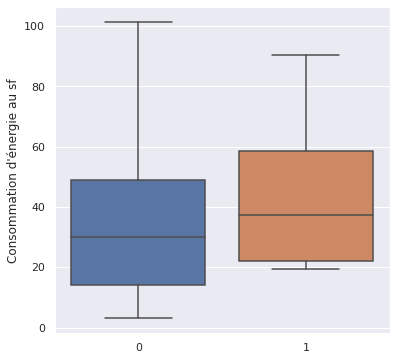

In [ ]:
sns.set()
fig, ax  = plt.subplots(figsize=(6,6))
sns.set()
sns.boxplot(data = [df[df['FONCTION_1']=='WAREHOUSE'].INT_CONSOMMATION_ENERG_SITE, 
                     df[df['LargestPropertyUseType']== 'AUTOMOBILE DEALERSHIP'].INT_CONSOMMATION_ENERG_SITE], 
            ax = ax, showfliers = False)
ax.set_ylabel('Consommation d\'énergie au sf')
#ax.set_xtickslabel('')

Text(0, 0.5, "Consommation d'énergie au sf")

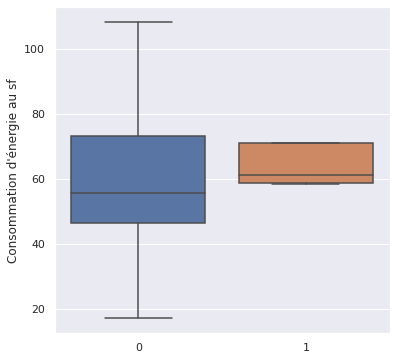

In [ ]:
fig, ax  = plt.subplots(figsize=(6,6))
sns.set()
sns.boxplot(data = [df[df['FONCTION_1']=='LARGE OFFICE'].INT_CONSOMMATION_ENERG_SITE, 
                     df[df['LargestPropertyUseType']== 'BANK BRANCH'].INT_CONSOMMATION_ENERG_SITE], 
            ax = ax, showfliers = False)
ax.set_ylabel('Consommation d\'énergie au sf')
#ax.set_xtickslabel('')

Text(0, 0.5, "Consommation d'énergie au sf")

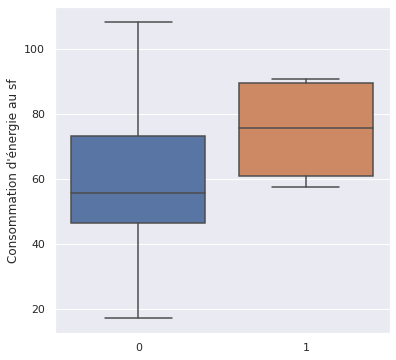

In [ ]:
fig, ax  = plt.subplots(figsize=(6,6))
sns.set()
sns.boxplot(data = [df[df['FONCTION_1']=='LARGE OFFICE'].INT_CONSOMMATION_ENERG_SITE, 
                     df[df['LargestPropertyUseType']== 'FINANCIAL OFFICE'].INT_CONSOMMATION_ENERG_SITE], 
            ax = ax, showfliers = False)
ax.set_ylabel('Consommation d\'énergie au sf')
#ax.set_xtickslabel('')

Text(0, 0.5, "Consommation d'énergie au sf")

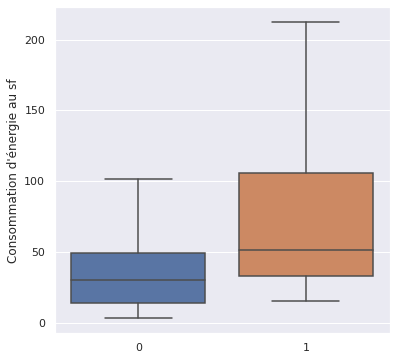

In [ ]:
fig, ax  = plt.subplots(figsize=(6,6))
sns.set()
sns.boxplot(data = [df[df['FONCTION_1']=='WAREHOUSE'].INT_CONSOMMATION_ENERG_SITE, 
                     df[df['FONCTION_1']=='REFRIGERATED WAREHOUSE'].INT_CONSOMMATION_ENERG_SITE], 
            ax = ax, showfliers = False)
ax.set_ylabel('Consommation d\'énergie au sf')
#ax.set_xtickslabel('')

Text(0, 0.5, "Consommation d'énergie au sf")

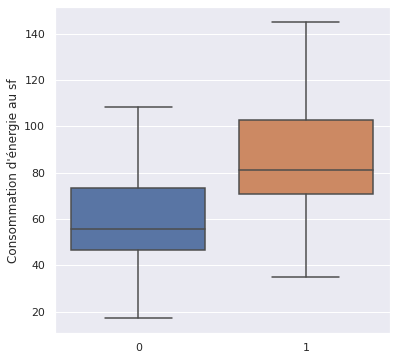

In [ ]:
fig, ax  = plt.subplots(figsize=(6,6))
sns.set()
sns.boxplot(data = [df[df['FONCTION_1']=='LARGE OFFICE'].INT_CONSOMMATION_ENERG_SITE, 
                     df[df['FONCTION_1']=='MEDICAL OFFICE'].INT_CONSOMMATION_ENERG_SITE], 
            ax = ax, showfliers = False)
ax.set_ylabel('Consommation d\'énergie au sf')
#ax.set_xtickslabel('')

Je choisi de grouper tous les bureaux

<Axes: >

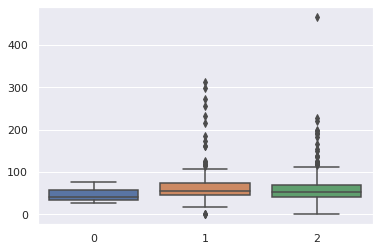

In [ ]:
sns.set()
sns.boxplot(data= [df[df['FONCTION_1']=='OFFICE'].INT_CONSOMMATION_ENERG_SITE,
            df[df['FONCTION_1']=='LARGE OFFICE'].INT_CONSOMMATION_ENERG_SITE,
            df[df['FONCTION_1']=='SMALL AND MID SIZED OFFICE'].INT_CONSOMMATION_ENERG_SITE]
           )

In [ ]:
mapping = {'HOSPITAL GENERAL MEDICAL  SURGICAL' : 'HOSPITAL',
           'OTHER SPECIALTY HOSPITAL':'HOSPITAL',
           'ADULT EDUCATION' : 'UNIVERSITY',
           'OTHER  EDUCATION' : 'SCHOOL',
         'COLLEGE UNIVERSITY': 'UNIVERSITY', 
          'BANK BRANCH': 'OFFICE',
          'FINANCIAL OFFICE' : 'OFFICE',
           'MEDICAL OFFICE':'OFFICE',
           'LARGE OFFICE' : 'OFFICE',
           'SMALL AND MID SIZED OFFICE':'OFFICE',
           'PRE SCHOOL DAYCARE' : 'SCHOOL',
           'K 12 SCHOOL': 'SCHOOL',
          'AUTOMOBILE DEALERSHIP' : 'WAREHOUSE',
           'DISTRIBUTION CENTER':'WAREHOUSE',
           'SELF STORAGE FACILITY':'WAREHOUSE',    
          'NON REFRIGERATED WAREHOUSE': 'WAREHOUSE',
          'FITNESS CENTER HEALTH CLUB GYM':'GYM/LIFESTYLE',
          'LIFESTYLE CENTER' : 'GYM/LIFESTYLE',
          'MANUFACTURING INDUSTRIAL PLANT': 'INDUSTRIAL PLANTS',
          'URGENT CARE CLINIC OTHER OUTPATIENT':'HOSPITAL',
          'STRIP MALL':'MALL',
          'PERSONAL SERVICES HEALTH BEAUTY DRY CLEANING ETC':'MALL',
          'WHOLESALE CLUB SUPERCENTER' : 'MALL',
           'REPAIR SERVICES VEHICLE SHOE LOCKSMITH ETC':'MALL',
           'OTHER  MALL': 'MALL',
           'RESTAURANT':'BAR & RESTAURANT',
           'OTHER  RESTAURANT BAR': 'BAR & RESTAURANT',
           'PERFORMING ARTS':'RECREATION & CULTURE' ,
           'OTHER  ENTERTAINMENT PUBLIC ASSEMBLY':'RECREATION & CULTURE',
           'PERFORMING ARTS':'RECREATION & CULTURE',
           'MOVIE THEATER':'RECREATION & CULTURE',
           'MUSEUM' : 'RECREATION & CULTURE',
           'OTHER  RECREATION':'RECREATION & CULTURE',
           'OTHER  PUBLIC SERVICES': 'PUBLIC SERVICES', 
           'COURTHOUSE':'PUBLIC SERVICES', 
           'POLICE STATION':'PUBLIC SERVICES' ,
           'FIRE STATION':'PUBLIC SERVICES',
           'LIBRARY':'PUBLIC SERVICES' ,
           'SOCIAL MEETING HALL':'CONVENTION CENTERS',
           'CONVENTION CENTER':'CONVENTION CENTERS',
           'OTHER  UTILITY' : 'OTHER',
           'OTHER  SERVICES':'OTHER' ,
           'FOOD SERVICE' : 'RESTAURANT',
           'VOCATIONAL SCHOOL':'SCHOOL',
           'ENCLOSED MALL':'MALL',
           'CONVENIENCE STORE WITHOUT GAS STATION':'SUPERMARKET GROCERY STORE',
           'SWIMMING POOL':'RECREATION & CULTURE',
           'BAR NIGHTCLUB': 'BAR & RESTAURANT',
           'FOOD SALES':'SUPERMARKET GROCERY STORE',
           'OTHER  TECHNOLOGY SCIENCE' : 'LABORATORY',
           'SUPERMARKET GROCERY STORE':'RETAIL STORE',
           'FAST FOOD RESTAURANT':'BAR & RESTAURANT',
           'MULTIFAMILY HOUSING':'OTHER'
           
          }


In [ ]:
df.loc[~df['LargestPropertyUseType'].isna(),'FONCTION_1'] = df.loc[~df['LargestPropertyUseType'].isna(),'LargestPropertyUseType']

In [ ]:
df['FONCTION_2'].unique()

array([nan, 'PARKING', 'OFFICE', 'RESTAURANT', 'K 12 SCHOOL',
       'LABORATORY', 'REFRIGERATED WAREHOUSE',
       'NON REFRIGERATED WAREHOUSE', 'OTHER  EDUCATION',
       'VOCATIONAL SCHOOL', 'RETAIL STORE',
       'PERSONAL SERVICES HEALTH BEAUTY DRY CLEANING ETC',
       'OTHER  ENTERTAINMENT PUBLIC ASSEMBLY', 'DATA CENTER',
       'SWIMMING POOL', 'OTHER', 'COURTHOUSE', 'DISTRIBUTION CENTER',
       'SELF STORAGE FACILITY', 'OTHER  SERVICES', 'MOVIE THEATER',
       'OTHER  RECREATION', 'CONVENIENCE STORE WITHOUT GAS STATION',
       'PERFORMING ARTS', 'COLLEGE UNIVERSITY',
       'SUPERMARKET GROCERY STORE', 'OTHER  RESTAURANT BAR',
       'ADULT EDUCATION', 'MEDICAL OFFICE', 'ENCLOSED MALL',
       'BAR NIGHTCLUB', 'FINANCIAL OFFICE',
       'REPAIR SERVICES VEHICLE SHOE LOCKSMITH ETC',
       'MANUFACTURING INDUSTRIAL PLANT', 'BANK BRANCH',
       'FITNESS CENTER HEALTH CLUB GYM', 'HOTEL', 'WORSHIP FACILITY',
       'FOOD SALES', 'OTHER  PUBLIC SERVICES', 'FOOD SERVICE',
      

In [ ]:
df['FONCTION_3'].unique()

array([nan, 'RESTAURANT', 'SWIMMING POOL', 'DATA CENTER', 'OFFICE',
       'RETAIL STORE', 'OTHER  ENTERTAINMENT PUBLIC ASSEMBLY',
       'NON REFRIGERATED WAREHOUSE', 'OTHER', 'DISTRIBUTION CENTER',
       'OTHER  SERVICES', 'MEDICAL OFFICE', 'PARKING', 'FOOD SERVICE',
       'OTHER  UTILITY', 'FITNESS CENTER HEALTH CLUB GYM',
       'SOCIAL MEETING HALL', 'PRE SCHOOL DAYCARE',
       'CONVENIENCE STORE WITHOUT GAS STATION', 'FINANCIAL OFFICE',
       'OTHER  RESTAURANT BAR', 'OTHER  EDUCATION', 'MULTIFAMILY HOUSING',
       'LABORATORY', 'BANK BRANCH',
       'PERSONAL SERVICES HEALTH BEAUTY DRY CLEANING ETC',
       'OTHER  RECREATION', 'SELF STORAGE FACILITY',
       'OTHER  TECHNOLOGY SCIENCE', 'REFRIGERATED WAREHOUSE',
       'BAR NIGHTCLUB', 'MANUFACTURING INDUSTRIAL PLANT',
       'OTHER SPECIALTY HOSPITAL', 'FAST FOOD RESTAURANT', 'K 12 SCHOOL',
       'SUPERMARKET GROCERY STORE', 'STRIP MALL', 'VOCATIONAL SCHOOL'],
      dtype=object)

In [ ]:
df['FONCTION_1'] = df['FONCTION_1'].replace(mapping)
df['FONCTION_2'] = df['FONCTION_2'].replace(mapping)
df['FONCTION_3'] = df['FONCTION_3'].replace(mapping)

In [ ]:
df['FONCTION_1'].unique()

array(['HOTEL', 'PUBLIC SERVICES', 'RECREATION & CULTURE',
       'GYM/LIFESTYLE', 'CONVENTION CENTERS', 'OTHER', 'SCHOOL',
       'UNIVERSITY', 'WAREHOUSE', 'OFFICE', 'MALL', 'RETAIL STORE',
       'HOSPITAL', 'PARKING', 'WORSHIP FACILITY', 'BAR & RESTAURANT',
       'DATA CENTER', 'LABORATORY', 'REFRIGERATED WAREHOUSE',
       'INDUSTRIAL PLANTS', 'MIXED USE PROPERTY'], dtype=object)

- ### QUARTIER

In [ ]:
df['QUARTIER'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA  QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [ ]:
df.loc[df['QUARTIER']=='DELRIDGE NEIGHBORHOODS','QUARTIER'] = 'DELRIDGE'

- ### CONFORMITE

In [ ]:
df['CONFORMITE'].unique()

array(['COMPLIANT', 'ERROR  CORRECT DEFAULT DATA', 'MISSING DATA',
       'NON COMPLIANT'], dtype=object)

In [ ]:
#df.loc[df['CONFORMITE']=='MISSING DATA','CONFORMITE'] = np.nan

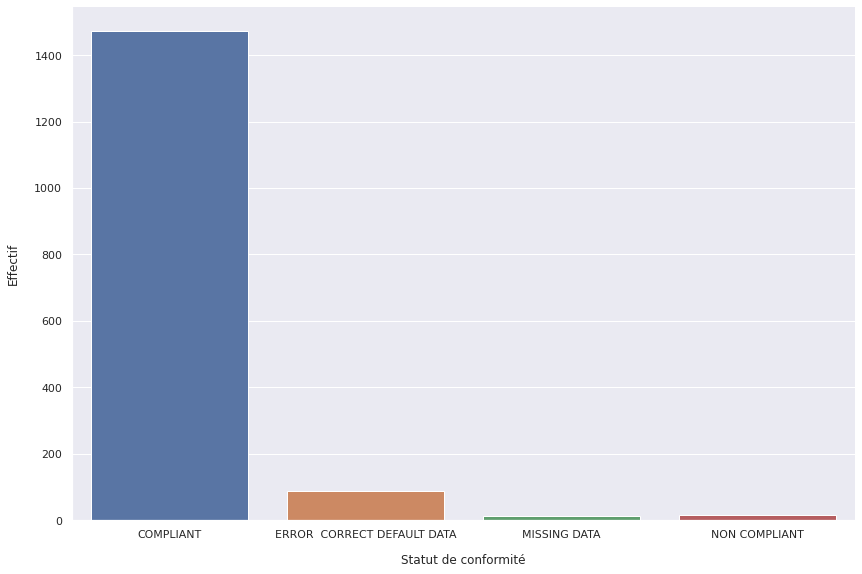

In [ ]:
sns.set()
#fig,ax = plt.subplots(figsize=(13,7), dpi = 100)

g = sns.catplot(data = df, x = 'CONFORMITE', kind = 'count',
           height = 8., aspect = 1.5)
g.set_ylabels('Effectif', labelpad = 14)
g.set_xlabels('Statut de conformité', labelpad = 14)
#plt.savefig('P4_N2_21a.png', dpi = 150, bbox_inches = 'tight')

In [ ]:
df[~df['Outlier'].isna()]

ID            TYPE        FONCTION_1              QUARTIER  LATITUDE  \
212     350  NONRESIDENTIAL            OFFICE              DOWNTOWN  47.60642   
370     539  NONRESIDENTIAL      RETAIL STORE             NORTHEAST  47.66178   
434     608  NONRESIDENTIAL            OFFICE              DOWNTOWN  47.59878   
497     704  NONRESIDENTIAL            OFFICE  MAGNOLIA  QUEEN ANNE  47.62235   
685   19967         SCHOOLS            SCHOOL  MAGNOLIA  QUEEN ANNE  47.63203   
756   20617  NONRESIDENTIAL      RETAIL STORE      GREATER DUWAMISH  47.56535   
839   21315  NONRESIDENTIAL            OFFICE              DOWNTOWN  47.61119   
881   21474  NONRESIDENTIAL             OTHER              DOWNTOWN  47.60711   
1000  22830  NONRESIDENTIAL  WORSHIP FACILITY             SOUTHWEST  47.51709   
1096  23912  NONRESIDENTIAL            OFFICE               CENTRAL  47.59973   
1200  24547  NONRESIDENTIAL            SCHOOL               CENTRAL  47.60885   
1235  24717  NONRESIDENTIAL             OTHER      GREATER DUWAMISH  47.58788   
1246  24825  NONRESIDENTIAL            OFFICE      GREATER DUWAMISH  47.58292   
1304  25553  NONRESIDENTIAL             HOTEL              DOWNTOWN  47.60035   
1416  27007  NONRESIDENTIAL  WORSHIP FACILITY             NORTHEAST  47.66146   
1517  43948  NONRESIDENTIAL             OTHER      GREATER DUWAMISH  47.54277   

      LONGITUDE  ANNÉE_CONST_REN  NBRE_IMMEUBLE  NBRE_ÉTAGE  \
212  -122.33581             1958            1.0           6   
370  -122.31812             1987            1.0           2   
434  -122.33458             1913            5.0           7   
497  -122.36378             2000            1.0           4   
685  -122.35337             2001            1.0           1   
756  -122.34054             1953            1.0           1   
839  -122.33581             1903            1.0           3   
881  -122.33886             1900            1.0           3   
1000 -122.37797             1971            1.0           1   
1096 -122.31331             1947            1.0           1   
1200 -122.29990             1929            1.0           2   
1235 -122.33458             1910            1.0           3   
1246 -122.33468             1910            1.0           2   
1304 -122.33379             1900            1.0           3   
1416 -122.27880             1954            1.0           2   
1517 -122.31626             1906            1.0           2   

      SUPERFICIE_TOTALE  ...  ENERGYSTARScore INT_CONSOMMATION_ENERG_SITE  \
212              172842  ...              NaN                  299.200012   
370               69492  ...            100.0                    4.600000   
434              154159  ...            100.0                   58.799999   
497              129551  ...              1.0                  311.700012   
685               35805  ...            100.0                   12.100000   
756               39900  ...            100.0                    3.600000   
839               57720  ...              NaN                    1.000000   
881               49760  ...              NaN                    1.800000   
1000              23772  ...            100.0                    4.200000   
1096              45068  ...            100.0                    6.900000   
1200              24152  ...            100.0                    6.700000   
1235              27690  ...              NaN                    0.700000   
1246              20970  ...            100.0                   11.100000   
1304              25450  ...             99.0                   19.400000   
1416              20039  ...            100.0                    5.200000   
1517              39212  ...              NaN                    1.800000   

      CONSOMMATION_ENERG_SITE STEAM(kBtu)  Electricity(kBtu) NaturalGas(kBtu)  \
212              4.165040e+07         0.0         39794668.0        1604831.0   
370              3.189628e+05         0.0           318963.0              0.0   
434   

In [ ]:
pd.crosstab(df['Outlier'],df['CONFORMITE'])

CONFORMITE    ERROR  CORRECT DEFAULT DATA  NON COMPLIANT
Outlier                                                 
HIGH OUTLIER                            0              2
LOW OUTLIER                             2             12

In [ ]:
ind = df[~df['Outlier'].isna()].index
df = df.drop(ind)
df = df.drop(columns = 'Outlier')
df = df.reset_index(drop = True)
df

ID            TYPE            FONCTION_1              QUARTIER  \
0         1  NONRESIDENTIAL                 HOTEL              DOWNTOWN   
1         2  NONRESIDENTIAL                 HOTEL              DOWNTOWN   
2         3  NONRESIDENTIAL                 HOTEL              DOWNTOWN   
3         5  NONRESIDENTIAL                 HOTEL              DOWNTOWN   
4         8  NONRESIDENTIAL                 HOTEL              DOWNTOWN   
...     ...             ...                   ...                   ...   
1570  50222  NONRESIDENTIAL                OFFICE      GREATER DUWAMISH   
1571  50223  NONRESIDENTIAL  RECREATION & CULTURE              DOWNTOWN   
1572  50224  NONRESIDENTIAL  RECREATION & CULTURE  MAGNOLIA  QUEEN ANNE   
1573  50225  NONRESIDENTIAL  RECREATION & CULTURE      GREATER DUWAMISH   
1574  50226  NONRESIDENTIAL  RECREATION & CULTURE      GREATER DUWAMISH   

      LATITUDE  LONGITUDE  ANNÉE_CONST_REN  NBRE_IMMEUBLE  NBRE_ÉTAGE  \
0     47.61220 -122.33799             1927            1.0          12   
1     47.61317 -122.33393             1996            1.0          11   
2     47.61393 -122.33810             1969            1.0          41   
3     47.61412 -122.33664             1926            1.0          10   
4     47.61375 -122.34047             1980            1.0          18   
...        ...        ...              ...            ...         ...   
1570  47.56722 -122.31154             1990            1.0           1   
1571  47.59625 -122.32283             2004            1.0           1   
1572  47.63644 -122.35784             1974            1.0           1   
1573  47.52832 -122.32431             1989            1.0           1   
1574  47.53939 -122.29536             1938            1.0           1   

      SUPERFICIE_TOTALE  ...  ThirdLargestPropertyUseTypeGFA ENERGYSTARScore  \
0                 88434  ...                             NaN            60.0   
1                103566  ...                          4622.0            61.0   
2                956110  ...                             NaN            43.0   
3                 61320  ...                             NaN            56.0   
4                175580  ...                             0.0            75.0   
...                 ...  ...                             ...             ...   
1570              12294  ...                             NaN            46.0   
1571              16000  ...                             NaN             NaN   
1572              13157  ...                             0.0             NaN   
1573              14101  ...                           484.0             NaN   
1574              18258  ...                          1108.0             NaN   

      INT_CONSOMMATION_ENERG_SITE CONSOMMATION_ENERG_SITE  STEAM(kBtu)  \
0                       84.300003            7.456910e+06   2003882.00   
1                       97.900002            8.664479e+06         0.00   
2                       97.699997            7.393711e+07  21566554.00   
3                      113.300003            6.946800e+06   2214446.25   
4                      118.699997            1.465650e+07         0.00   
...                           ...                     ...          ...   
1570                    76.699997            9.430032e+05         0.00   
1571                    65.900002            1.053706e+06         0.00   
1572                   460.100006            6.053764e+06         0.00   
1573                    55.500000            7.828413e+05         0.00   
1574                    70.900002            1.293722e+06         0.00   

     Electricity(kBtu)  NaturalGas(kBtu)                   CONFORMITE  \
0         3.946027e+06      1.276453e+06                    COMPLIANT   
1         3.242851e+06      5.145082e+06                    COMPLIANT   
2         4.952666e+07      1.493800e+06                    COMPLIANT   
3         2.768924e+06      1.811213e+06                    COMPLIANT   
4         5.3686

In [ ]:
df[df['CONFORMITE'] != 'COMPLIANT']
print('Les individus qui ne sont pas conformes représentent', 
      round(len(df[df['CONFORMITE'] != 'COMPLIANT'])/len(df),2)*100, '% du dataset' )

Les individus qui ne sont pas conformes représentent 7.000000000000001 % du dataset


In [ ]:
df = df[df['CONFORMITE'] == 'COMPLIANT']
df.shape

(1472, 26)

## <a name="C22"> 2.2 Variable quantitatives </a>  

In [ ]:
df.describe()

LATITUDE    LONGITUDE  ANNÉE_CONST_REN  NBRE_IMMEUBLE   NBRE_ÉTAGE  \
count  1472.000000  1472.000000      1472.000000    1472.000000  1472.000000   
mean     47.615605  -122.333883      1961.479620       1.186821     4.268342   
std       0.047031     0.023191        32.619986       3.113928     6.848611   
min      47.509590  -122.411820      1900.000000       0.000000     0.000000   
25%      47.586422  -122.343150      1930.000000       1.000000     1.000000   
50%      47.612295  -122.333270      1965.000000       1.000000     2.000000   
75%      47.647825  -122.323215      1988.000000       1.000000     4.000000   
max      47.733870  -122.261800      2015.000000     111.000000    99.000000   

       SUPERFICIE_TOTALE  SUPERFICIE_PARKING  LargestPropertyUseTypeGFA  \
count       1.472000e+03         1472.000000               1.468000e+03   
mean        1.218195e+05        14054.377038               1.011043e+05   
std         3.108240e+05        44234.678054               2.917030e+05   
min         1.276900e+04            0.000000               5.656000e+03   
25%         2.890200e+04            0.000000               2.546150e+04   
50%         4.806600e+04            0.000000               4.219000e+04   
75%         1.071275e+05            0.000000               9.279725e+04   
max         9.320156e+06       512608.000000               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       799.000000                      321.000000   
mean                      36428.890234                    14382.085354   
std                       66452.982647                    36599.510532   
min                           0.000000                        0.000000   
25%                        5595.000000                     2500.000000   
50%                       12102.000000                     5775.000000   
75%                       31881.000000                    12400.000000   
max                      639931.000000                   459748.000000   

       ENERGYSTARScore  INT_CONSOMMATION_ENERG_SITE  CONSOMMATION_ENERG_SITE  \
count       952.000000                  1471.000000             1.471000e+03   
mean         63.815126                    77.624133             8.530874e+06   
std          28.621601                    77.363742             2.326082e+07   
min           1.000000                     0.000000             0.000000e+00   
25%          44.000000                    37.000000             1.305828e+06   
50%          71.000000                    55.900002             2.808275e+06   
75%          88.000000                    87.549999             7.496709e+06   
max         100.000000                   834.400024             4.716139e+08   

        STEAM(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  ÉMISSIONS_TOTALES  \
count  1.472000e+03       1.472000e+03      1.472000e+03        1472.000000   
mean   5.762462e+05       6.264676e+06      2.009528e+06         194.878852   
std    5.862532e+06       2.201693e+07      9.902710e+06         796.668460   
min    0.000000e+00      -1.154170e+05      0.000000e+00          -0.800000   
25%    0.000000e+00       7.295642e+05      0.000000e+00          20.262500   
50%    0.000000e+00       1.727940e+06      4.557595e+05          49.410000   
75%    0.000000e+00       5.304218e+06      1.472344e+06         144.870000   
max    1.349435e+08       6.570744e+08      2.979090e+08       16870.980000   

       INTENSITÉ_ÉMISSIONS  
count          1472.000000  
mean              1.651936  
std               2.421810  
min              -0.020000  
25%               0.360000  
50%               0.870000  
75%               1.930000  
max              34.090000

- LATITUDES et LONGITUDES ok 
- ANNÉE_CONSTRUCTION_REN ok 
- NBRE_IMMEUBLE nok (à explorer)
- NBRE_ÉTAGE nok (à explorer)
- ENERGYSTARScore ok
- INT_CONSOMMATION_ENERG_SITE nok (à explorer)
- INT_CONSOMMATION_ENERG_TOT nok (à explorer)
- ÉMISSIONS_TOTALES nok (à explorer)
- INTENSITÉ_ÉMISSIONS nok (à explorer)

<Axes: >

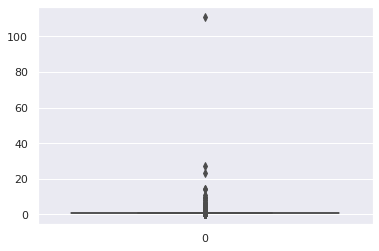

In [ ]:
sns.set()
sns.boxplot(df['NBRE_IMMEUBLE'])

In [ ]:
df['NBRE_IMMEUBLE'].describe()
df.loc[df['NBRE_IMMEUBLE']==0, 'NBRE_IMMEUBLE']=1

Campus universitaire comprenant 111 immeubles, outlier mais pas abbérant

<Axes: >

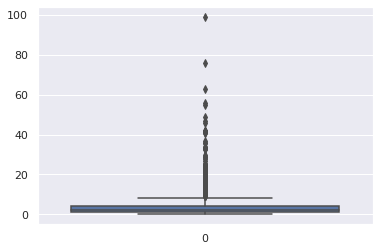

In [ ]:
sns.set()
sns.boxplot(df['NBRE_ÉTAGE'])

In [ ]:
df[df['NBRE_ÉTAGE'] == 99]

ID            TYPE        FONCTION_1          QUARTIER  LATITUDE  \
900  21611  NONRESIDENTIAL  WORSHIP FACILITY  GREATER DUWAMISH  47.55072   

     LONGITUDE  ANNÉE_CONST_REN  NBRE_IMMEUBLE  NBRE_ÉTAGE  SUPERFICIE_TOTALE  \
900 -122.30265             1977            1.0          99              21948   

     ...  ThirdLargestPropertyUseTypeGFA ENERGYSTARScore  \
900  ...                             NaN            80.0   

     INT_CONSOMMATION_ENERG_SITE CONSOMMATION_ENERG_SITE  STEAM(kBtu)  \
900                         14.9             326001.1875          0.0   

    Electricity(kBtu)  NaturalGas(kBtu)  CONFORMITE  ÉMISSIONS_TOTALES  \
900          326001.0               0.0   COMPLIANT               2.27   

     INTENSITÉ_ÉMISSIONS  
900                  0.1  

[1 rows x 26 columns]

Le lieu de culte désigné est un édifice de plein pieds (vu sur google maps). 99 étages, valeurs abbérantes, suppression de la ligne

In [ ]:
ind = df[df['NBRE_ÉTAGE'] == 99].index
df = df.drop(ind)
df = df.reset_index(drop= True)

https://www.twinview.com/insights/benchmarking-commercial-energy-use-per-square-foot

Typically, the average number of kilowatt-hours per square foot for a commercial building is approximately 22.5 kWh per year.

Here is the breakdown of how that energy is used:

- Approximately 8 kWh/square foot are consumed by refrigeration and equipment.
- Approximately 7 kWh/square foot are consumed by lighting.
- Approximately 3 kWh/square foot are consumed by cooling equipment.
- Approximately 2 kWh/square foot are consumed by heating equipment.
- Approximately 2 kWh/square foot are consumed by ventilation.
- Approximately 0.5 kWh/square foot are consumed by hot water heating.



In [ ]:
df[df['INT_CONSOMMATION_ENERG_SITE']== 0]
print('Les individus dont la consommation est nulle représentent', 
      round(len(df[df['INT_CONSOMMATION_ENERG_SITE']== 0])/len(df),2)*100, '% du dataset' )

Les individus dont la consommation est nulle représentent 1.0 % du dataset


In [ ]:
df = df[~(df['INT_CONSOMMATION_ENERG_SITE']== 0)]
df.shape

(1462, 26)

In [ ]:
df.describe()

LATITUDE    LONGITUDE  ANNÉE_CONST_REN  NBRE_IMMEUBLE   NBRE_ÉTAGE  \
count  1462.000000  1462.000000      1462.000000    1462.000000  1462.000000   
mean     47.615487  -122.333971      1961.489740       1.145691     4.181259   
std       0.047062     0.023197        32.611955       1.209128     6.379133   
min      47.509590  -122.411820      1900.000000       1.000000     0.000000   
25%      47.585943  -122.343225      1930.000000       1.000000     1.000000   
50%      47.612245  -122.333275      1965.000000       1.000000     2.000000   
75%      47.647478  -122.323370      1988.000000       1.000000     4.000000   
max      47.733870  -122.261800      2015.000000      27.000000    76.000000   

       SUPERFICIE_TOTALE  SUPERFICIE_PARKING  LargestPropertyUseTypeGFA  \
count       1.462000e+03         1462.000000               1.458000e+03   
mean        1.152832e+05        13996.647743               9.462531e+04   
std         1.978606e+05        44251.587123               1.649762e+05   
min         1.276900e+04            0.000000               5.656000e+03   
25%         2.886600e+04            0.000000               2.542450e+04   
50%         4.800350e+04            0.000000               4.193900e+04   
75%         1.057750e+05            0.000000               9.209825e+04   
max         2.200000e+06       512608.000000               1.719643e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       796.000000                      320.000000   
mean                      36295.697609                    14381.157496   
std                       66496.319621                    36656.827867   
min                           0.000000                        0.000000   
25%                        5570.750000                     2492.500000   
50%                       12011.500000                     5744.000000   
75%                       31770.750000                    12369.250000   
max                      639931.000000                   459748.000000   

       ENERGYSTARScore  INT_CONSOMMATION_ENERG_SITE  CONSOMMATION_ENERG_SITE  \
count       945.000000                  1461.000000             1.461000e+03   
mean         63.744974                    78.145243             8.589042e+06   
std          28.698896                    77.369456             2.332967e+07   
min           1.000000                     1.500000             5.811420e+04   
25%          44.000000                    37.200001             1.328072e+06   
50%          71.000000                    56.099998             2.828172e+06   
75%          88.000000                    87.699997             7.575080e+06   
max         100.000000                   834.400024             4.716139e+08   

        STEAM(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  ÉMISSIONS_TOTALES  \
count  1.462000e+03       1.462000e+03      1.462000e+03        1462.000000   
mean   5.126389e+05       5.803230e+06      2.022611e+06         187.447052   
std    5.444757e+06       1.404237e+07      9.935266e+06         745.974733   
min    0.000000e+00      -1.154170e+05      0.000000e+00          -0.800000   
25%    0.000000e+00       7.300348e+05      0.000000e+00          20.207500   
50%    0.000000e+00       1.705598e+06      4.636810e+05          49.410000   
75%    0.000000e+00       5.273283e+06      1.490642e+06         143.102500   
max    1.349435e+08       2.745325e+08      2.979090e+08       16870.980000   

       INTENSITÉ_ÉMISSIONS  
count          1462.000000  
mean              1.657011  
std               2.428662  
min              -0.020000  
25%               0.360000  
50%               0.870000  
75%               1.937500  
max              34.090000

In [ ]:
df[df['ÉMISSIONS_TOTALES']<= 0]

ID            TYPE    FONCTION_1              QUARTIER  LATITUDE  \
444     700  NONRESIDENTIAL  RETAIL STORE  MAGNOLIA  QUEEN ANNE  47.63718   
1420  49784  NONRESIDENTIAL        OFFICE               CENTRAL  47.61432   

      LONGITUDE  ANNÉE_CONST_REN  NBRE_IMMEUBLE  NBRE_ÉTAGE  \
444  -122.37734             2008            1.0           1   
1420 -122.31257             2013            1.0           6   

      SUPERFICIE_TOTALE  ...  ThirdLargestPropertyUseTypeGFA ENERGYSTARScore  \
444               57176  ...                          5500.0            31.0   
1420              52000  ...                             NaN           100.0   

      INT_CONSOMMATION_ENERG_SITE CONSOMMATION_ENERG_SITE  STEAM(kBtu)  \
444                    214.100006            1.284386e+07          0.0   
1420                     5.000000            2.401321e+05          0.0   

     Electricity(kBtu)  NaturalGas(kBtu)  CONFORMITE  ÉMISSIONS_TOTALES  \
444                0.0               0.0   COMPLIANT                0.0   
1420         -115417.0               0.0   COMPLIANT               -0.8   

      INTENSITÉ_ÉMISSIONS  
444                  0.00  
1420                -0.02  

[2 rows x 26 columns]

In [ ]:
df = df[~(df['ÉMISSIONS_TOTALES']<= 0)]
df.shape

(1460, 26)

In [ ]:
df[(df['ÉMISSIONS_TOTALES']== df['ÉMISSIONS_TOTALES'].min())]

ID            TYPE FONCTION_1              QUARTIER  LATITUDE  \
902  22548  NONRESIDENTIAL  WAREHOUSE  MAGNOLIA  QUEEN ANNE  47.64418   

     LONGITUDE  ANNÉE_CONST_REN  NBRE_IMMEUBLE  NBRE_ÉTAGE  SUPERFICIE_TOTALE  \
902 -122.37587             1915            1.0           3              39952   

     ...  ThirdLargestPropertyUseTypeGFA ENERGYSTARScore  \
902  ...                             NaN             NaN   

     INT_CONSOMMATION_ENERG_SITE CONSOMMATION_ENERG_SITE  STEAM(kBtu)  \
902                          1.5             58114.19922          0.0   

    Electricity(kBtu)  NaturalGas(kBtu)  CONFORMITE  ÉMISSIONS_TOTALES  \
902           57133.0               0.0   COMPLIANT                0.4   

     INTENSITÉ_ÉMISSIONS  
902                 0.01  

[1 rows x 26 columns]

In [ ]:
#Ordre de grandeur
#objectif de la consommation d'énergie en France 50 kwh/m2 pour un an
#Source : Twinview , consommation annuel pour un immeuble commercial : 22.5kWh /sf
obj_kwh_sf = 22.5  
obj_Btu_sf = (obj_kwh_sf*3412.14)
obj_kBtu_sf = obj_Btu_sf*1e-3
obj_kBtu_sf

76.77315

Unité des émissions : 

- émissions totales en Tonnes de CO2
- intensité des émissions par kg de CO2/ sf

## <a name="C23">  2.3  Traitement des doublons</a>  

In [ ]:
clean.doublon(df,['ID'])

Recherche de doublon : il y a  0 
doublons qui ont la même clé: ['ID']


ID            TYPE        FONCTION_1              QUARTIER  LATITUDE  \
736   21125  NONRESIDENTIAL            OFFICE            LAKE UNION  47.65114   
174     356  NONRESIDENTIAL            OFFICE              DOWNTOWN  47.60471   
175     357  NONRESIDENTIAL            OFFICE              DOWNTOWN  47.60501   
177     359  NONRESIDENTIAL            OFFICE              DOWNTOWN  47.60377   
610   19864  NONRESIDENTIAL            OFFICE              DOWNTOWN  47.61285   
...     ...             ...               ...                   ...       ...   
1199  25537  NONRESIDENTIAL         WAREHOUSE  MAGNOLIA  QUEEN ANNE  47.64633   
730   21103  NONRESIDENTIAL             HOTEL              DOWNTOWN  47.61203   
1207  25568  NONRESIDENTIAL            OFFICE            LAKE UNION  47.64747   
1224  25711  NONRESIDENTIAL  BAR & RESTAURANT              DOWNTOWN  47.59697   
293     496  NONRESIDENTIAL         WAREHOUSE               BALLARD  47.66838   

      LONGITUDE  ANNÉE_CONST_REN  NBRE_IMMEUBLE  NBRE_ÉTAGE  \
736  -122.34954             2001            1.0           5   
174  -122.33261             1907            1.0           8   
175  -122.32988             1990            1.0          63   
177  -122.32971             2003            1.0           8   
610  -122.34817             1908            1.0           3   
...         ...              ...            ...         ...   
1199 -122.35080             1918            1.0           2   
730  -122.34165             1910            1.0           8   
1207 -122.34086             2008            1.0           4   
1224 -122.32474             1913            1.0           3   
293  -122.39310             1946            2.0           2   

      SUPERFICIE_TOTALE  ...  ThirdLargestPropertyUseTypeGFA ENERGYSTARScore  \
736               33740  ...                          1500.0            79.0   
174              201480  ...                         10624.0            91.0   
175             1354987  ...                         18656.0            89.0   
177              199530  ...                         17480.0            69.0   
610               28800  ...                          6200.0            50.0   
...                 ...  ...                             ...             ...   
1199              28309  ...                             NaN             NaN   
730               61721  ...                             NaN            93.0   
1207              48350  ...                             NaN            45.0   
1224              28800  ...                             NaN             NaN   
293              111445  ...                             NaN             NaN   

      INT_CONSOMMATION_ENERG_SITE CONSOMMATION_ENERG_SITE  STEAM(kBtu)  \
736                     52.299999            1.291405e+06        0.000   
174                     47.200001            9.510490e+06  1619966.875   
175                     50.400002            6.157618e+07        0.000   
177                     77.400002            1.397270e+07        0.000   
610                     40.700001            1.423579e+06        0.000   
...                           ...                     ...          ...   
1199                    17.600000            4.983649e+05        0.000   
730                     53.500000            2.968430e+06        0.000   
1207                    74.699997            3.280956e+06        0.000   
1224                    32.500000            9.358332e+05        0.000   
293                     51.000000            6.076957e+06        0.000   

     Electricity(kBtu)  NaturalGas(kBtu)  CONFORMITE  ÉMISSIONS_TOTALES  \
736          1291405.0               0.0   COMPLIANT               9.00   
174          7301810.0               0.0   COMPLIANT             175.95   
175         61576180.0               0.0   COMPLIANT             429.27   
177          8738965.0         4475451.0   COMPLIANT             298.61   
610           923904.0          421122.0   COMPLIANT  

# <a name="C3"> 3. Traitement des valeurs manquantes</a>  

ID                                 0.000000
TYPE                               0.000000
FONCTION_1                         0.000000
QUARTIER                           0.000000
LATITUDE                           0.000000
LONGITUDE                          0.000000
ANNÉE_CONST_REN                    0.000000
NBRE_IMMEUBLE                      0.000000
NBRE_ÉTAGE                         0.000000
SUPERFICIE_TOTALE                  0.000000
SUPERFICIE_PARKING                 0.000000
LargestPropertyUseType             0.002740
LargestPropertyUseTypeGFA          0.002740
FONCTION_2                         0.455479
SecondLargestPropertyUseTypeGFA    0.455479
FONCTION_3                         0.781507
ThirdLargestPropertyUseTypeGFA     0.781507
ENERGYSTARScore                    0.354110
INT_CONSOMMATION_ENERG_SITE        0.000685
CONSOMMATION_ENERG_SITE            0.000685
STEAM(kBtu)                        0.000000
Electricity(kBtu)                  0.000000
NaturalGas(kBtu)                

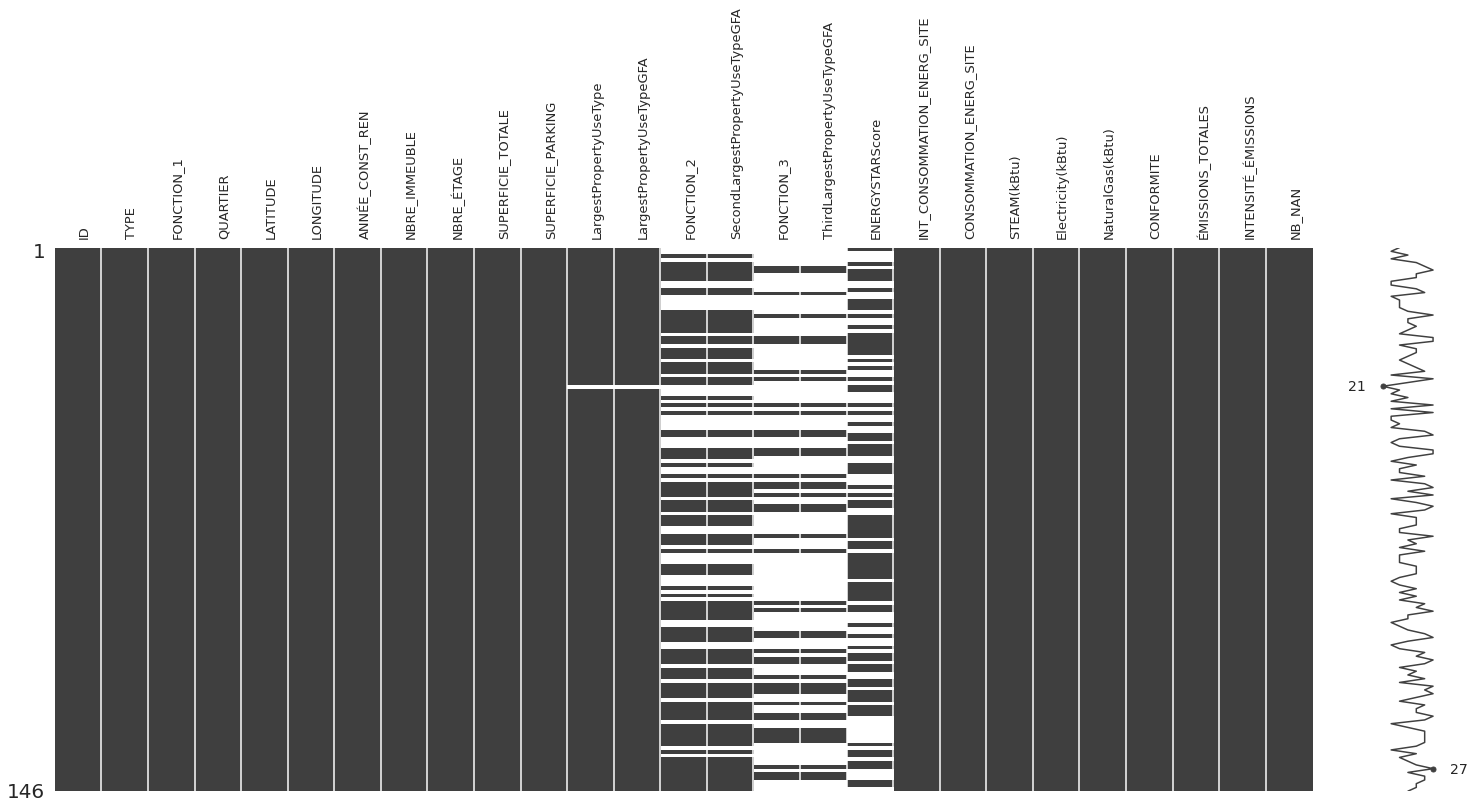

In [ ]:
clean.vm(df,0.1,'/content/Fichier_N1/P4_N1_3a.png')

## <a name="C31"> 3.1 Analyse des corrélations</a>  

In [ ]:
var_quant = df.dtypes[df.dtypes != 'object'].index

In [ ]:
var_energy = var_quant.drop(['LATITUDE', 'LONGITUDE', 'NBRE_IMMEUBLE', 'NB_NAN'])
var_energy

Index(['ANNÉE_CONST_REN', 'NBRE_ÉTAGE', 'SUPERFICIE_TOTALE',
       'SUPERFICIE_PARKING', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'INT_CONSOMMATION_ENERG_SITE',
       'CONSOMMATION_ENERG_SITE', 'STEAM(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'ÉMISSIONS_TOTALES', 'INTENSITÉ_ÉMISSIONS'],
      dtype='object')

In [ ]:
df[var_energy].corr()

ANNÉE_CONST_REN  NBRE_ÉTAGE  \
ANNÉE_CONST_REN                         1.000000    0.100765   
NBRE_ÉTAGE                              0.100765    1.000000   
SUPERFICIE_TOTALE                       0.208526    0.696195   
SUPERFICIE_PARKING                      0.294018    0.537730   
LargestPropertyUseTypeGFA               0.182373    0.663561   
SecondLargestPropertyUseTypeGFA         0.255669    0.516023   
ThirdLargestPropertyUseTypeGFA          0.124365    0.221612   
ENERGYSTARScore                        -0.033947    0.157017   
INT_CONSOMMATION_ENERG_SITE             0.130686    0.017093   
CONSOMMATION_ENERG_SITE                 0.137096    0.342709   
STEAM(kBtu)                             0.018868    0.112819   
Electricity(kBtu)                       0.175999    0.494014   
NaturalGas(kBtu)                        0.060630    0.034592   
ÉMISSIONS_TOTALES                       0.076612    0.152856   
INTENSITÉ_ÉMISSIONS                     0.000136   -0.052403   

                                 SUPERFICIE_TOTALE  SUPERFICIE_PARKING  \
ANNÉE_CONST_REN                           0.208526            0.294018   
NBRE_ÉTAGE                                0.696195            0.537730   
SUPERFICIE_TOTALE                         1.000000            0.589170   
SUPERFICIE_PARKING                        0.589170            1.000000   
LargestPropertyUseTypeGFA                 0.961178            0.498106   
SecondLargestPropertyUseTypeGFA           0.798677            0.486788   
ThirdLargestPropertyUseTypeGFA            0.476362            0.143210   
ENERGYSTARScore                           0.158456            0.123957   
INT_CONSOMMATION_ENERG_SITE               0.033821            0.039125   
CONSOMMATION_ENERG_SITE                   0.595317            0.204910   
STEAM(kBtu)                               0.288933            0.000405   
Electricity(kBtu)                         0.683728            0.315476   
NaturalGas(kBtu)                          0.244622            0.026819   
ÉMISSIONS_TOTALES                         0.425540            0.060596   
INTENSITÉ_ÉMISSIONS                      -0.007763           -0.100248   

                                 LargestPropertyUseTypeGFA  \
ANNÉE_CONST_REN                                   0.182373   
NBRE_ÉTAGE                                        0.663561   
SUPERFICIE_TOTALE                                 0.961178   
SUPERFICIE_PARKING                                0.498106   
LargestPropertyUseTypeGFA                         1.000000   
SecondLargestPropertyUseTypeGFA                   0.764510   
ThirdLargestPropertyUseTypeGFA                    0.464514   
ENERGYSTARScore                                   0.141434   
INT_CONSOMMATION_ENERG_SITE                       0.027099   
CONSOMMATION_ENERG_SITE                           0.661569   
STEAM(kBtu)                                       0.386536   
Electricity(kBtu)                                 0.706820   
NaturalGas(kBtu)                                  0.308692   
ÉMISSIONS_TOTALES                                 0.528886   
INTENSITÉ_ÉMISSIONS                               0.059411   

                                 SecondLargestPropertyUseTypeGFA  \
ANNÉE_CONST_REN                                         0.255669   
NBRE_ÉTAGE                                              0.516023   
SUPERFICIE_TOTALE                                       0.798677   
SUPERFICIE_PARKING                                      0.486788   
LargestPropertyUseTypeGFA                               0.764510   
SecondLargestPropertyUseTypeGFA                         1.000000   
ThirdLargestPropertyUseTypeGFA                          0.671241   
ENERGYSTARScore                                         0.148761   
INT_CONSOMMATION_ENERG_SITE                             0.046453   
CONSOMMATION_ENERG_SITE                                 0.677561   
STEAM(kBtu)                                             0.296283   
Electricity(kB

<Axes: >

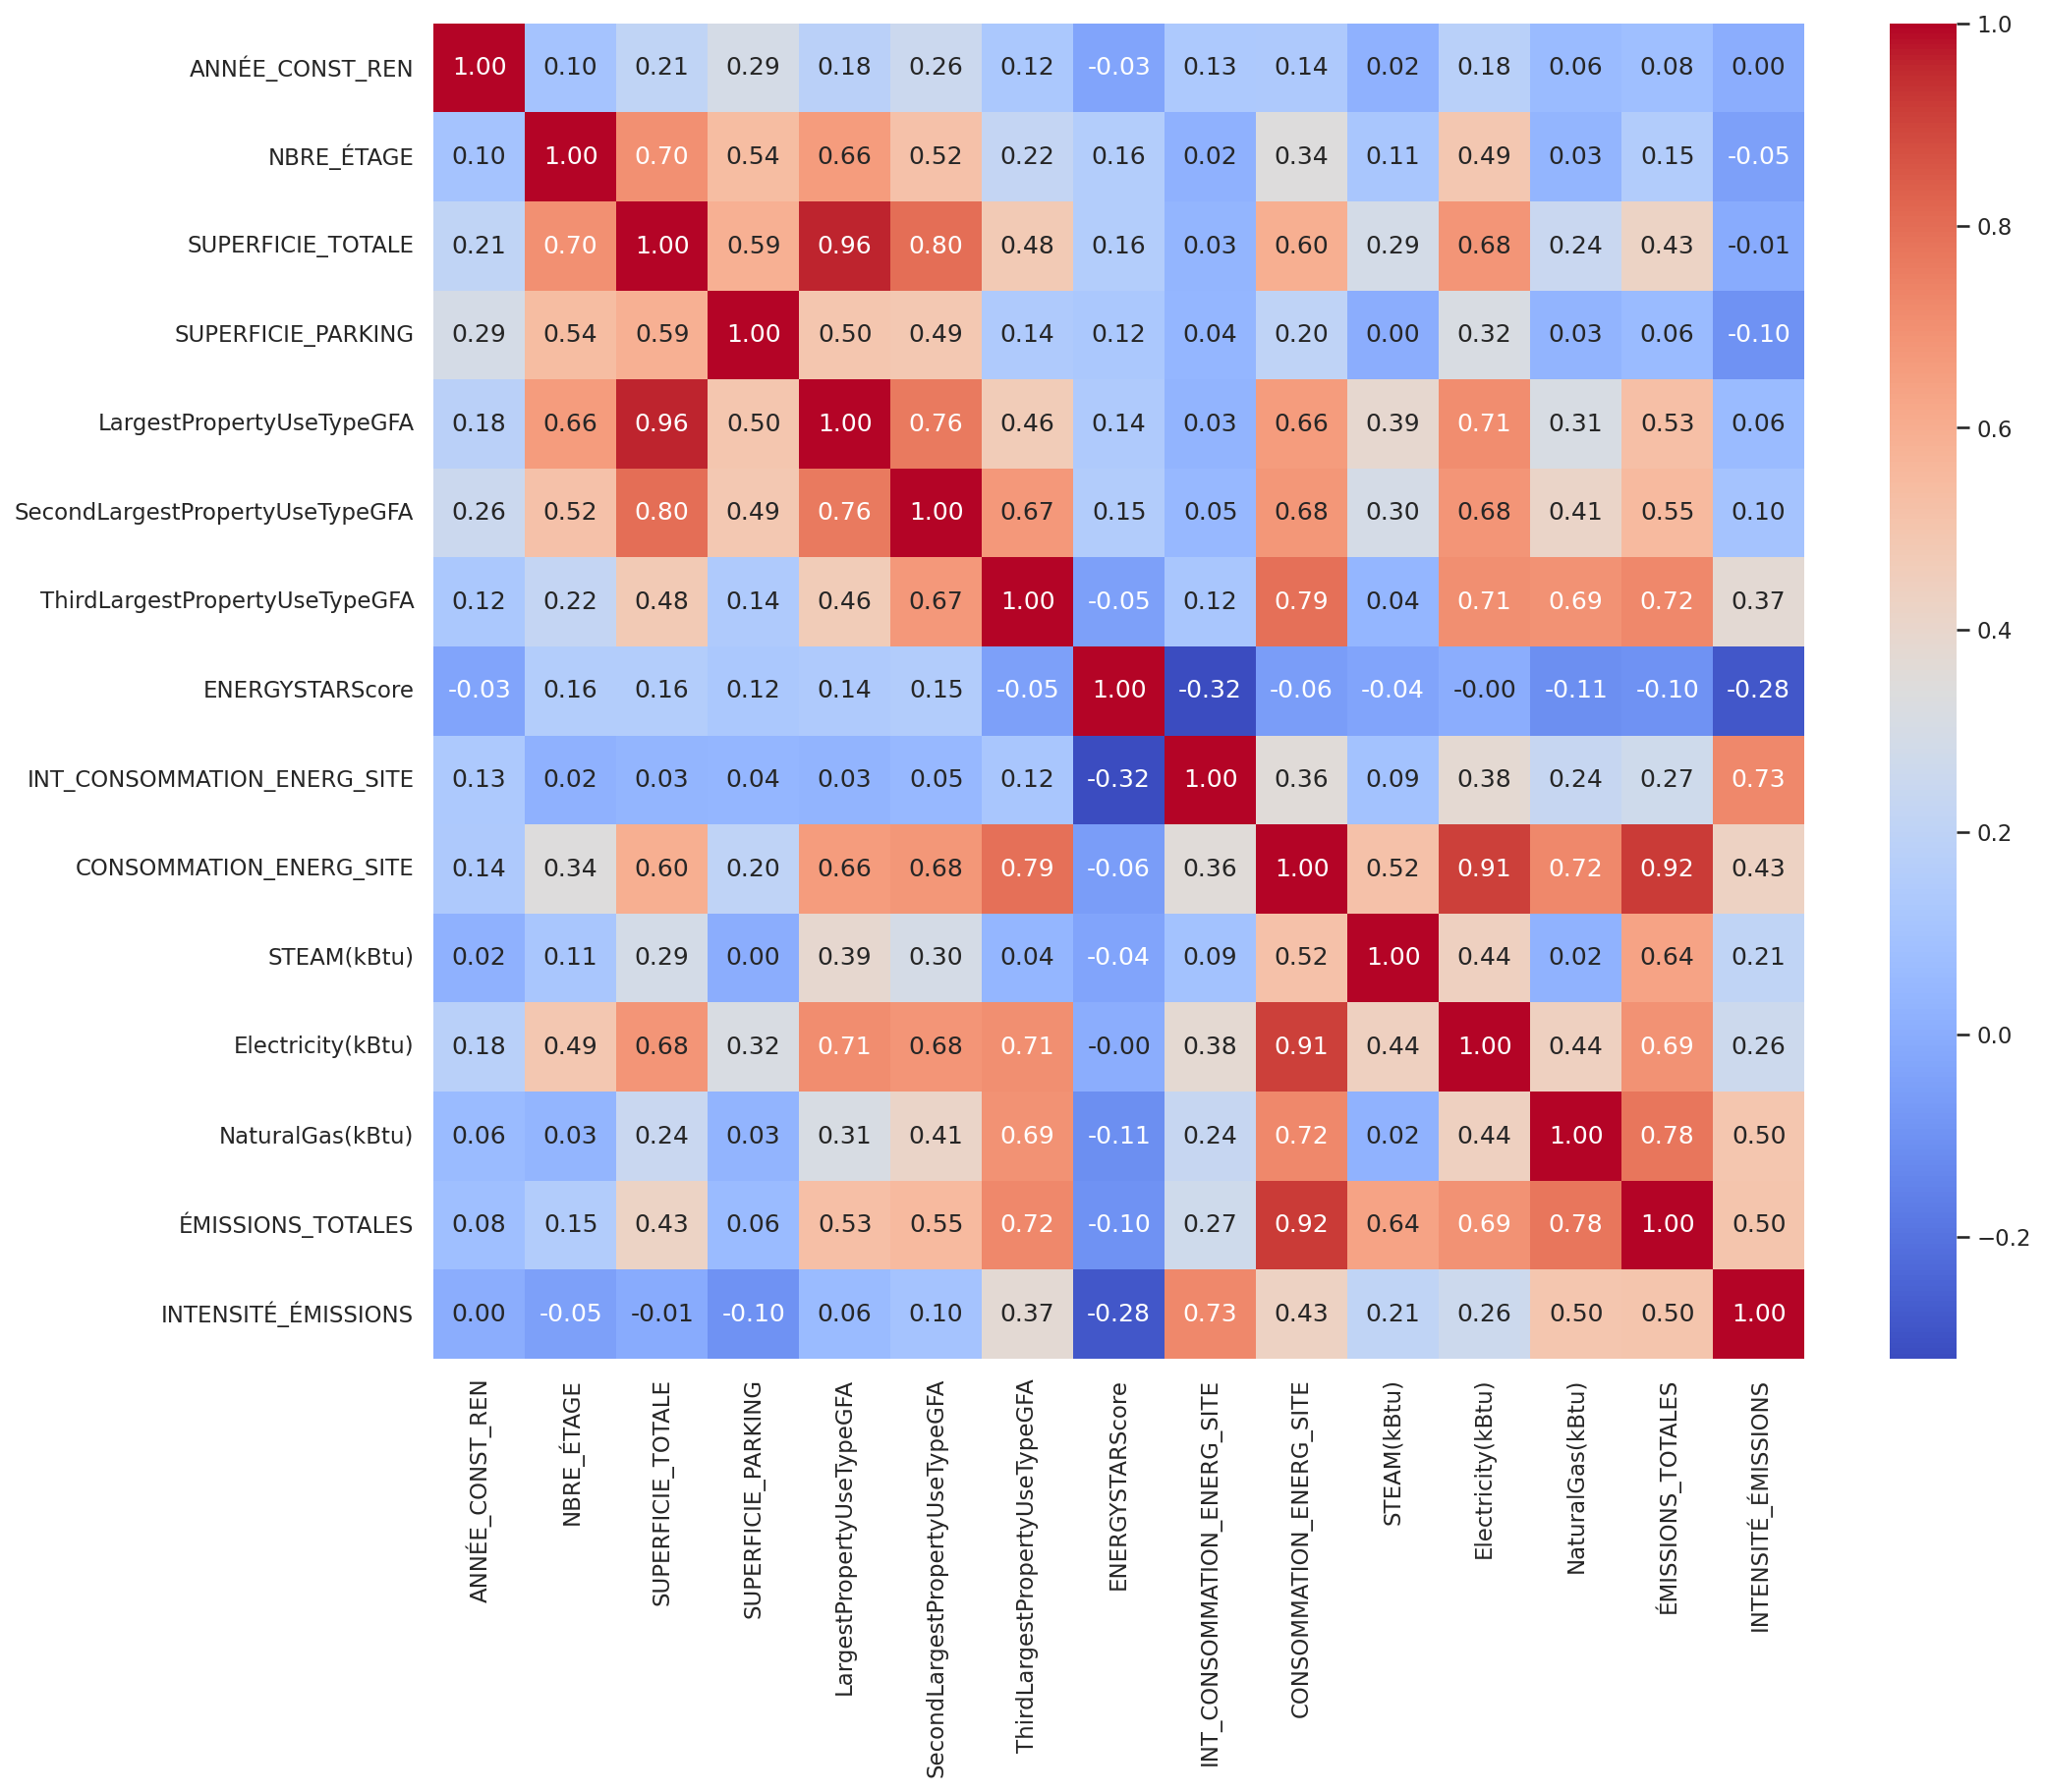

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(15,12), dpi = 150)
sns.heatmap(df[var_energy].corr(),annot=True, cmap="coolwarm", fmt="0.2f")
#plt.savefig('P4_N1_31a.png',bbox_inches = 'tight')

In [ ]:
var_energy = ['SUPERFICIE_TOTALE','INT_CONSOMMATION_ENERG_SITE', 'CONSOMMATION_ENERG_SITE', 'STEAM(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'ÉMISSIONS_TOTALES',
       'INTENSITÉ_ÉMISSIONS']

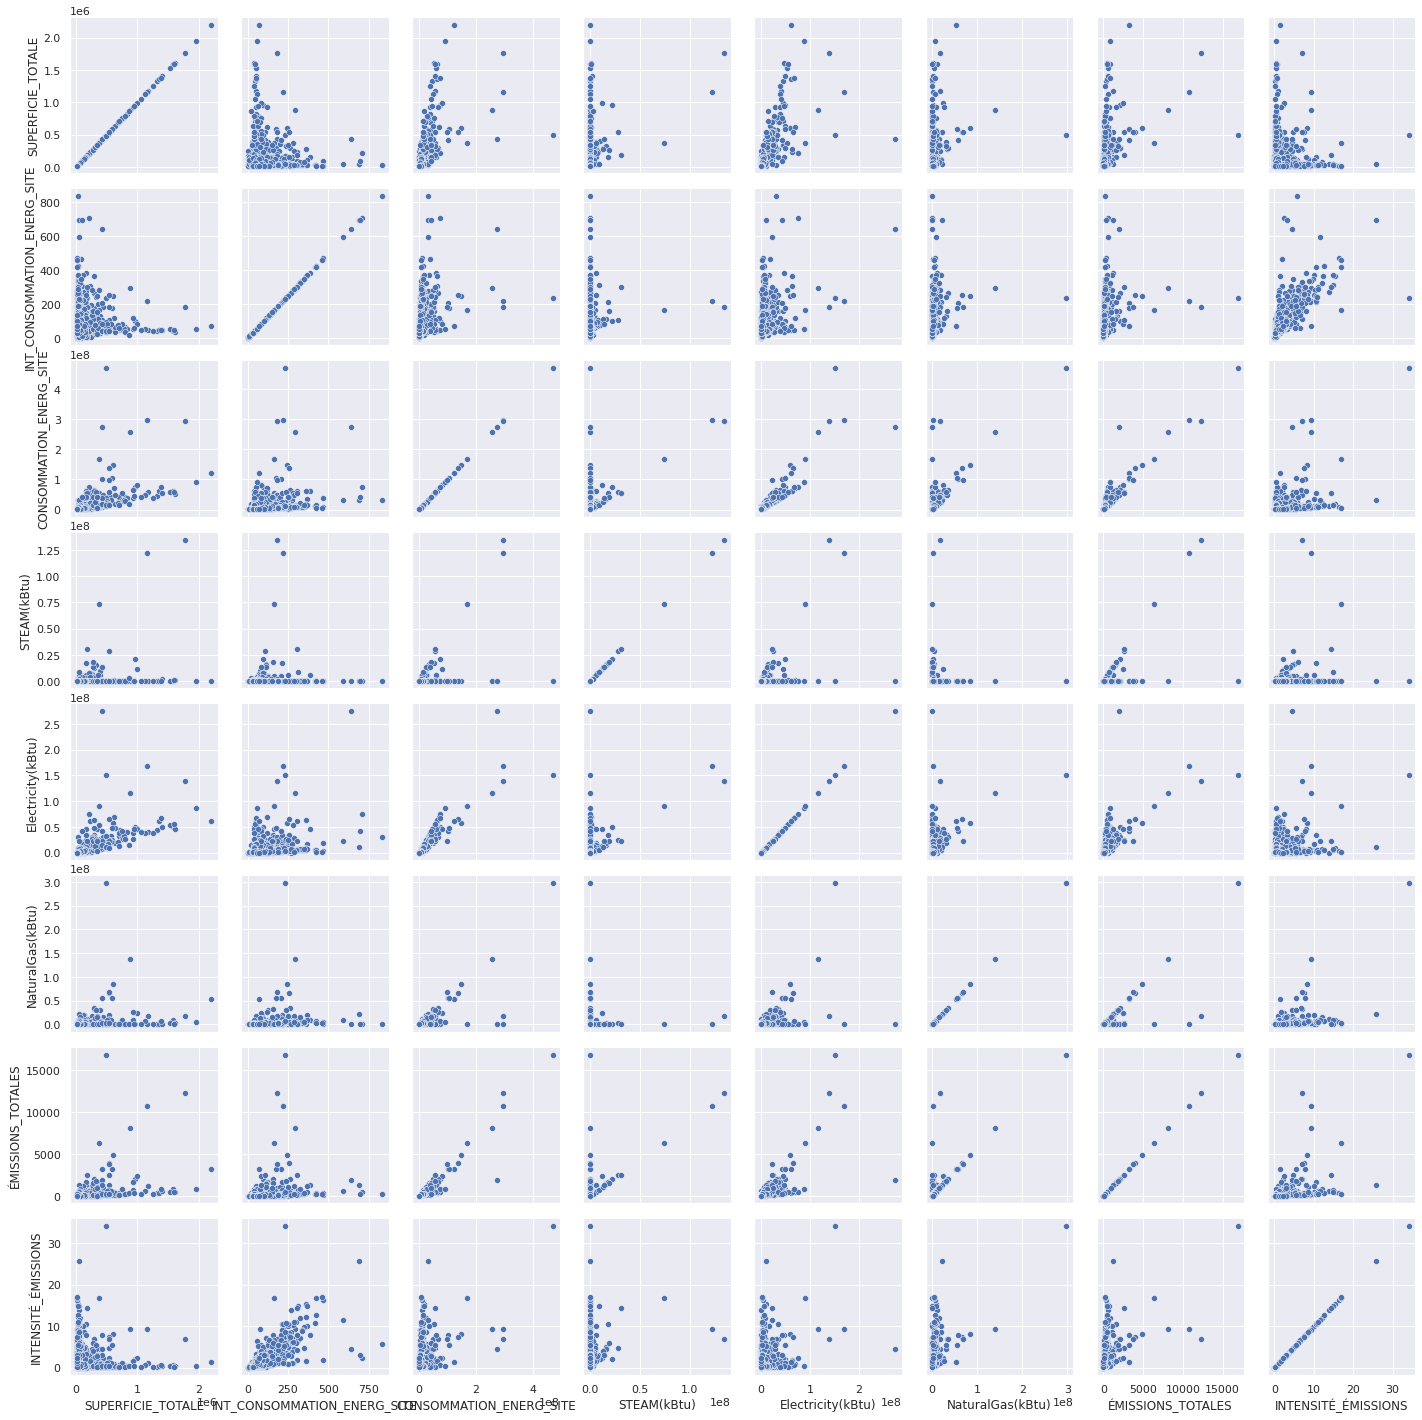

In [ ]:
g = sns.PairGrid(df[var_energy])
g.map(sns.scatterplot)
#plt.savefig('P4_N1_31b', dpi = 200)

## <a name="C32"> 3.2 Imputation des valeurs manquantes </a>   

In [ ]:
df[df['INT_CONSOMMATION_ENERG_SITE'].isna()] #Un seul individu
ind = df[df['INT_CONSOMMATION_ENERG_SITE'].isna()].index
df = df.drop(ind)
df = df.reset_index(drop=True)

## Typologie de valeurs manquantes

Objectif : Comprendre La typologie des valeurs manquantes  
 - MCAR (Missing completely at Random)
 - MAR (Missing at Random)
 - MNAR (Missing not at Random)
 
**H1**  : Les valeurs manquantes de PropertyUseType sont monotones, i.e, une valeur manquantes apparaît uniquement lorsque les variables de PropertyUse ont tous été référencé. 
Si je parviens à vérifier cette hypothèse, je remplacerai les valeurs manquantes par la mention 'NON APPLICABLE' pour les propertyusetype et 0 pour les surface associées.


**H2** : Le score ENERGYSTARSscore n'est renseigné que pour certaine catégorie de bâtiments.

In [ ]:
df[(~df['FONCTION_3'].isna()) &
  df['FONCTION_2'].isna()]

Empty DataFrame
Columns: [ID, TYPE, FONCTION_1, QUARTIER, LATITUDE, LONGITUDE, ANNÉE_CONST_REN, NBRE_IMMEUBLE, NBRE_ÉTAGE, SUPERFICIE_TOTALE, SUPERFICIE_PARKING, LargestPropertyUseType, LargestPropertyUseTypeGFA, FONCTION_2, SecondLargestPropertyUseTypeGFA, FONCTION_3, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, INT_CONSOMMATION_ENERG_SITE, CONSOMMATION_ENERG_SITE, STEAM(kBtu), Electricity(kBtu), NaturalGas(kBtu), CONFORMITE, ÉMISSIONS_TOTALES, INTENSITÉ_ÉMISSIONS, NB_NAN]
Index: []

[0 rows x 27 columns]

In [ ]:
df[(~df['FONCTION_2'].isna()) &
  df['FONCTION_1'].isna()]

Empty DataFrame
Columns: [ID, TYPE, FONCTION_1, QUARTIER, LATITUDE, LONGITUDE, ANNÉE_CONST_REN, NBRE_IMMEUBLE, NBRE_ÉTAGE, SUPERFICIE_TOTALE, SUPERFICIE_PARKING, LargestPropertyUseType, LargestPropertyUseTypeGFA, FONCTION_2, SecondLargestPropertyUseTypeGFA, FONCTION_3, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, INT_CONSOMMATION_ENERG_SITE, CONSOMMATION_ENERG_SITE, STEAM(kBtu), Electricity(kBtu), NaturalGas(kBtu), CONFORMITE, ÉMISSIONS_TOTALES, INTENSITÉ_ÉMISSIONS, NB_NAN]
Index: []

[0 rows x 27 columns]

In [ ]:
#Vérfication 1 
#Pas de PropertyUseTypeGFA sans PropertyUseType
df[(~df['FONCTION_2'].isna()) &
  df['SecondLargestPropertyUseTypeGFA'].isna()]

df[(~df['FONCTION_3'].isna()) &
  df['ThirdLargestPropertyUseTypeGFA'].isna()]

Empty DataFrame
Columns: [ID, TYPE, FONCTION_1, QUARTIER, LATITUDE, LONGITUDE, ANNÉE_CONST_REN, NBRE_IMMEUBLE, NBRE_ÉTAGE, SUPERFICIE_TOTALE, SUPERFICIE_PARKING, LargestPropertyUseType, LargestPropertyUseTypeGFA, FONCTION_2, SecondLargestPropertyUseTypeGFA, FONCTION_3, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, INT_CONSOMMATION_ENERG_SITE, CONSOMMATION_ENERG_SITE, STEAM(kBtu), Electricity(kBtu), NaturalGas(kBtu), CONFORMITE, ÉMISSIONS_TOTALES, INTENSITÉ_ÉMISSIONS, NB_NAN]
Index: []

[0 rows x 27 columns]

**H1** : vérfiée.

In [ ]:
df.columns

Index(['ID', 'TYPE', 'FONCTION_1', 'QUARTIER', 'LATITUDE', 'LONGITUDE',
       'ANNÉE_CONST_REN', 'NBRE_IMMEUBLE', 'NBRE_ÉTAGE', 'SUPERFICIE_TOTALE',
       'SUPERFICIE_PARKING', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'FONCTION_2',
       'SecondLargestPropertyUseTypeGFA', 'FONCTION_3',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'INT_CONSOMMATION_ENERG_SITE', 'CONSOMMATION_ENERG_SITE', 'STEAM(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'CONFORMITE',
       'ÉMISSIONS_TOTALES', 'INTENSITÉ_ÉMISSIONS', 'NB_NAN'],
      dtype='object')

In [ ]:
df[['FONCTION_2','FONCTION_3']] = df[['FONCTION_2','FONCTION_3']].fillna('NON APPLICABLE')

In [ ]:
df[['FONCTION_2','FONCTION_3']]

FONCTION_2            FONCTION_3
0     NON APPLICABLE        NON APPLICABLE
1            PARKING      BAR & RESTAURANT
2     NON APPLICABLE        NON APPLICABLE
3     NON APPLICABLE        NON APPLICABLE
4            PARKING  RECREATION & CULTURE
...              ...                   ...
1454  NON APPLICABLE        NON APPLICABLE
1455  NON APPLICABLE        NON APPLICABLE
1456   GYM/LIFESTYLE  RECREATION & CULTURE
1457   GYM/LIFESTYLE                SCHOOL
1458   GYM/LIFESTYLE                SCHOOL

[1459 rows x 2 columns]

In [ ]:
df[['SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']]= df[['SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']].fillna(0)

In [ ]:
df[df['LargestPropertyUseTypeGFA'].isna()].FONCTION_2

289     NON APPLICABLE
722     NON APPLICABLE
1199    NON APPLICABLE
1216    NON APPLICABLE
Name: FONCTION_2, dtype: object

In [ ]:
df.loc[df['LargestPropertyUseTypeGFA'].isna(), 
       'LargestPropertyUseTypeGFA'] = df.loc[df['LargestPropertyUseTypeGFA'].isna(),'SUPERFICIE_TOTALE']

In [ ]:
df['NAN_ENERGY']= df.isna().sum(axis=1)
df.loc[df['NAN_ENERGY'] > 1, 'NAN_ENERGY'] = 1

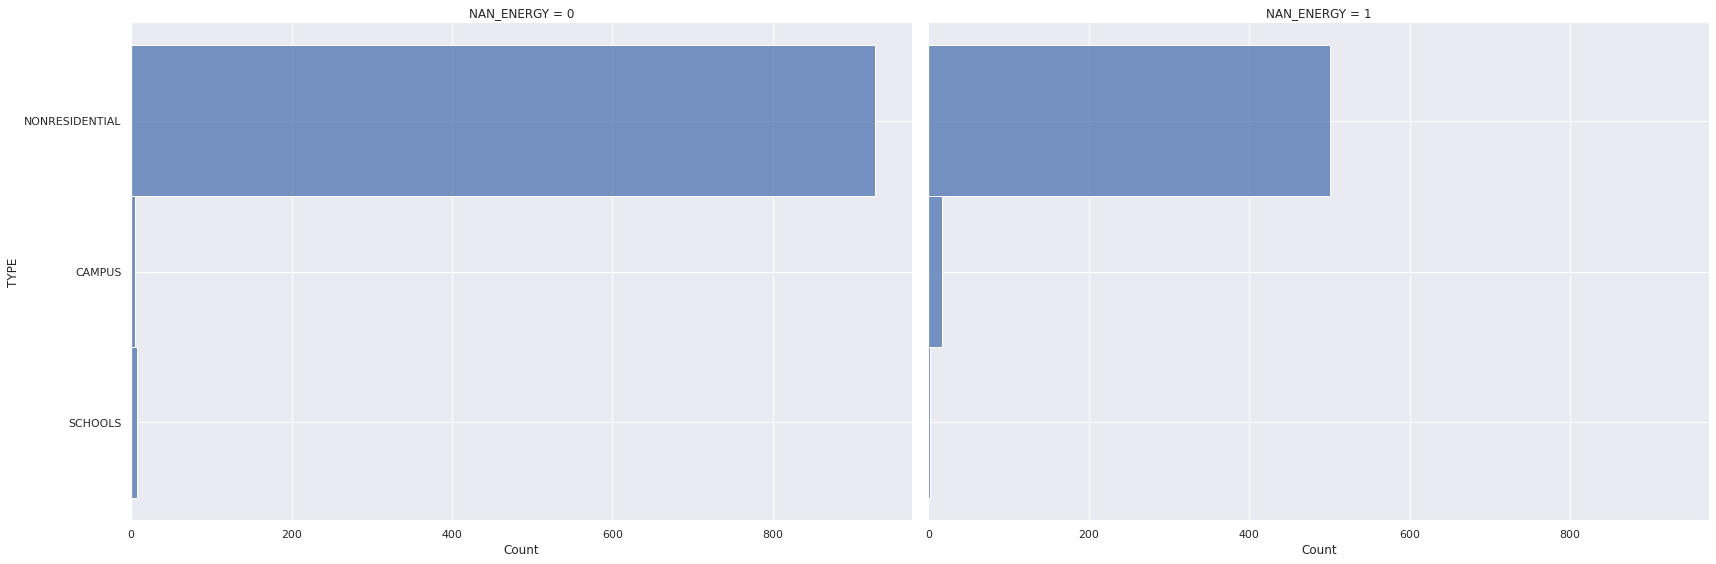

In [ ]:
sns.set()
sns.displot(data = df, y ='TYPE', kind = 'hist',
           col = 'NAN_ENERGY', height = 8., aspect= 1.5,
           )

**H2** : Hypothèses en partie vérifiée, les écoles et les campus n'ont pas d'EnergyStarScore. Et seulement 10% des valeurs EnergyStarsScore sont renseigné pour les types 'NON RESIDENTIAL'

In [ ]:
prop = round((len(df[(df['NAN_ENERGY']==0) & (df['TYPE']=='NONRESIDENTIAL')])/len(df))*100,2)
prop

63.54

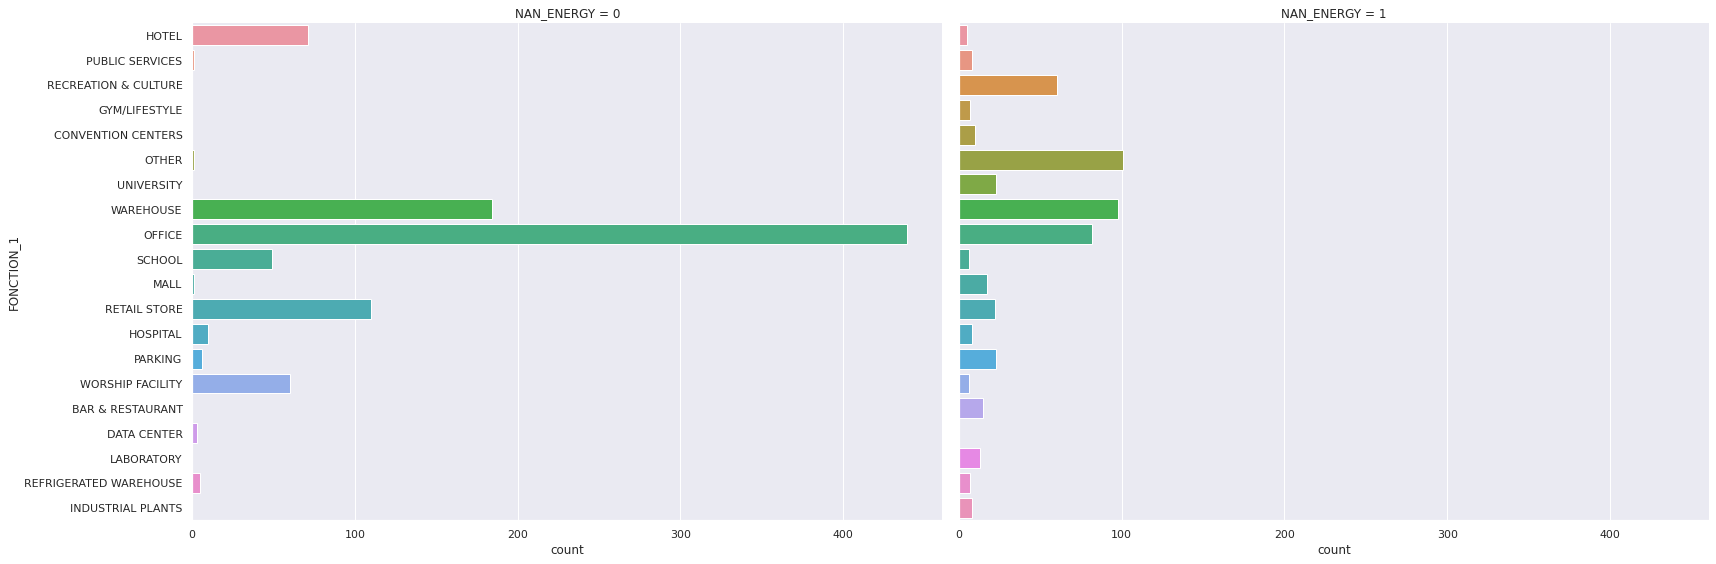

In [ ]:
sns.set()
sns.catplot(data = df, y ='FONCTION_1', kind = 'count',
           col = 'NAN_ENERGY', height = 8., aspect= 1.5,
           )

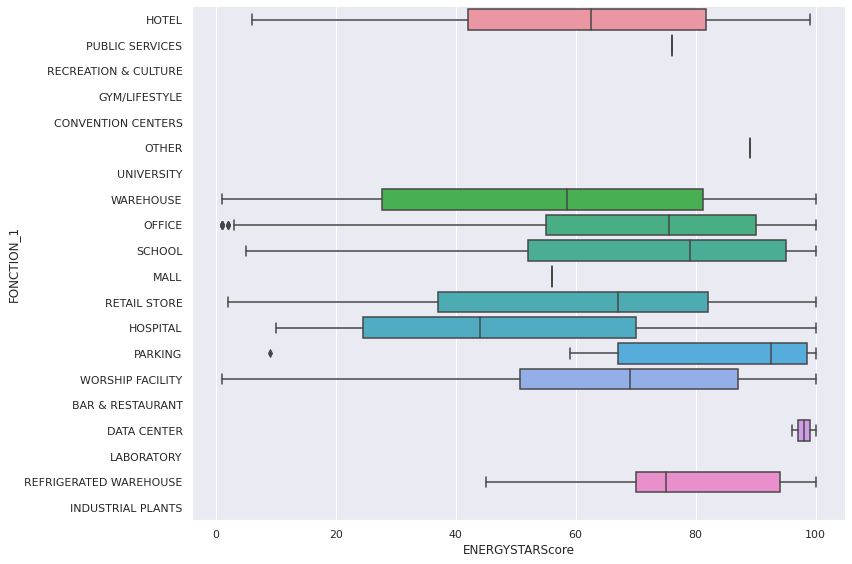

In [ ]:
sns.set()
sns.catplot(data = df, x = 'ENERGYSTARScore', y ='FONCTION_1', kind = 'box',
           #col = 'NAN_ENERGY', 
            height = 8., aspect= 1.5,
           )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               1459 non-null   object 
 1   TYPE                             1459 non-null   object 
 2   FONCTION_1                       1459 non-null   object 
 3   QUARTIER                         1459 non-null   object 
 4   LATITUDE                         1459 non-null   float64
 5   LONGITUDE                        1459 non-null   float64
 6   ANNÉE_CONST_REN                  1459 non-null   int64  
 7   NBRE_IMMEUBLE                    1459 non-null   float64
 8   NBRE_ÉTAGE                       1459 non-null   int64  
 9   SUPERFICIE_TOTALE                1459 non-null   int64  
 10  SUPERFICIE_PARKING               1459 non-null   int64  
 11  LargestPropertyUseType           1455 non-null   object 
 12  LargestPropertyUseTy

## ENERGYSTARScore

36% des valeurs de l'ENERGYSTARScore sont à imputer. 
Je choisi l'approche du KNN imputer, car aucune variable disponible ne semble linéairement corrélée au score energy.

https://www.energystar.gov/buildings/benchmark/understand_metrics/how_score_calculated


Les critères utilisés pour calculer l'ENERGYSTARScore : 

## À COMPLÉTER

In [ ]:
from category_encoders import *

# OneHotEncoder
enc = OneHotEncoder(cols=['TYPE'], use_cat_names= True).fit(df.sort_values('TYPE'))

# transform the dataset
df_enc = enc.transform(df)

# OneHotEncoder
enc = OneHotEncoder(cols=['QUARTIER'], use_cat_names= True).fit(df_enc.sort_values('QUARTIER'))

# transform the dataset
df_enc = enc.transform(df_enc)

# OneHotEncoder
enc = OneHotEncoder(cols=['FONCTION_1'], use_cat_names= True).fit(df_enc.sort_values('FONCTION_1'))

# transform the dataset
df_enc = enc.transform(df_enc)


In [ ]:
df_enc

ID  TYPE_CAMPUS  TYPE_NONRESIDENTIAL  TYPE_SCHOOLS  \
0         1            0                    1             0   
1         2            0                    1             0   
2         3            0                    1             0   
3         5            0                    1             0   
4         8            0                    1             0   
...     ...          ...                  ...           ...   
1454  50221            0                    1             0   
1455  50223            0                    1             0   
1456  50224            0                    1             0   
1457  50225            0                    1             0   
1458  50226            0                    1             0   

      FONCTION_1_BAR & RESTAURANT  FONCTION_1_CONVENTION CENTERS  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
1454                            0                              0   
1455                            0                              0   
1456                            0                              0   
1457                            0                              0   
1458                            0                              0   

      FONCTION_1_DATA CENTER  FONCTION_1_GYM/LIFESTYLE  FONCTION_1_HOSPITAL  \
0                          0                         0                    0   
1                          0                         0                    0   
2                          0                         0                    0   
3                          0                         0                    0   
4                          0                         0                    0   
...                      ...                       ...                  ...   
1454                       0                         0                    0   
1455                       0                         0                    0   
1456                       0                         0                    0   
1457                       0                         0                    0   
1458                       0                         0                    0   

      FONCTION_1_HOTEL  ...  INT_CONSOMMATION_ENERG_SITE  \
0                    1  ...                    84.300003   
1                    1  ...                    97.900002   
2                    1  ...                    97.699997   
3                    1  ...                   113.300003   
4                    1  ...                   118.699997   
...                ...  ...                          ...   
1454                 0  ...                    56.200001   
1455                 0  ...                    65.900002   
1456                 0  ...                   460.100006   
1457                 0  ...                    55.500000   
1458                 0  ...                    70.900002   

      CONSOMMATION_ENERG_SITE  STEAM(kBtu)  Electricity(kBtu)  \
0                7.456910e+06   2003882.00       3.946027e+06   
1                8.664479e+06         0.00       3.242851e+06   
2                7.393711e+07  21566554.00       4.952666e+07   
3                6.946800e+06   2214446.25       2.768924e+06   
4                1.465650e+07         0.00       5.368607e+06   
...                       ...          ...                ...   
1454             1.025432e+06         0.00       6.323620e+05   
1455             1.053706e+06         0.00       3.965461e+05   
1456             6.053764e+06         0.00       1.792159e+06   
1457             7.828413e+05         0.00       3.488702e+05   
1458             1.293722e+06         0.00       4

In [ ]:
df_enc.columns 

Index(['ID', 'TYPE_CAMPUS', 'TYPE_NONRESIDENTIAL', 'TYPE_SCHOOLS',
       'FONCTION_1_BAR & RESTAURANT', 'FONCTION_1_CONVENTION CENTERS',
       'FONCTION_1_DATA CENTER', 'FONCTION_1_GYM/LIFESTYLE',
       'FONCTION_1_HOSPITAL', 'FONCTION_1_HOTEL',
       'FONCTION_1_INDUSTRIAL PLANTS', 'FONCTION_1_LABORATORY',
       'FONCTION_1_MALL', 'FONCTION_1_OFFICE', 'FONCTION_1_OTHER',
       'FONCTION_1_PARKING', 'FONCTION_1_PUBLIC SERVICES',
       'FONCTION_1_RECREATION & CULTURE', 'FONCTION_1_REFRIGERATED WAREHOUSE',
       'FONCTION_1_RETAIL STORE', 'FONCTION_1_SCHOOL', 'FONCTION_1_UNIVERSITY',
       'FONCTION_1_WAREHOUSE', 'FONCTION_1_WORSHIP FACILITY',
       'QUARTIER_BALLARD', 'QUARTIER_CENTRAL', 'QUARTIER_DELRIDGE',
       'QUARTIER_DOWNTOWN', 'QUARTIER_EAST', 'QUARTIER_GREATER DUWAMISH',
       'QUARTIER_LAKE UNION', 'QUARTIER_MAGNOLIA  QUEEN ANNE',
       'QUARTIER_NORTH', 'QUARTIER_NORTHEAST', 'QUARTIER_NORTHWEST',
       'QUARTIER_SOUTHEAST', 'QUARTIER_SOUTHWEST', 'LATITUDE', 'LO

Text(0.5, 1.0, "Distribution de l'ENERGYSTARScore avant imputation des valeurs manquantes")

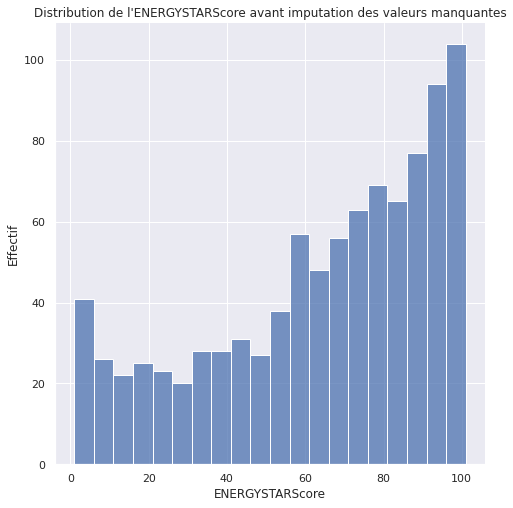

In [ ]:
sns.set()
g = sns.displot(data = df_enc, x = 'ENERGYSTARScore', binwidth = 5,
           height = 7. , aspect = 1.)
g.set_ylabels('Effectif')
plt.title('Distribution de l\'ENERGYSTARScore avant imputation des valeurs manquantes')

In [ ]:
df['ENERGYSTARScore'].describe()

count    942.000000
mean      63.710191
std       28.684585
min        1.000000
25%       44.000000
50%       71.000000
75%       88.000000
max      100.000000
Name: ENERGYSTARScore, dtype: float64

In [ ]:
df['ENERGYSTARScore'].skew()

-0.6750922884464674

In [ ]:
df['ENERGYSTARScore'].kurt()

-0.6578618335742599

In [ ]:
from sklearn.impute import KNNImputer
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler()

In [ ]:
df_enc = df_enc.drop(columns = 'NB_NAN')

In [ ]:
ind = df_enc.dtypes[df_enc.dtypes !='object'].index
ind

Index(['TYPE_CAMPUS', 'TYPE_NONRESIDENTIAL', 'TYPE_SCHOOLS',
       'FONCTION_1_BAR & RESTAURANT', 'FONCTION_1_CONVENTION CENTERS',
       'FONCTION_1_DATA CENTER', 'FONCTION_1_GYM/LIFESTYLE',
       'FONCTION_1_HOSPITAL', 'FONCTION_1_HOTEL',
       'FONCTION_1_INDUSTRIAL PLANTS', 'FONCTION_1_LABORATORY',
       'FONCTION_1_MALL', 'FONCTION_1_OFFICE', 'FONCTION_1_OTHER',
       'FONCTION_1_PARKING', 'FONCTION_1_PUBLIC SERVICES',
       'FONCTION_1_RECREATION & CULTURE', 'FONCTION_1_REFRIGERATED WAREHOUSE',
       'FONCTION_1_RETAIL STORE', 'FONCTION_1_SCHOOL', 'FONCTION_1_UNIVERSITY',
       'FONCTION_1_WAREHOUSE', 'FONCTION_1_WORSHIP FACILITY',
       'QUARTIER_BALLARD', 'QUARTIER_CENTRAL', 'QUARTIER_DELRIDGE',
       'QUARTIER_DOWNTOWN', 'QUARTIER_EAST', 'QUARTIER_GREATER DUWAMISH',
       'QUARTIER_LAKE UNION', 'QUARTIER_MAGNOLIA  QUEEN ANNE',
       'QUARTIER_NORTH', 'QUARTIER_NORTHEAST', 'QUARTIER_NORTHWEST',
       'QUARTIER_SOUTHEAST', 'QUARTIER_SOUTHWEST', 'LATITUDE', 'LONGITUD

In [ ]:
X = df_enc[ind].values
X_scaled = std_scale.fit_transform(X)

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from sklearn.neighbors import DistanceMetric

In [ ]:
def man_distance(X,Y,missing_values=np.nan): 
    #X, Y, deux vecteurs type np.array de dimensions n égales 
    dist_= 0
    count = 0
    #vérification 
    if len(X) != len(Y):
        print('Erreur : les vecteurs doivent avoir la même dimension')
    else: 
        for i in range(len(X)):
             #Compte les coordonnées manquantes
            if (np.isnan(X[i]) | np.isnan(Y[i])):
                count+=1
                dist_+=0
                #print('cas 1','count =', count,'dist=', dist_)
                if count == len(X):
                    #print('cas 1a','count =', count,'dist=', dist_)
                    dist_ = np.nan
            else: 
                dist_ += abs(X[i] - Y[i])
                #print('cas 2','count =', count,'dist=', dist_)
        if count >0:
            weight = count/len(X)
            #print('weight= ',weight)
            dist_ = dist_*weight 
        #print('distance finale',dist_)
    return dist_

In [ ]:
def _pairwise_callable1(X, Y=None, *, missing_values=np.nan):
    dist_ = pairwise_distances(X,Y, man_distance ,force_all_finite = 'allow-nan')
    dist_ = dist_.reshape(len(X), 2)
    return dist_

In [ ]:
X = np.array([2, 3])
Y = np.array([1, 3])
X,Y

(array([2, 3]), array([1, 3]))

In [ ]:
man_distance(X,Y)

1

In [ ]:
X = np.array([[1, 0], [3, 5], [5, 8]])
Y = np.array([[1, 9], [2, np.nan]])
X,Y

(array([[1, 0],
        [3, 5],
        [5, 8]]), array([[ 1.,  9.],
        [ 2., nan]]))

In [ ]:
d = _pairwise_callable1(X, Y, missing_values=np.nan)
d

array([[9. , 0.5],
       [6. , 0.5],
       [5. , 1.5]])

In [ ]:
d = pairwise_distances(X,Y, man_distance,force_all_finite = 'allow-nan')
d.shape

(3, 2)

In [ ]:
X = np.array([np.nan , 8, 10, 2, 7])
Y = np.array([1, 9, 7, 19, np.nan])
               

In [ ]:
X_scaled

array([[-0.12373226,  0.14974868, -0.08307413, ...,  0.08335688,
         0.48164817, -0.74305293],
       [-0.12373226,  0.14974868, -0.08307413, ...,  0.14482109,
         0.49399667, -0.74305293],
       [-0.12373226,  0.14974868, -0.08307413, ...,  2.54741823,
         0.21821337, -0.74305293],
       ...,
       [-0.12373226,  0.14974868, -0.08307413, ...,  0.04793591,
         6.31014311,  1.34579914],
       [-0.12373226,  0.14974868, -0.08307413, ..., -0.22191451,
        -0.03698909,  1.34579914],
       [-0.12373226,  0.14974868, -0.08307413, ..., -0.19624636,
         0.24702655,  1.34579914]])

- ### Cross-validation pour KNN-imputation

count    1459.000000
mean       62.256340
std        29.083958
min         1.000000
25%        43.000000
50%        69.000000
75%        89.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64 k =  1
-0.602603727868896 k =  1
-0.7779954707781567 k =  1
count    1459.000000
mean       62.321876
std        27.171415
min         1.000000
25%        43.236548
50%        67.504135
75%        85.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64 k =  2
-0.587028784037062 k =  2
-0.6292332486650203 k =  2
count    1459.000000
mean       62.341755
std        26.237699
min         1.000000
25%        45.042643
50%        67.000000
75%        83.824521
max       100.000000
Name: ENERGYSTARScore, dtype: float64 k =  3
-0.58346842662016 k =  3
-0.534836184458924 k =  3
count    1459.000000
mean       62.497940
std        25.732021
min         1.000000
25%        45.193838
50%        66.040030
75%        83.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float6

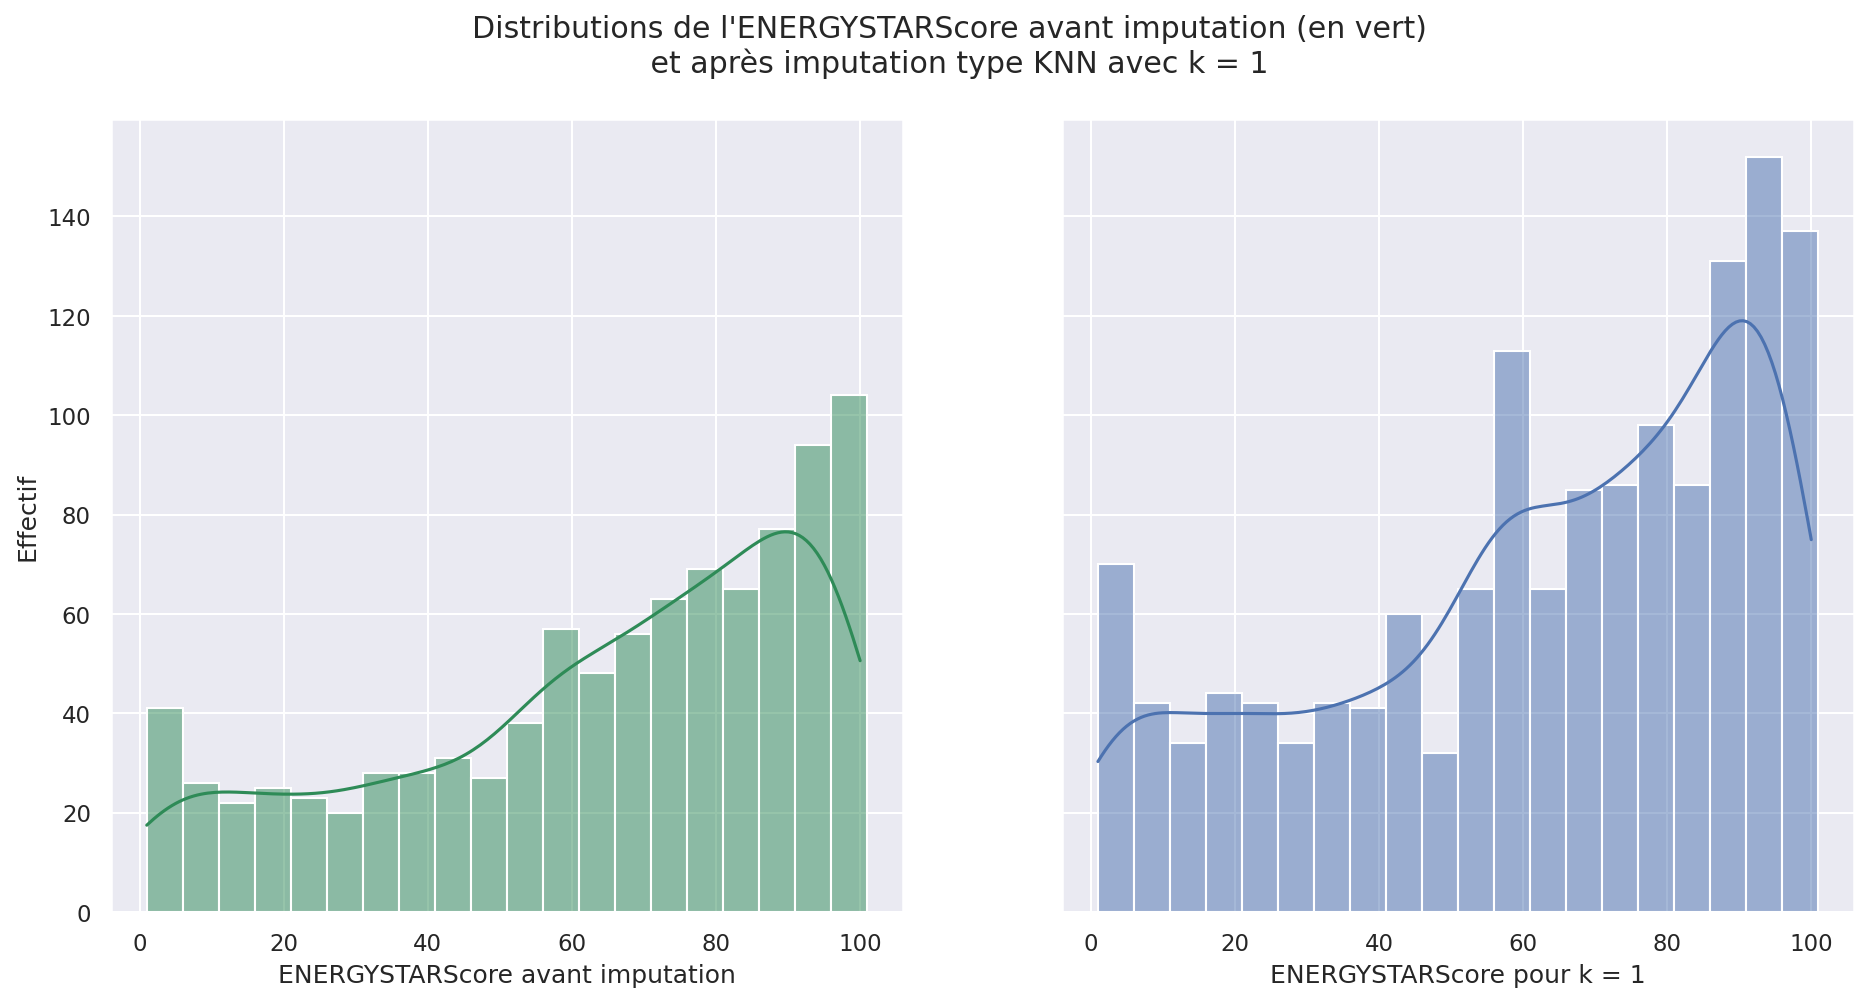

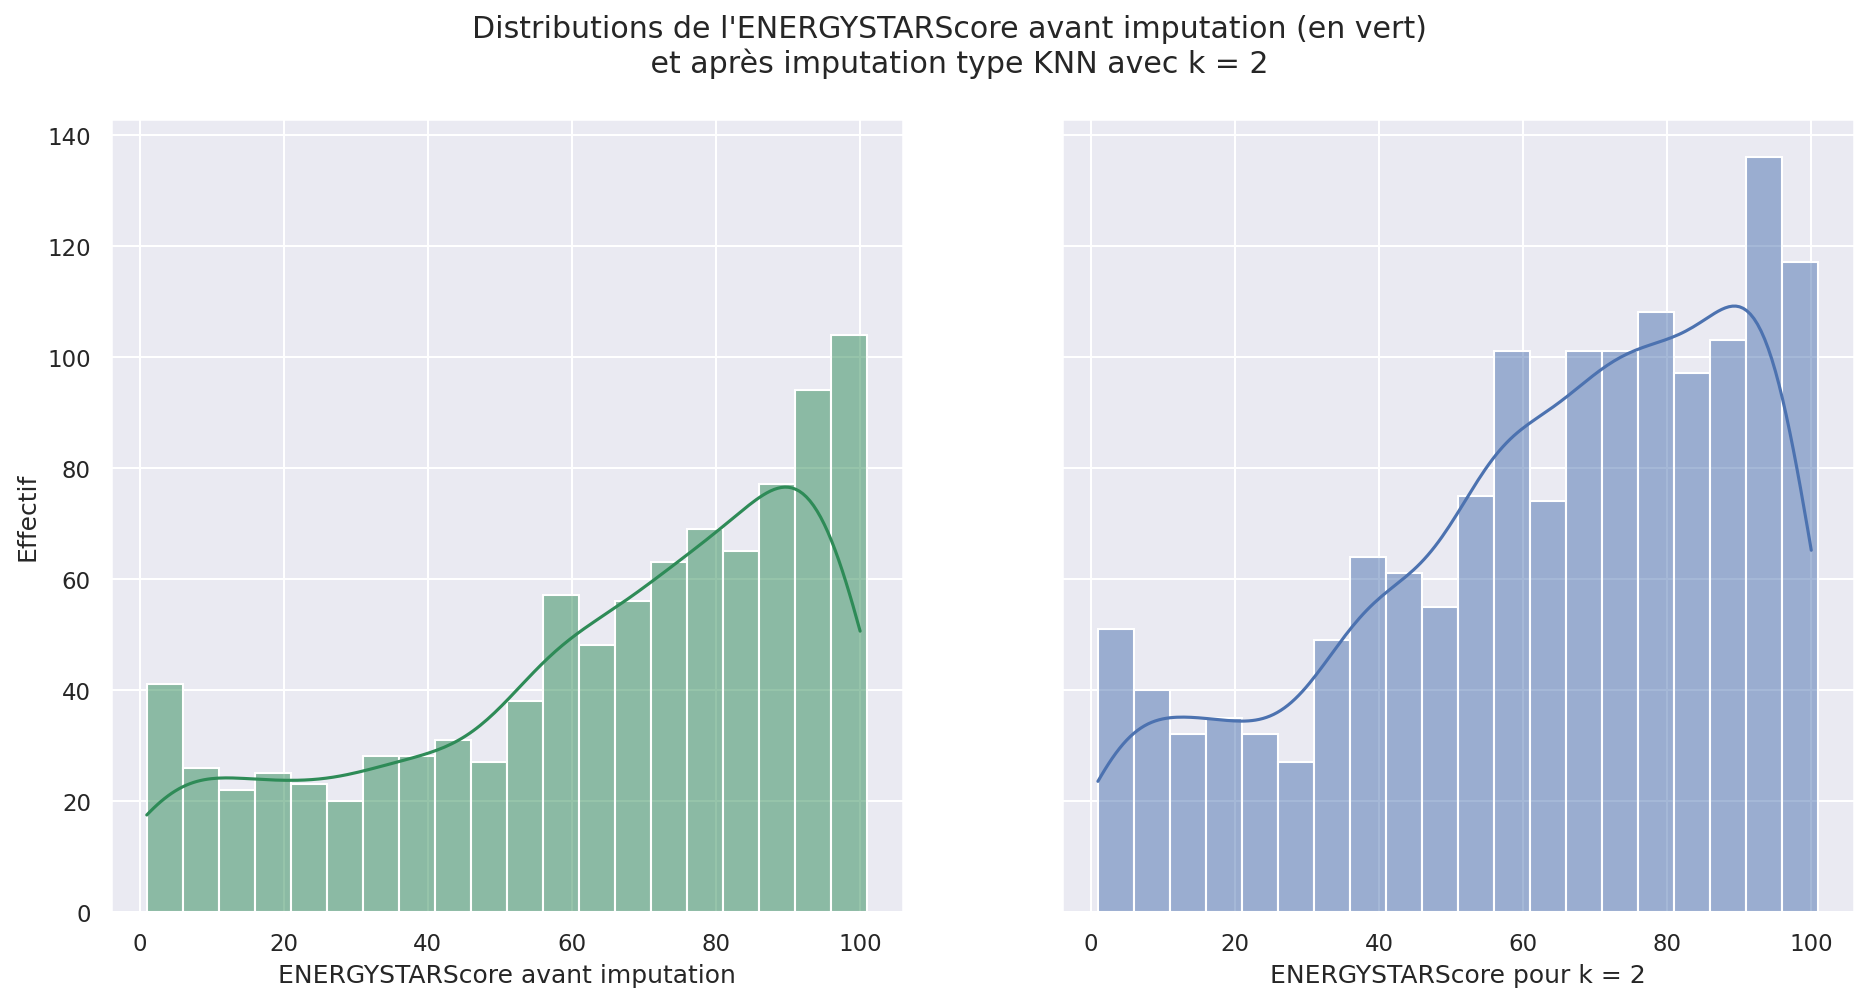

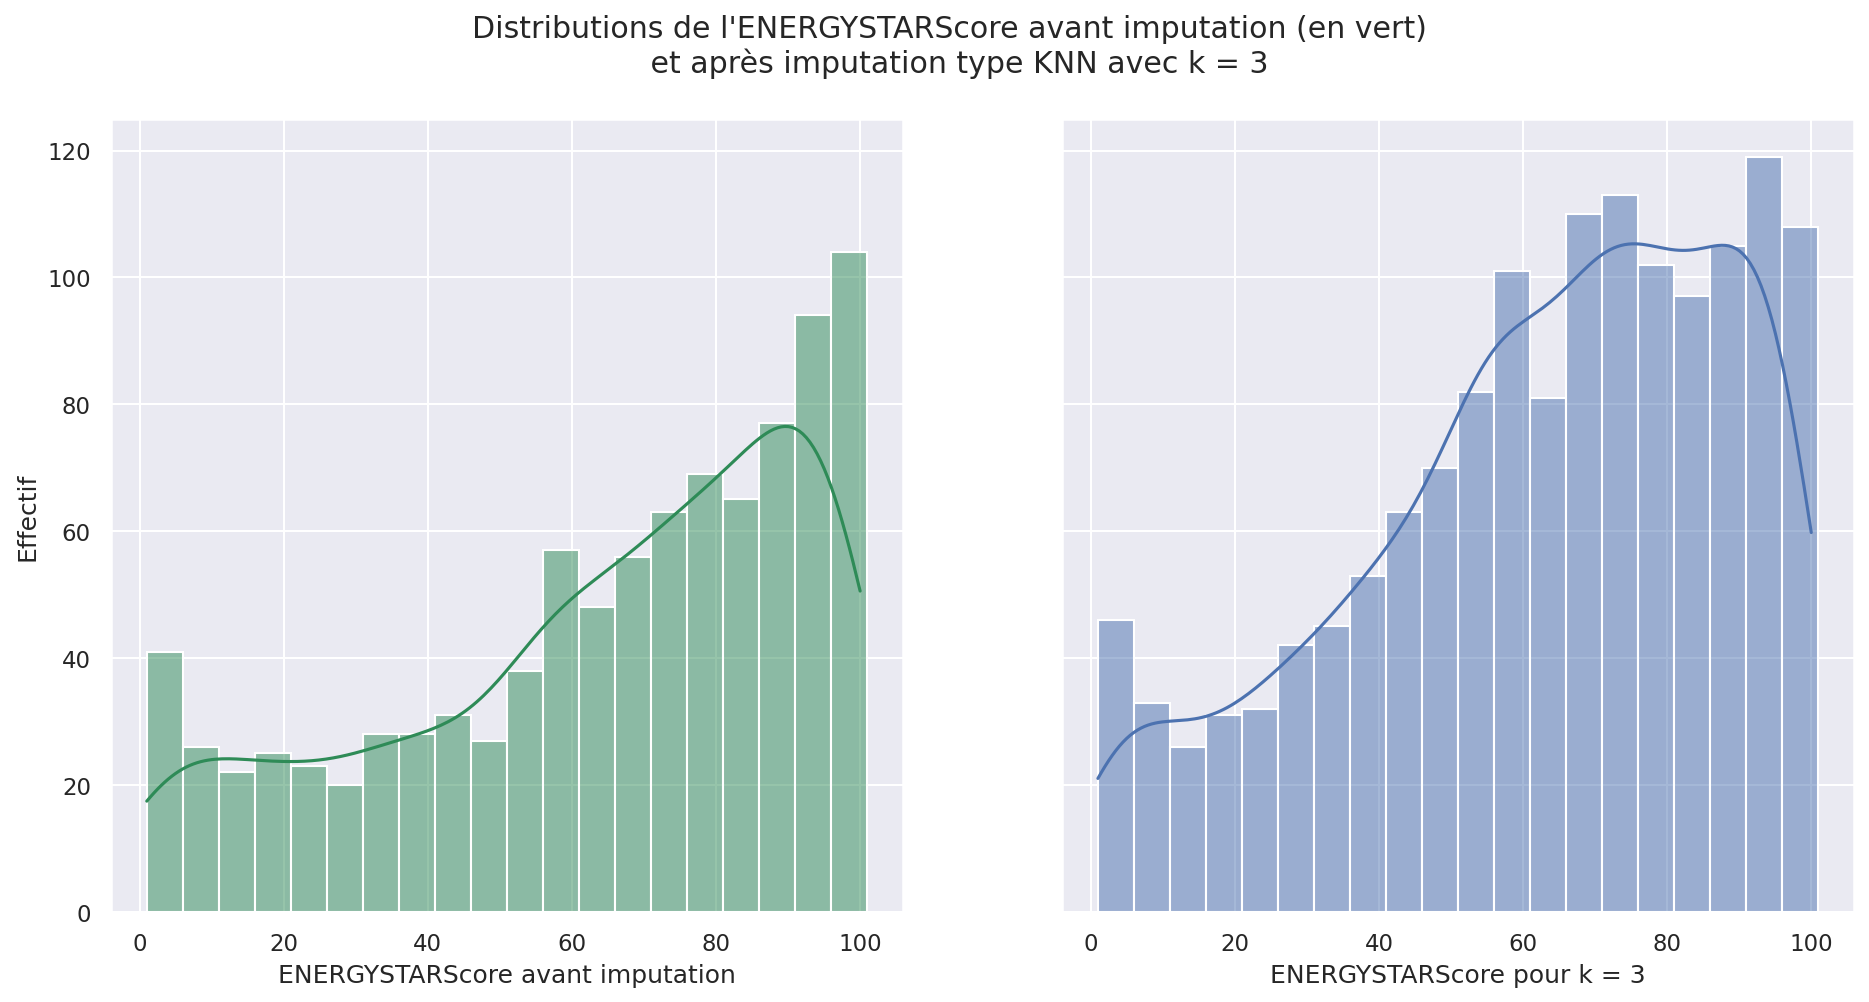

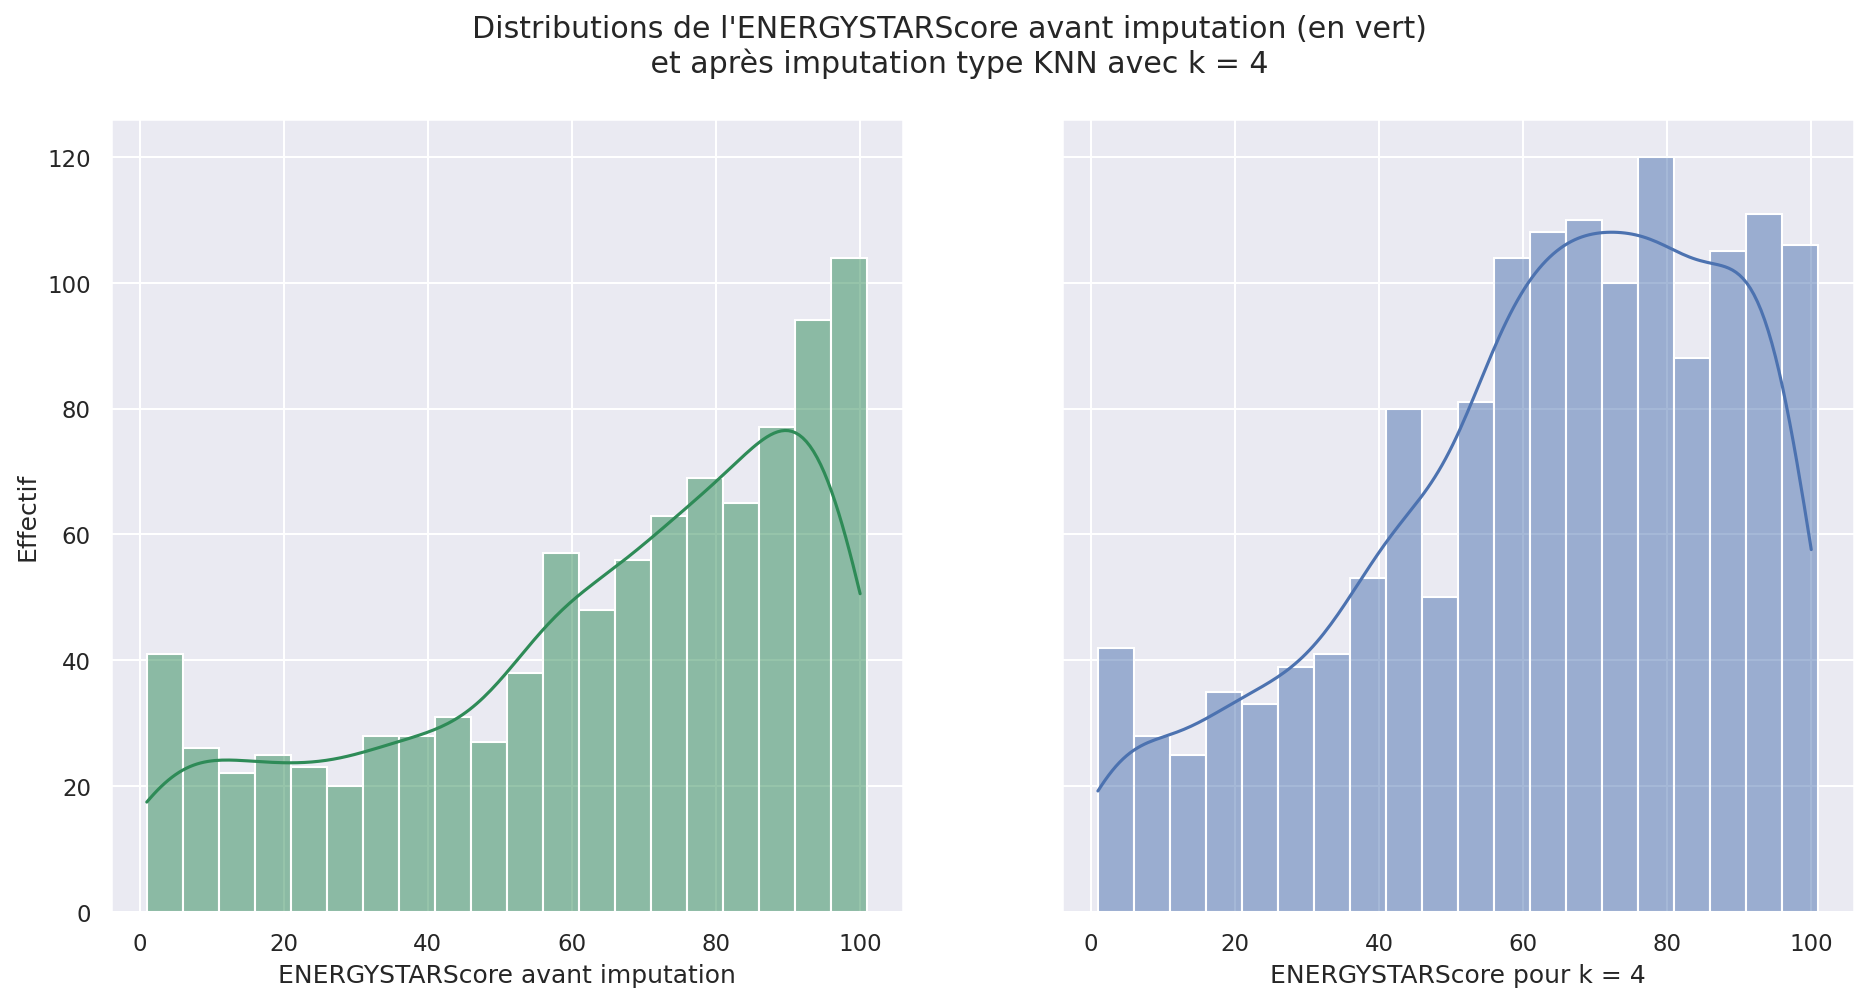

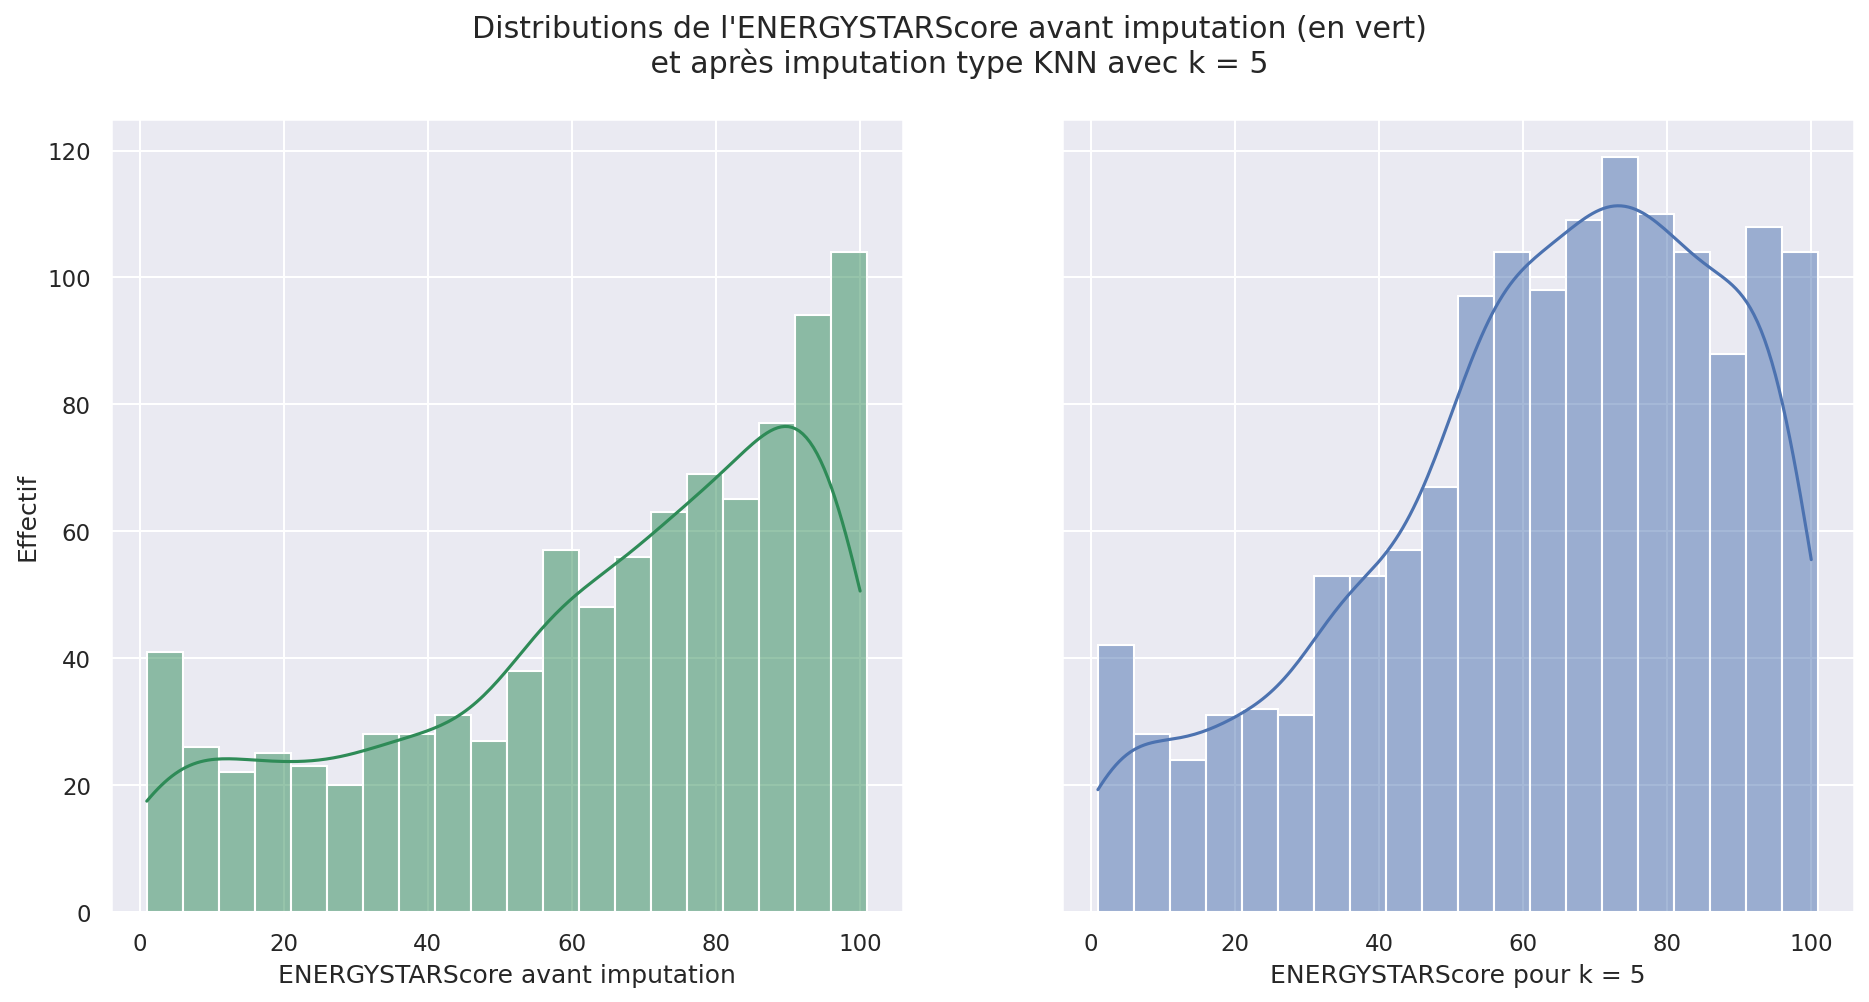

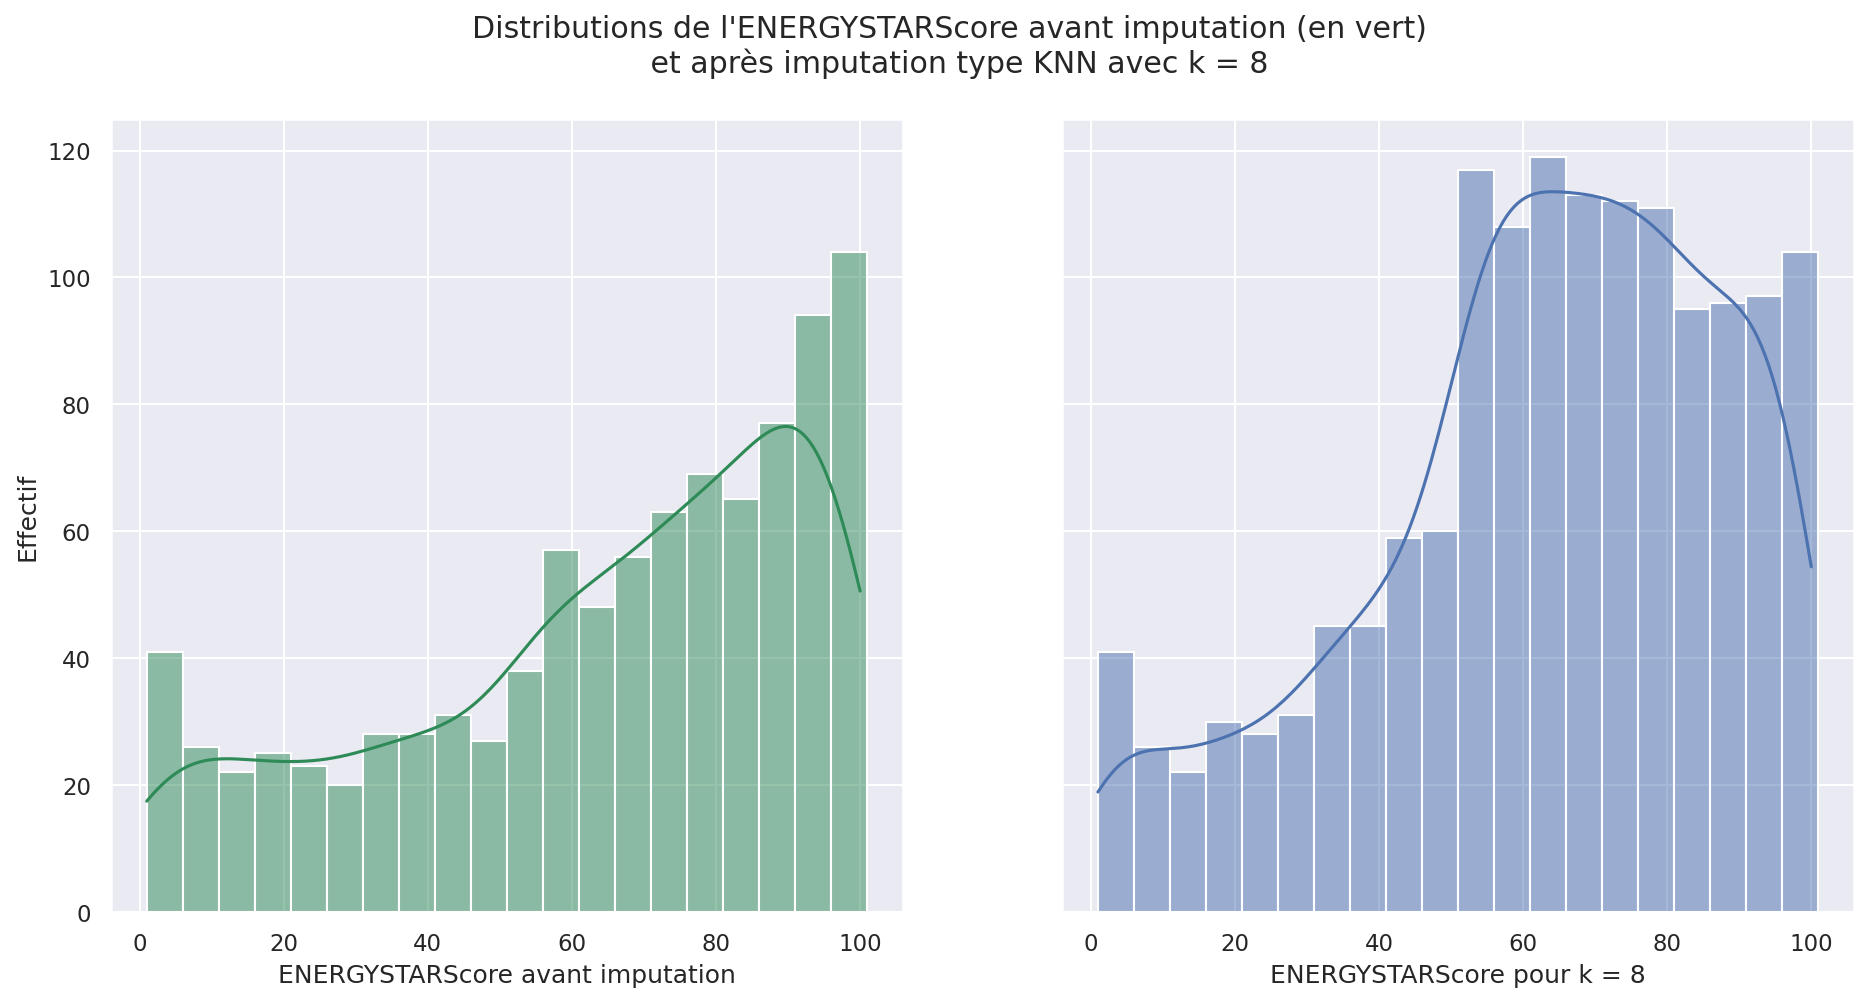

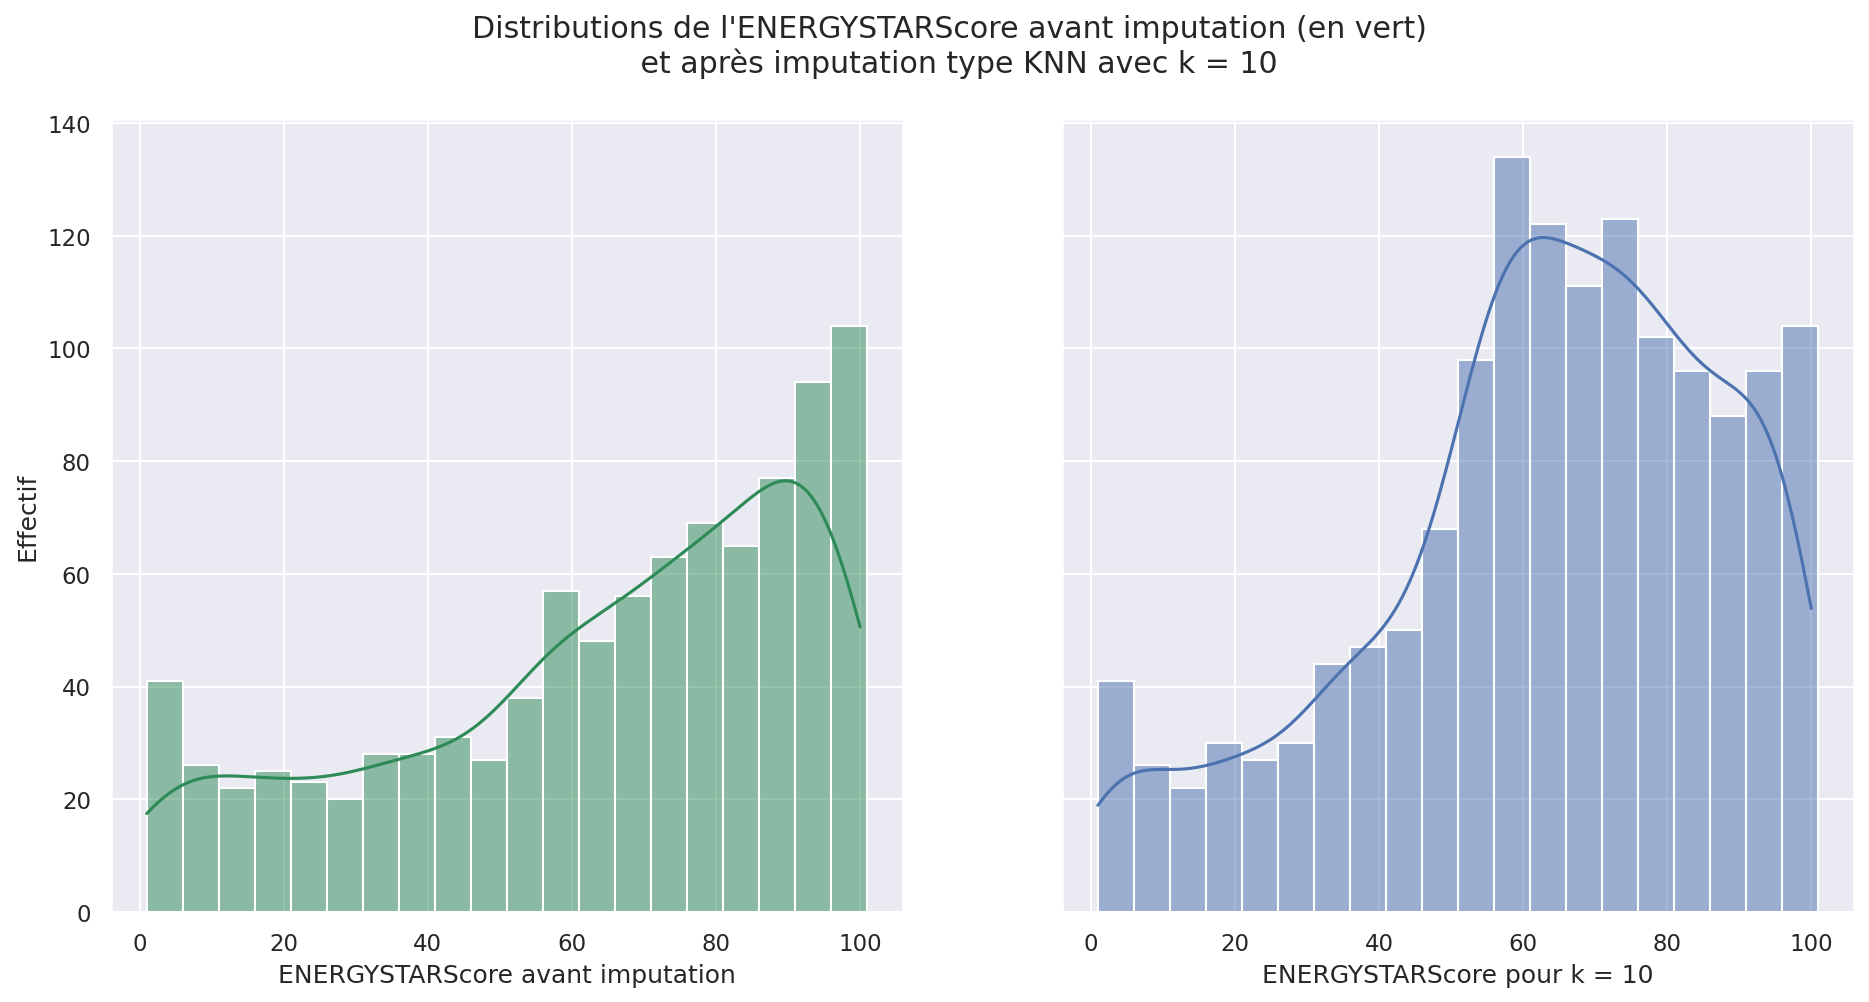

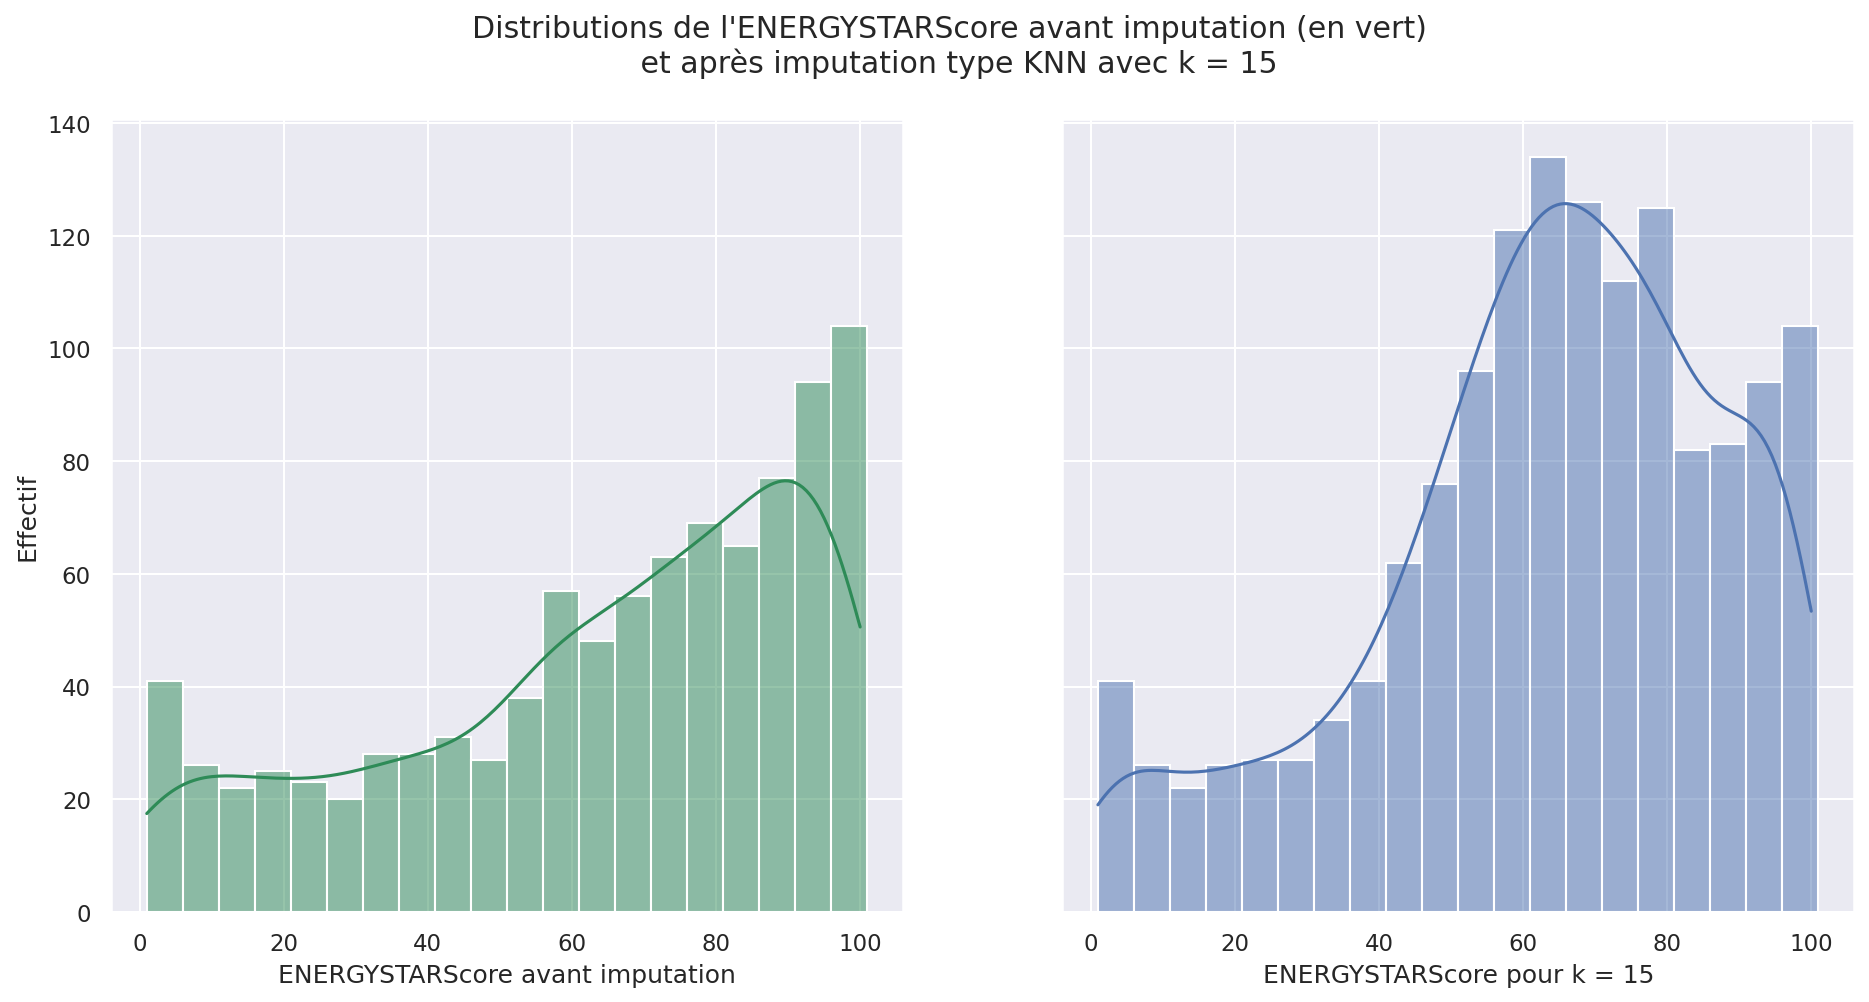

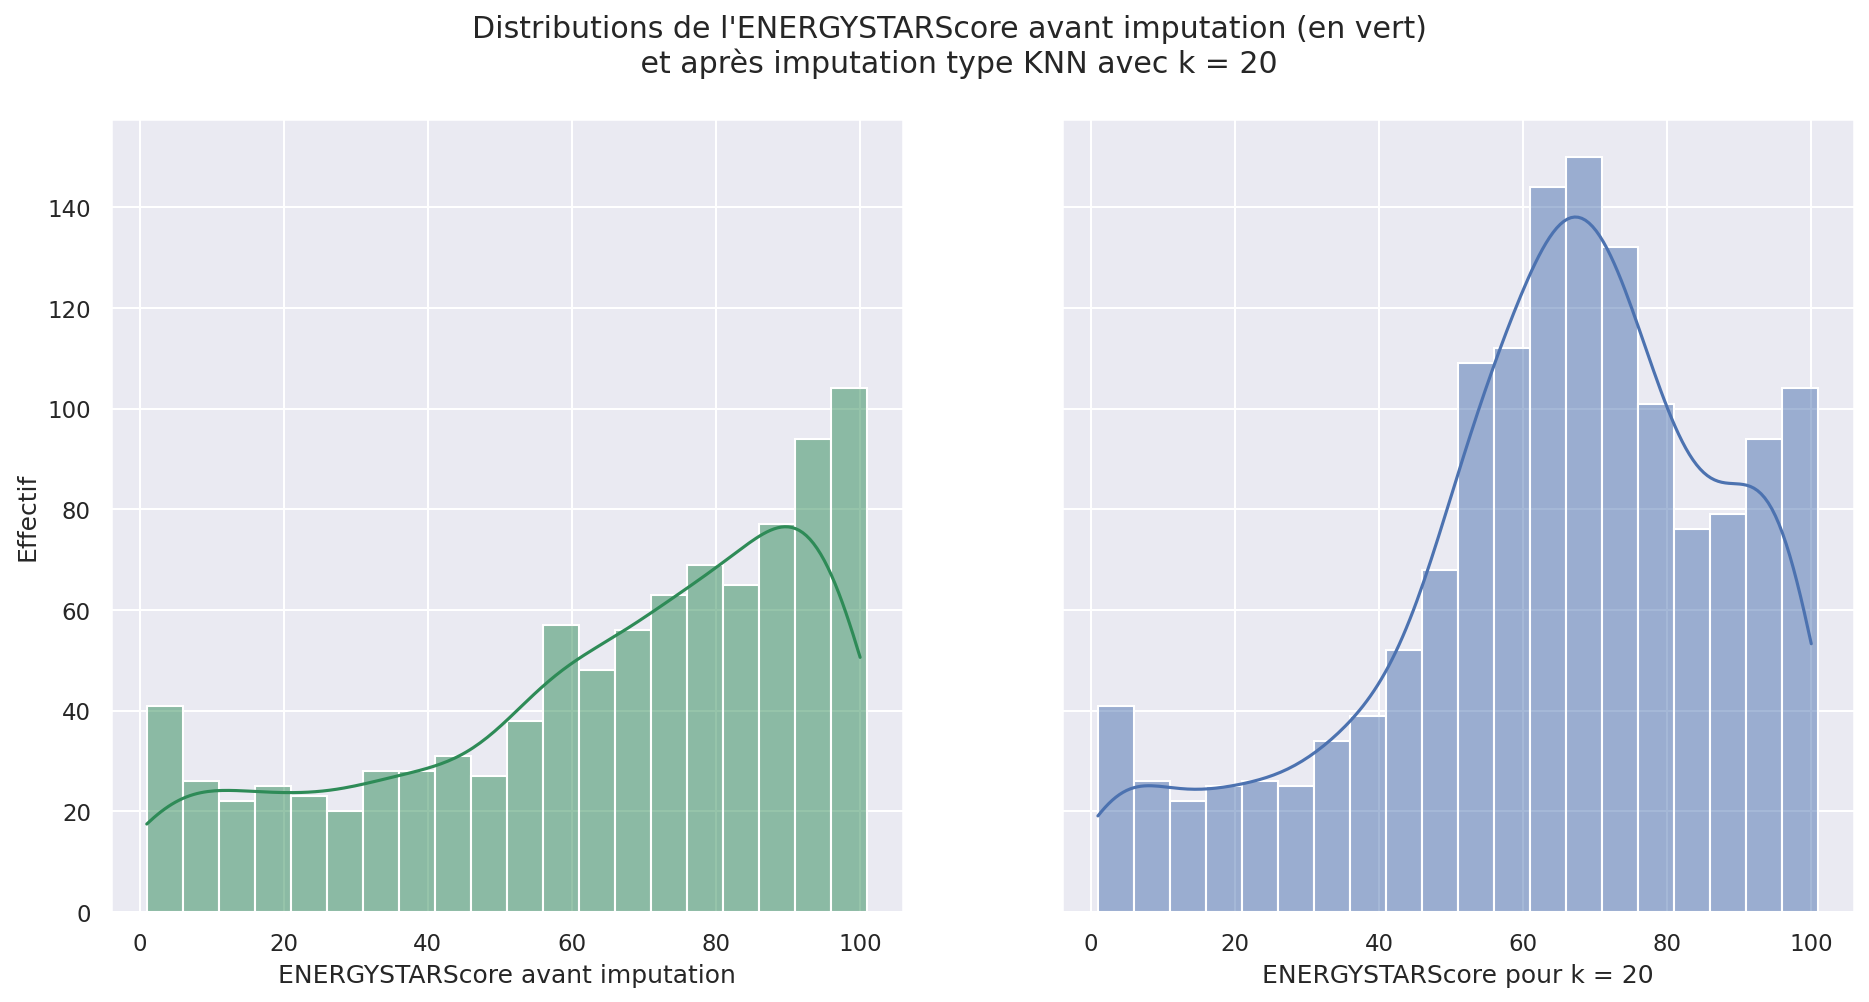

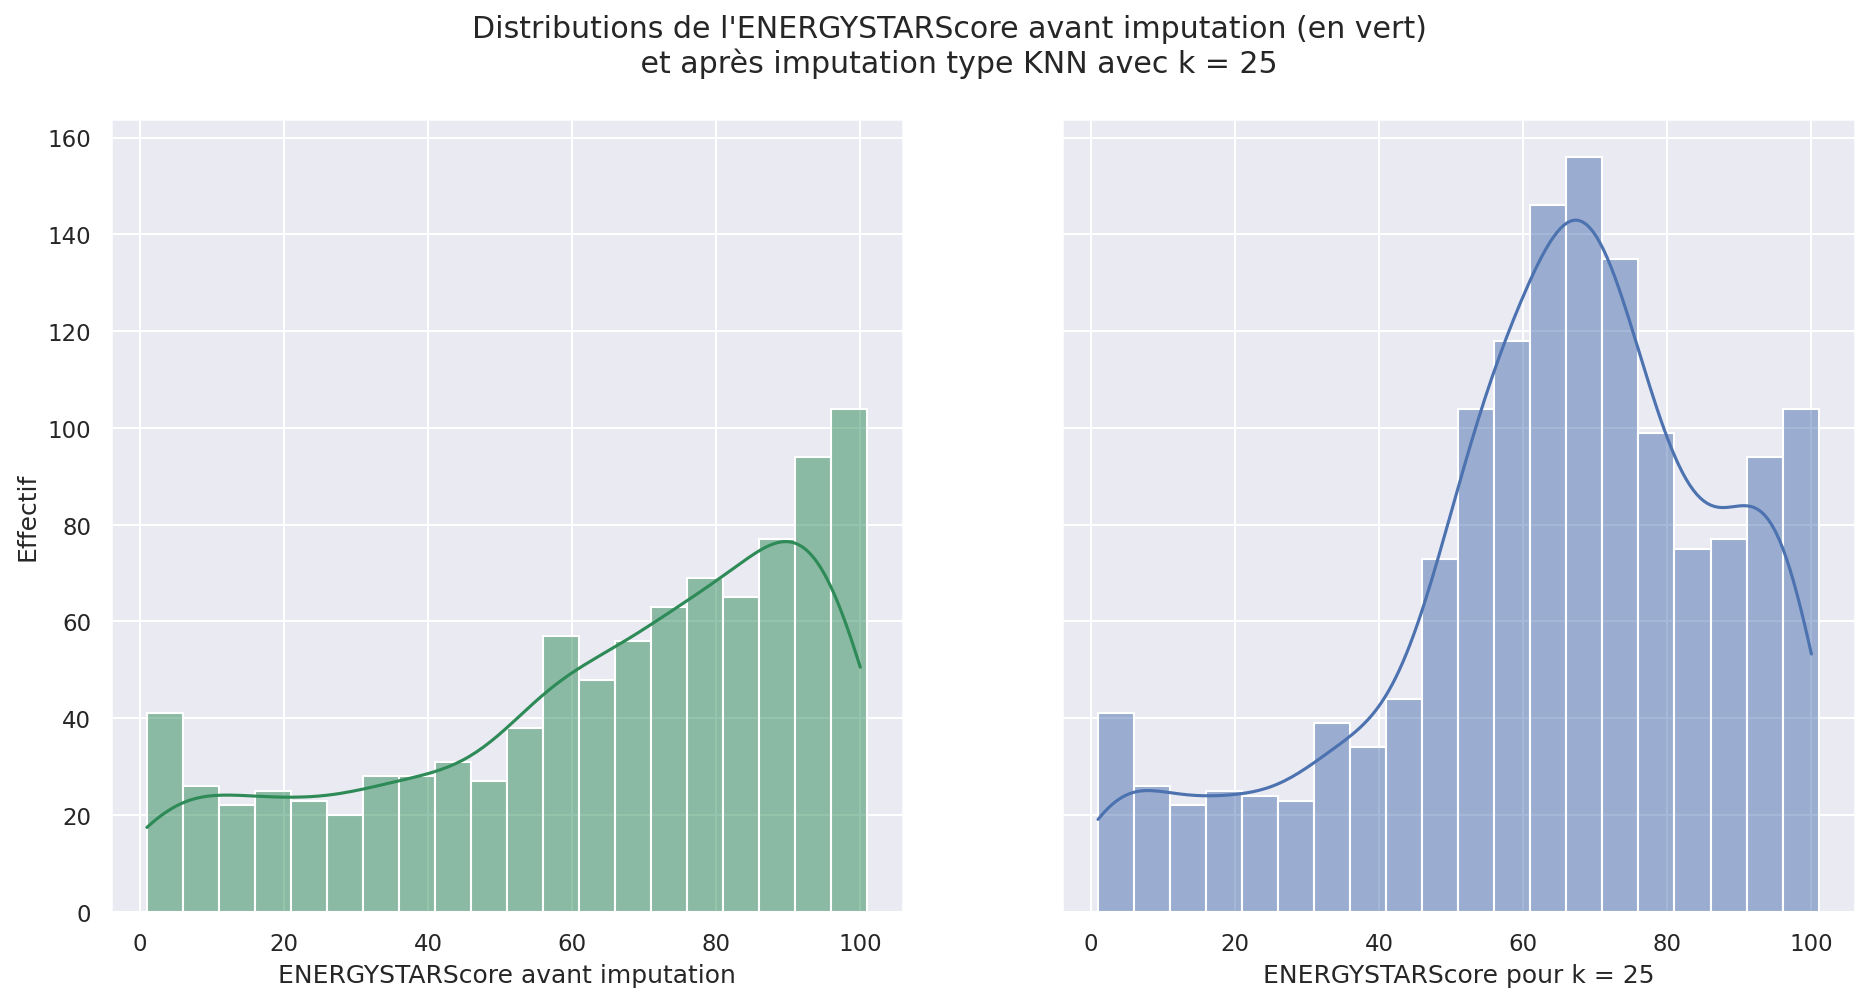

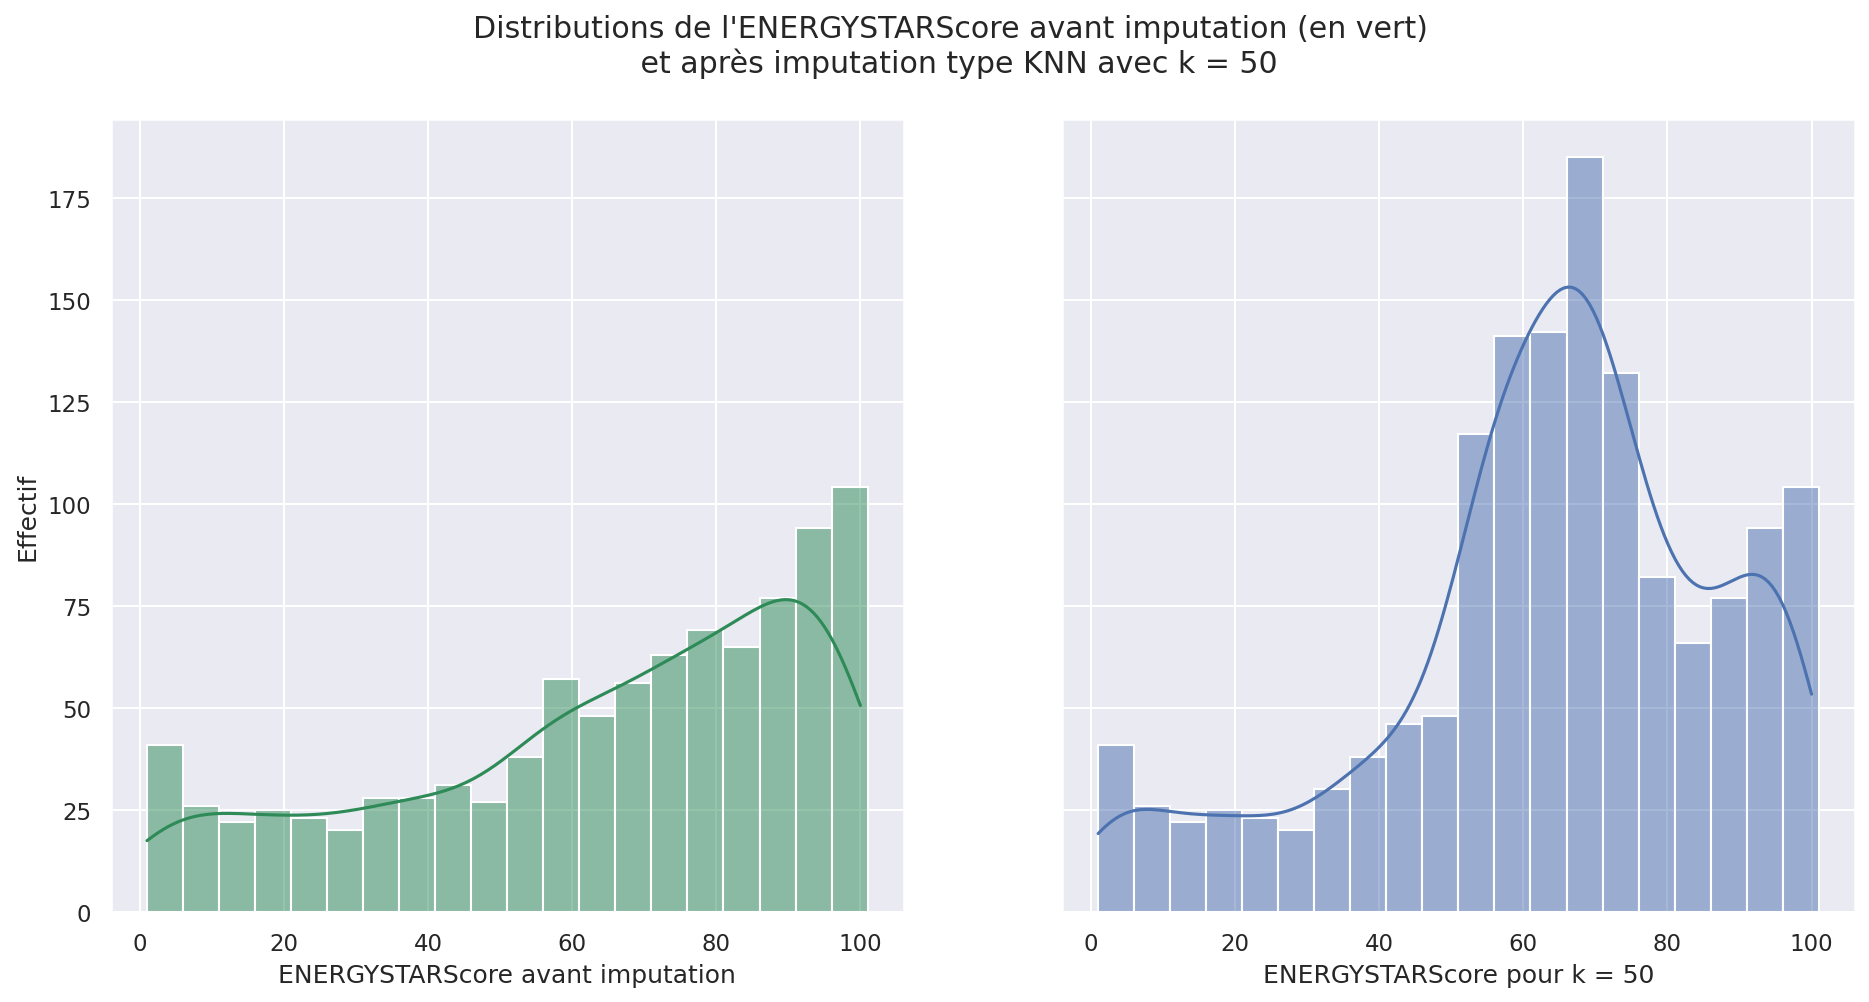

In [ ]:
val_k = [1, 2, 3, 4, 5, 8, 10, 15, 20, 25, 50]

for k in val_k: 
    if k == 2 : 
        imputer = KNNImputer(n_neighbors=k, weights = 'distance')
        X_imp = imputer.fit_transform(X_scaled)
        X_imp = std_scale.inverse_transform(X_imp)
        df_tamp = pd.DataFrame(data = X_imp, columns = ind)
        df_tamp_0 = pd.DataFrame(data = [], columns = ['ID','ENERGYSTARScore'])
        df_tamp_0['ENERGYSTARScore'] = df_tamp['ENERGYSTARScore']
        df_tamp_0['ID'] = df_enc['ID']
        sns.set()
        fig, ax = plt.subplots(1,2, figsize = (15,7), dpi = 150, sharey='row')
        sns.histplot(data = df_tamp, x ='ENERGYSTARScore', binwidth = 5, ax = ax[1], kde=True)
        ax[1].set_ylabel('Effectif')
        ax[1].set_xlabel('ENERGYSTARScore pour k = '+str(k))
        sns.histplot(data = df_enc, x = 'ENERGYSTARScore', binwidth = 5, ax = ax[0],
                color = 'seagreen', kde=True)
        ax[0].set_ylabel('Effectif')
        ax[0].set_xlabel('ENERGYSTARScore avant imputation')
        plt.suptitle('Distributions de l\'ENERGYSTARScore avant imputation (en vert) \n et après imputation type KNN avec k = '+ str(k))
        print(df_tamp['ENERGYSTARScore'].describe(), 'k = ', k)
        print(df_tamp['ENERGYSTARScore'].skew(), 'k = ', k)
        print(df_tamp['ENERGYSTARScore'].kurt(), 'k = ', k)
        fig.savefig('P4_N1_32_cv_knn.png',bbox_inches = 'tight')
    else : 
        imputer = KNNImputer(n_neighbors=k, weights = 'distance')
        X_imp = imputer.fit_transform(X_scaled)
        X_imp = std_scale.inverse_transform(X_imp)
        df_tamp = pd.DataFrame(data = X_imp, columns = ind)
        sns.set()
        fig, ax = plt.subplots(1,2, figsize = (15,7), dpi = 150, sharey='row')
        sns.histplot(data = df_tamp, x ='ENERGYSTARScore', binwidth = 5, ax = ax[1], kde=True)
        ax[1].set_ylabel('Effectif')
        ax[1].set_xlabel('ENERGYSTARScore pour k = '+str(k))
        sns.histplot(data = df_enc, x = 'ENERGYSTARScore', binwidth = 5, ax = ax[0],
                color = 'seagreen', kde=True)
        ax[0].set_ylabel('Effectif')
        ax[0].set_xlabel('ENERGYSTARScore avant imputation')
        plt.suptitle('Distributions de l\'ENERGYSTARScore avant imputation (en vert) \n et après imputation type KNN avec k = '+ str(k))
        print(df_tamp['ENERGYSTARScore'].describe(), 'k = ', k)
        print(df_tamp['ENERGYSTARScore'].skew(), 'k = ', k)
        print(df_tamp['ENERGYSTARScore'].kurt(), 'k = ', k)

## Conclusion 

Je choisie un nombre de voisin égale à 2. 
Les caractéristiques de la distribution obtenue sont les plus proche des caractéristiques de la distribution de départ (cf. cellules qui suivent)

In [ ]:
df = df.merge(df_tamp_0, how = 'outer',on = 'ID')
df = df.drop(columns = 'ENERGYSTARScore_x')
df = df.rename(columns = {'ENERGYSTARScore_y':'ENERGYSTARScore'})
df.head()

ID            TYPE FONCTION_1  QUARTIER  LATITUDE  LONGITUDE  \
0  1  NONRESIDENTIAL      HOTEL  DOWNTOWN  47.61220 -122.33799   
1  2  NONRESIDENTIAL      HOTEL  DOWNTOWN  47.61317 -122.33393   
2  3  NONRESIDENTIAL      HOTEL  DOWNTOWN  47.61393 -122.33810   
3  5  NONRESIDENTIAL      HOTEL  DOWNTOWN  47.61412 -122.33664   
4  8  NONRESIDENTIAL      HOTEL  DOWNTOWN  47.61375 -122.34047   

   ANNÉE_CONST_REN  NBRE_IMMEUBLE  NBRE_ÉTAGE  SUPERFICIE_TOTALE  ...  \
0             1927            1.0          12              88434  ...   
1             1996            1.0          11             103566  ...   
2             1969            1.0          41             956110  ...   
3             1926            1.0          10              61320  ...   
4             1980            1.0          18             175580  ...   

   CONSOMMATION_ENERG_SITE  STEAM(kBtu)  Electricity(kBtu) NaturalGas(kBtu)  \
0                7456910.0   2003882.00          3946027.0        1276453.0   
1                8664479.0         0.00          3242851.0        5145082.0   
2               73937112.0  21566554.00         49526664.0        1493800.0   
3                6946800.5   2214446.25          2768924.0        1811213.0   
4               14656503.0         0.00          5368607.0        8803998.0   

   CONFORMITE ÉMISSIONS_TOTALES  INTENSITÉ_ÉMISSIONS  NB_NAN  NAN_ENERGY  \
0   COMPLIANT            249.98                 2.83       4           0   
1   COMPLIANT            295.86                 2.86       0           0   
2   COMPLIANT           2089.28                 2.19       4           0   
3   COMPLIANT            286.43                 4.67       4           0   
4   COMPLIANT            505.01                 2.88       0           0   

   ENERGYSTARScore  
0             60.0  
1             61.0  
2             43.0  
3             56.0  
4             75.0  

[5 rows x 28 columns]

In [ ]:
df['ENERGYSTARScore'].describe()

count    1459.000000
mean       62.321876
std        27.171415
min         1.000000
25%        43.236548
50%        67.504135
75%        85.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

In [ ]:
df.isna().sum()

ID                                 0
TYPE                               0
FONCTION_1                         0
QUARTIER                           0
LATITUDE                           0
LONGITUDE                          0
ANNÉE_CONST_REN                    0
NBRE_IMMEUBLE                      0
NBRE_ÉTAGE                         0
SUPERFICIE_TOTALE                  0
SUPERFICIE_PARKING                 0
LargestPropertyUseType             4
LargestPropertyUseTypeGFA          0
FONCTION_2                         0
SecondLargestPropertyUseTypeGFA    0
FONCTION_3                         0
ThirdLargestPropertyUseTypeGFA     0
INT_CONSOMMATION_ENERG_SITE        0
CONSOMMATION_ENERG_SITE            0
STEAM(kBtu)                        0
Electricity(kBtu)                  0
NaturalGas(kBtu)                   0
CONFORMITE                         0
ÉMISSIONS_TOTALES                  0
INTENSITÉ_ÉMISSIONS                0
NB_NAN                             0
NAN_ENERGY                         0
E

In [ ]:
df['FONCTION_1'].unique()

array(['HOTEL', 'PUBLIC SERVICES', 'RECREATION & CULTURE',
       'GYM/LIFESTYLE', 'CONVENTION CENTERS', 'OTHER', 'UNIVERSITY',
       'WAREHOUSE', 'OFFICE', 'SCHOOL', 'MALL', 'RETAIL STORE',
       'HOSPITAL', 'PARKING', 'WORSHIP FACILITY', 'BAR & RESTAURANT',
       'DATA CENTER', 'LABORATORY', 'REFRIGERATED WAREHOUSE',
       'INDUSTRIAL PLANTS'], dtype=object)

In [ ]:
df['TYPE'].unique()

array(['NONRESIDENTIAL', 'CAMPUS', 'SCHOOLS'], dtype=object)

In [ ]:
df = df.drop(columns = ['LargestPropertyUseType', 'CONFORMITE', 'NB_NAN'])


# <a name="C4">  4. Exploration </a>  

## <a name="C41"> 4.1 Analyses univariées</a>   

In [ ]:
df.describe()

LATITUDE    LONGITUDE  ANNÉE_CONST_REN  NBRE_IMMEUBLE   NBRE_ÉTAGE  \
count  1459.000000  1459.000000      1459.000000    1459.000000  1459.000000   
mean     47.615476  -122.333949      1961.410555       1.145990     4.180260   
std       0.047107     0.023185        32.591531       1.210353     6.384544   
min      47.509590  -122.411820      1900.000000       1.000000     0.000000   
25%      47.585845  -122.343160      1930.000000       1.000000     1.000000   
50%      47.612200  -122.333270      1965.000000       1.000000     2.000000   
75%      47.647620  -122.323400      1988.000000       1.000000     4.000000   
max      47.733870  -122.261800      2015.000000      27.000000    76.000000   

       SUPERFICIE_TOTALE  SUPERFICIE_PARKING  LargestPropertyUseTypeGFA  \
count       1.459000e+03         1459.000000               1.459000e+03   
mean        1.153555e+05        13965.688143               9.458952e+04   
std         1.980508e+05        44252.583116               1.649237e+05   
min         1.276900e+04            0.000000               5.656000e+03   
25%         2.884600e+04            0.000000               2.544300e+04   
50%         4.799200e+04            0.000000               4.195800e+04   
75%         1.055500e+05            0.000000               9.206750e+04   
max         2.200000e+06       512608.000000               1.719643e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1459.000000                     1459.000000   
mean                      19784.456681                     3150.425222   
std                       52329.157484                    18150.381971   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                       13516.000000                        0.000000   
max                      639931.000000                   459748.000000   

       INT_CONSOMMATION_ENERG_SITE  CONSOMMATION_ENERG_SITE   STEAM(kBtu)  \
count                  1459.000000             1.459000e+03  1.459000e+03   
mean                     78.102193             8.591848e+06  5.136930e+05   
std                      77.316850             2.334438e+07  5.450306e+06   
min                       1.500000             5.811420e+04  0.000000e+00   
25%                      37.250000             1.328610e+06  0.000000e+00   
50%                      56.099998             2.828172e+06  0.000000e+00   
75%                      87.699997             7.564924e+06  0.000000e+00   
max                     834.400024             4.716139e+08  1.349435e+08   

       Electricity(kBtu)  NaturalGas(kBtu)  ÉMISSIONS_TOTALES  \
count       1.459000e+03      1.459000e+03        1459.000000   
mean        5.811903e+06      2.025799e+06         187.758211   
std         1.405511e+07      9.945187e+06         746.706511   
min         0.000000e+00      0.000000e+00           0.400000   
25%         7.320410e+05      0.000000e+00          20.295000   
50%         1.705793e+06      4.651680e+05          49.530000   
75%         5.289224e+06      1.503250e+06         143.875000   
max         2.745325e+08      2.979090e+08       16870.980000   

       INTENSITÉ_ÉMISSIONS   NAN_ENERGY  ENERGYSTARScore  
count          1459.000000  1459.000000      1459.000000  
mean              1.659863     0.355723        62.321876  
std               2.430277     0.478896        27.171415  
min               0.010000     0.000000         1.000000  
25%               0.360000     0.000000        43.236548  
50%               0.870000     0.000000        67.504135  
75%               1.940000     1.000000        85.000000  
max              34.090000     1.000000       100.000000

## Variables quantitatives

- ### Latitude et Longitude

In [ ]:
#Folium map 
import folium 
from folium import plugins
m = folium.Map([47.6,-122.3],  
           width="%100",
           height="%100",
           zoom_start=10.5)
location=df[['LATITUDE','LONGITUDE']]
quartier_seattle = 'Neighborhood_Map_Atlas_Districts.geojson' #Délimitation des quartier extrait de opendata seattle
folium.GeoJson(quartier_seattle, name="geo_seattle").add_to(m)
plugins.MarkerCluster(location).add_to(m)
m

In [ ]:
df.QUARTIER.unique()

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'MAGNOLIA  QUEEN ANNE', 'BALLARD', 'NORTHWEST', 'CENTRAL',
       'SOUTHEAST', 'DELRIDGE', 'NORTH', 'SOUTHWEST'], dtype=object)

La plupart des immeubles non destinés à l'habitation sont situé au centre de la ville, Downtown, ce qui correspond à la topographie des villes américaines 

   - ### Année de construction

Text(0.5, 1.0, "Distribution des années de construction des immeubles non destinés à \n l'habitation dans le ville de Seattle")

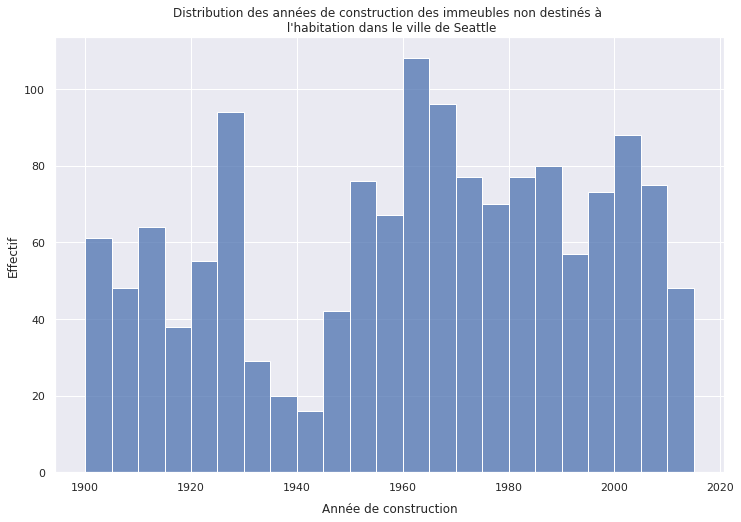

In [ ]:
#Année de construction
sns.set()
fig,ax = plt.subplots(figsize = (12,8))
sns.histplot(df['ANNÉE_CONST_REN'], binwidth = 5)
ax.set_xlabel('Année de construction', labelpad = 10)
ax.set_ylabel('Effectif')
ax.set_title('Distribution des années de construction des immeubles non destinés à \n l\'habitation dans le ville de Seattle')
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")


- ### Nombre d'immeuble et nombre d'étage

Text(0.5, 1.0, "Distribution du nombre d'étages")

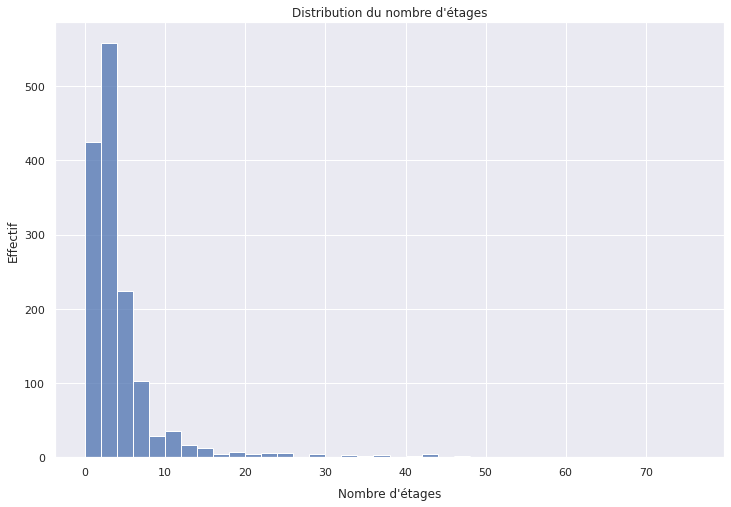

In [ ]:
sns.set()
fig,ax = plt.subplots(figsize = (12,8))
sns.histplot(df['NBRE_ÉTAGE'], binwidth = 2)
ax.set_xlabel('Nombre d\'étages', labelpad = 10)
ax.set_ylabel('Effectif')
ax.set_title('Distribution du nombre d\'étages')
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

Text(0.5, 1.0, "Distribution du nombre d'immeubles")

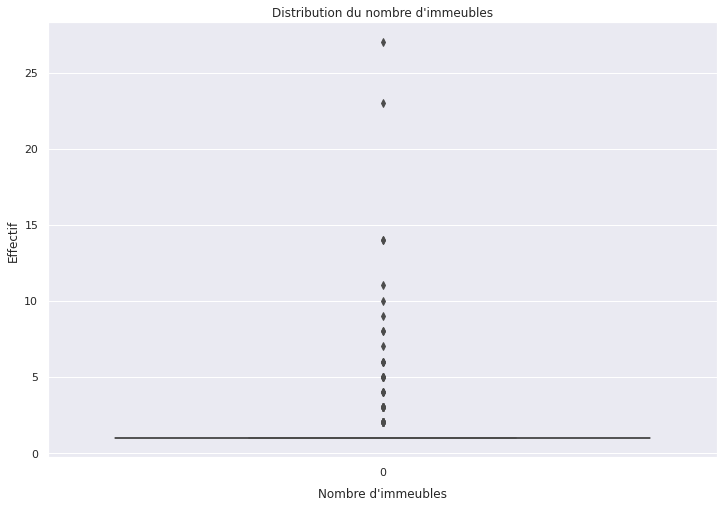

In [ ]:
sns.set()
fig,ax = plt.subplots(figsize = (12,8))
sns.boxplot(df['NBRE_IMMEUBLE'])#, binwidth = 1)
ax.set_xlabel('Nombre d\'immeubles', labelpad = 10)
ax.set_ylabel('Effectif')
ax.set_title('Distribution du nombre d\'immeubles')
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

- ### Superficie totale, superficie parking

Text(0.5, 1.0, 'Distribution de la superficie des immeubles de Seattle \n ANNÉE 2016')

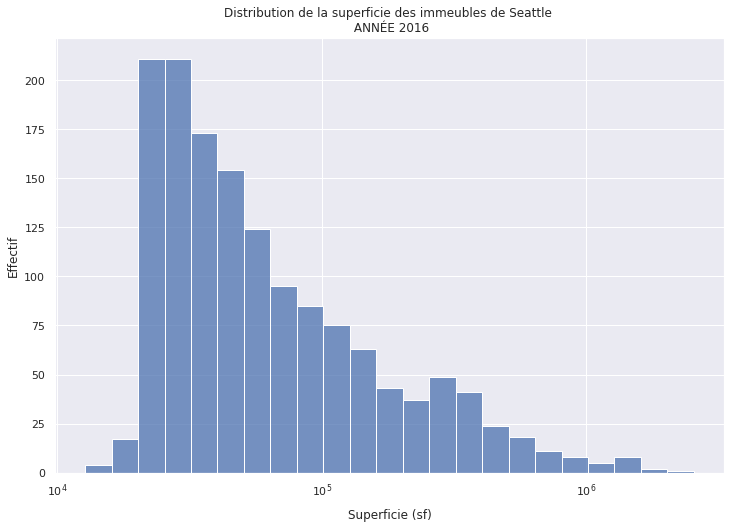

In [ ]:
sns.set()
fig,ax = plt.subplots(figsize = (12,8))
sns.histplot(df['SUPERFICIE_TOTALE'], binwidth = 0.1, log_scale = True)
ax.set_xlabel('Superficie (sf)', labelpad = 10)
ax.set_ylabel('Effectif')
ax.set_title('Distribution de la superficie des immeubles de Seattle \n ANNÉE 2016')
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

Text(0.5, 1.0, "Distribution de la superficie des parking d'immeubles de Seattle \n ANNÉE 2016")

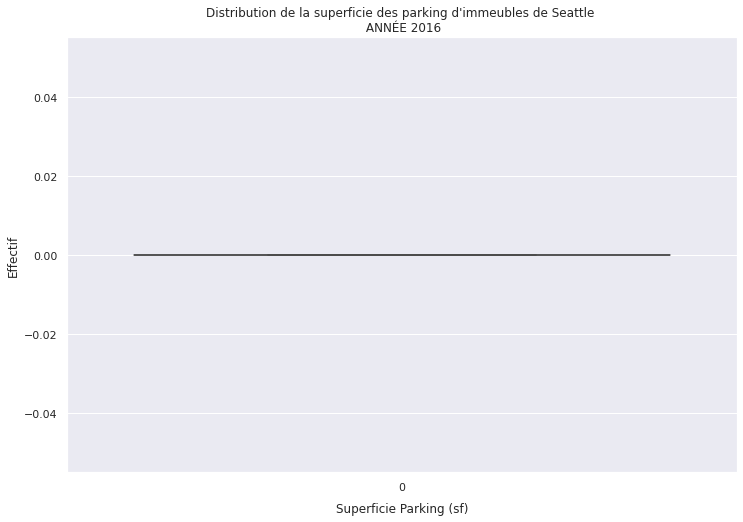

In [ ]:
sns.set()
fig,ax = plt.subplots(figsize = (12,8))
sns.boxplot(df['SUPERFICIE_PARKING'],showfliers = False)
ax.set_xlabel('Superficie Parking (sf)', labelpad = 10)
ax.set_ylabel('Effectif')
ax.set_title('Distribution de la superficie des parking d\'immeubles de Seattle \n ANNÉE 2016')
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

La plupart des immeubles n'ont pas de parking. 

In [ ]:
bins = pd.IntervalIndex.from_tuples([(-1, 0) , (0,df['SUPERFICIE_PARKING'].max())], 
                                    name = ['SANS PARKING', 'AVEC PARKING'])
mapping = {bins[0] : bins.name[0],
          bins[1]:bins.name[1]}
a = pd.cut(df['SUPERFICIE_PARKING'],bins, labels= True)
a = a.replace(mapping)

Text(0.5, 0, '')

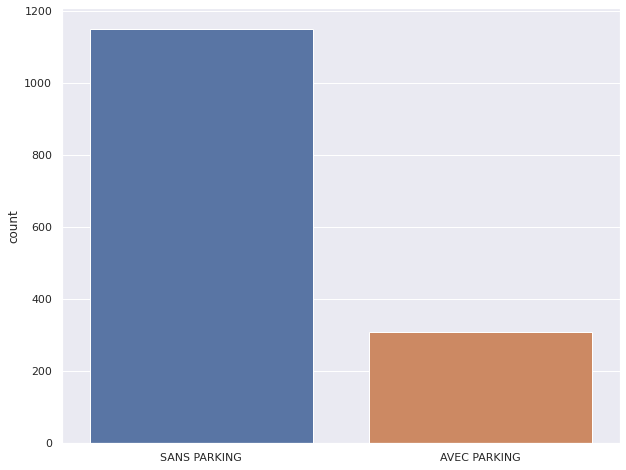

In [ ]:
bins = pd.IntervalIndex.from_tuples([(-1, 0) , (0,df['SUPERFICIE_PARKING'].max())])
fig, ax = plt.subplots(figsize=(10,8))
sns.set()
sns.countplot(data = df, x = a)
ax.set_xlabel('')

In [ ]:
df['PARKING'] = a

- ### ENERGYSTARScore

- ### Intensité de consommation énergétique (kBtu/sf)

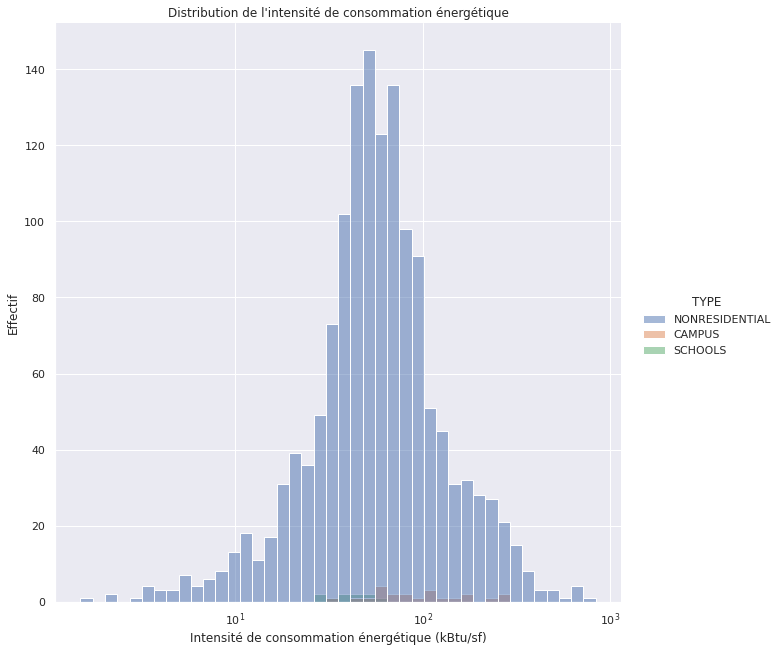

In [ ]:
a =  df[['INT_CONSOMMATION_ENERG_SITE','STEAM(kBtu)','Electricity(kBtu)' ,'NaturalGas(kBtu)','QUARTIER','TYPE']]
g = sns.displot(data = a,x='INT_CONSOMMATION_ENERG_SITE', log_scale=True, hue = 'TYPE',
           height= 9, aspect=1.)
g.set_xlabels('Intensité de consommation énergétique (kBtu/sf)')
g.set_ylabels('Effectif')
plt.title('Distribution de l\'intensité de consommation énergétique')
plt.savefig('/content/Fichier_N1/P4_N1_SEUI.png')

- ### Intensité des émissions de GES(t Co2/sf)

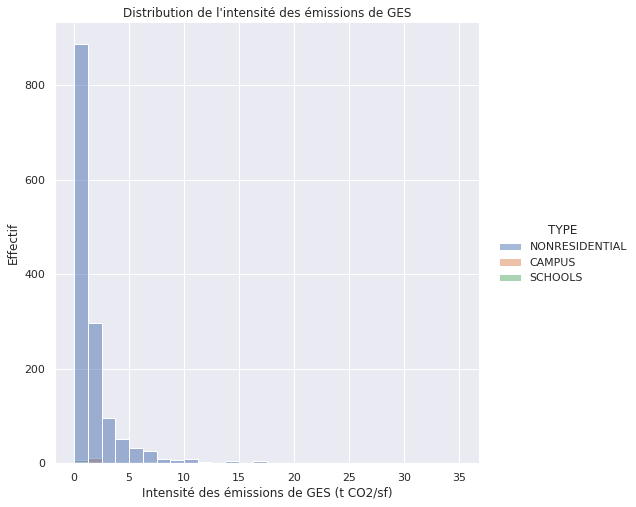

In [ ]:
a =  df[['INTENSITÉ_ÉMISSIONS','STEAM(kBtu)','Electricity(kBtu)' ,'NaturalGas(kBtu)','QUARTIER','TYPE']]

g = sns.displot(data = a,x='INTENSITÉ_ÉMISSIONS', hue = 'TYPE',
           height= 7, aspect=1., kind = 'hist', binwidth= 1.25)
g.set_xlabels('Intensité des émissions de GES (t CO2/sf)')
g.set_ylabels('Effectif')
plt.title('Distribution de l\'intensité des émissions de GES')
plt.savefig('/content/Fichier_N1/P4_N1_GHG.png')

In [ ]:
var_type_en = ['STEAM(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']

<Axes: >

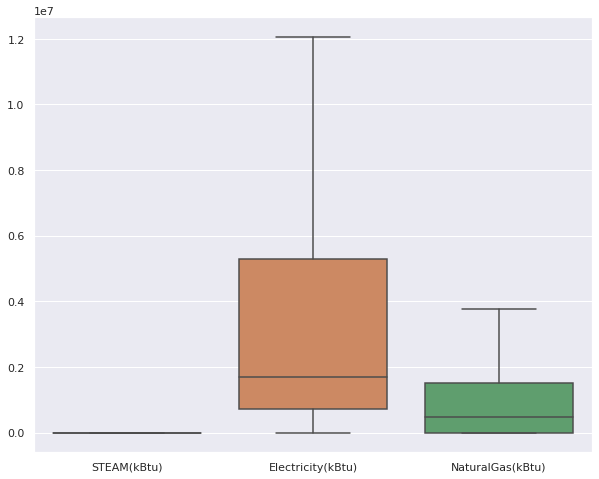

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df[var_type_en], showfliers= False)

In [ ]:
bins = pd.IntervalIndex.from_tuples([(-1, 0) , (0,df['STEAM(kBtu)'].max())], 
                                    name = ['SANS VAPEUR', 'AVEC VAPEUR'])
mapping = {bins[0] : bins.name[0],
          bins[1]:bins.name[1]}
a = pd.cut(df['STEAM(kBtu)'],bins, labels= True)
a = a.replace(mapping)
a

0       AVEC VAPEUR
1       SANS VAPEUR
2       AVEC VAPEUR
3       AVEC VAPEUR
4       SANS VAPEUR
           ...     
1454    SANS VAPEUR
1455    SANS VAPEUR
1456    SANS VAPEUR
1457    SANS VAPEUR
1458    SANS VAPEUR
Name: STEAM(kBtu), Length: 1459, dtype: category
Categories (2, object): ['SANS VAPEUR' < 'AVEC VAPEUR']

In [ ]:
print('Le immeubles qui consomment de l\'énergie sous forme de vapeur représentent',
     round((len(a[a=='AVEC VAPEUR'])/len(df))*100,2),'% de mon dataframe')

Le immeubles qui consomment de l'énergie sous forme de vapeur représentent 7.4 % de mon dataframe


## Variables qualitatives 
- ### TYPE

In [ ]:
df[df['TYPE']=='NONRESIDENTIAL WA']
df.loc[df['TYPE']=='NONRESIDENTIAL WA', 'TYPE'] = 'NONRESIDENTIAL'

([<matplotlib.patches.Wedge at 0x7f4e36292700>,
 [Text(-1.0973897605128622, 0.07573449360445415, 'NONRESIDENTIAL'),
  Text(1.0955047381923948, -0.09934469587256517, 'CAMPUS'),
  Text(1.0997450015978232, -0.02368399165267952, 'SCHOOLS')])

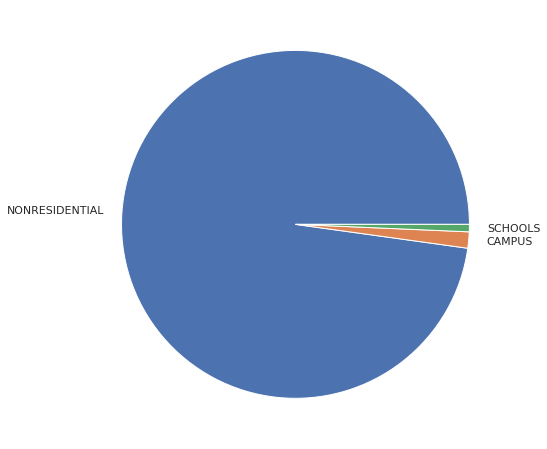

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set()
order_= df['TYPE'].value_counts().index
ax.pie(df['TYPE'].value_counts(), labels=order_) #, order = order_)
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

- ### QUARTIER

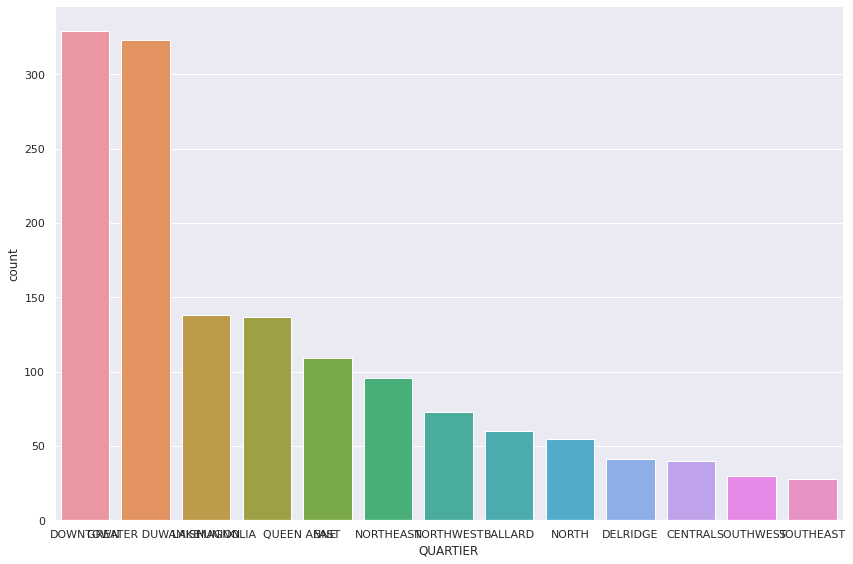

In [ ]:
#fig, ax = plt.subplots(figsize=(15,8))
sns.set()
order_= df['QUARTIER'].value_counts().index
sns.catplot(data = df , x = 'QUARTIER', order = order_, kind = 'count',
           height = 8., aspect= 1.5,)
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

## <a name="C42"> 4.2 Analyses bivariées </a> 

Enjeu : Analyser de quoi dépendent les variables de consommation et d'émissions. 
Stratégie: Modéliser la consommation énergétique totale (WN) et en déduire les émissions. 

### Hypothèses : 
La consommation en énergie devrait dépendre de :
- l'année de construction (implique le quartier)
- la superficie totale
- la superficie du parking 
- de l'activité principale (implique le quartier)
- du type d'énergie utilisé (elec, gaz, steam) 


In [ ]:
df['PARKING'] = (df['SUPERFICIE_PARKING']/df['SUPERFICIE_TOTALE'])*100

In [ ]:
df.columns

Index(['ID', 'TYPE', 'FONCTION_1', 'QUARTIER', 'LATITUDE', 'LONGITUDE',
       'ANNÉE_CONST_REN', 'NBRE_IMMEUBLE', 'NBRE_ÉTAGE', 'SUPERFICIE_TOTALE',
       'SUPERFICIE_PARKING', 'LargestPropertyUseTypeGFA', 'FONCTION_2',
       'SecondLargestPropertyUseTypeGFA', 'FONCTION_3',
       'ThirdLargestPropertyUseTypeGFA', 'INT_CONSOMMATION_ENERG_SITE',
       'CONSOMMATION_ENERG_SITE', 'STEAM(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'ÉMISSIONS_TOTALES', 'INTENSITÉ_ÉMISSIONS',
       'NAN_ENERGY', 'ENERGYSTARScore', 'PARKING'],
      dtype='object')

<Axes: >

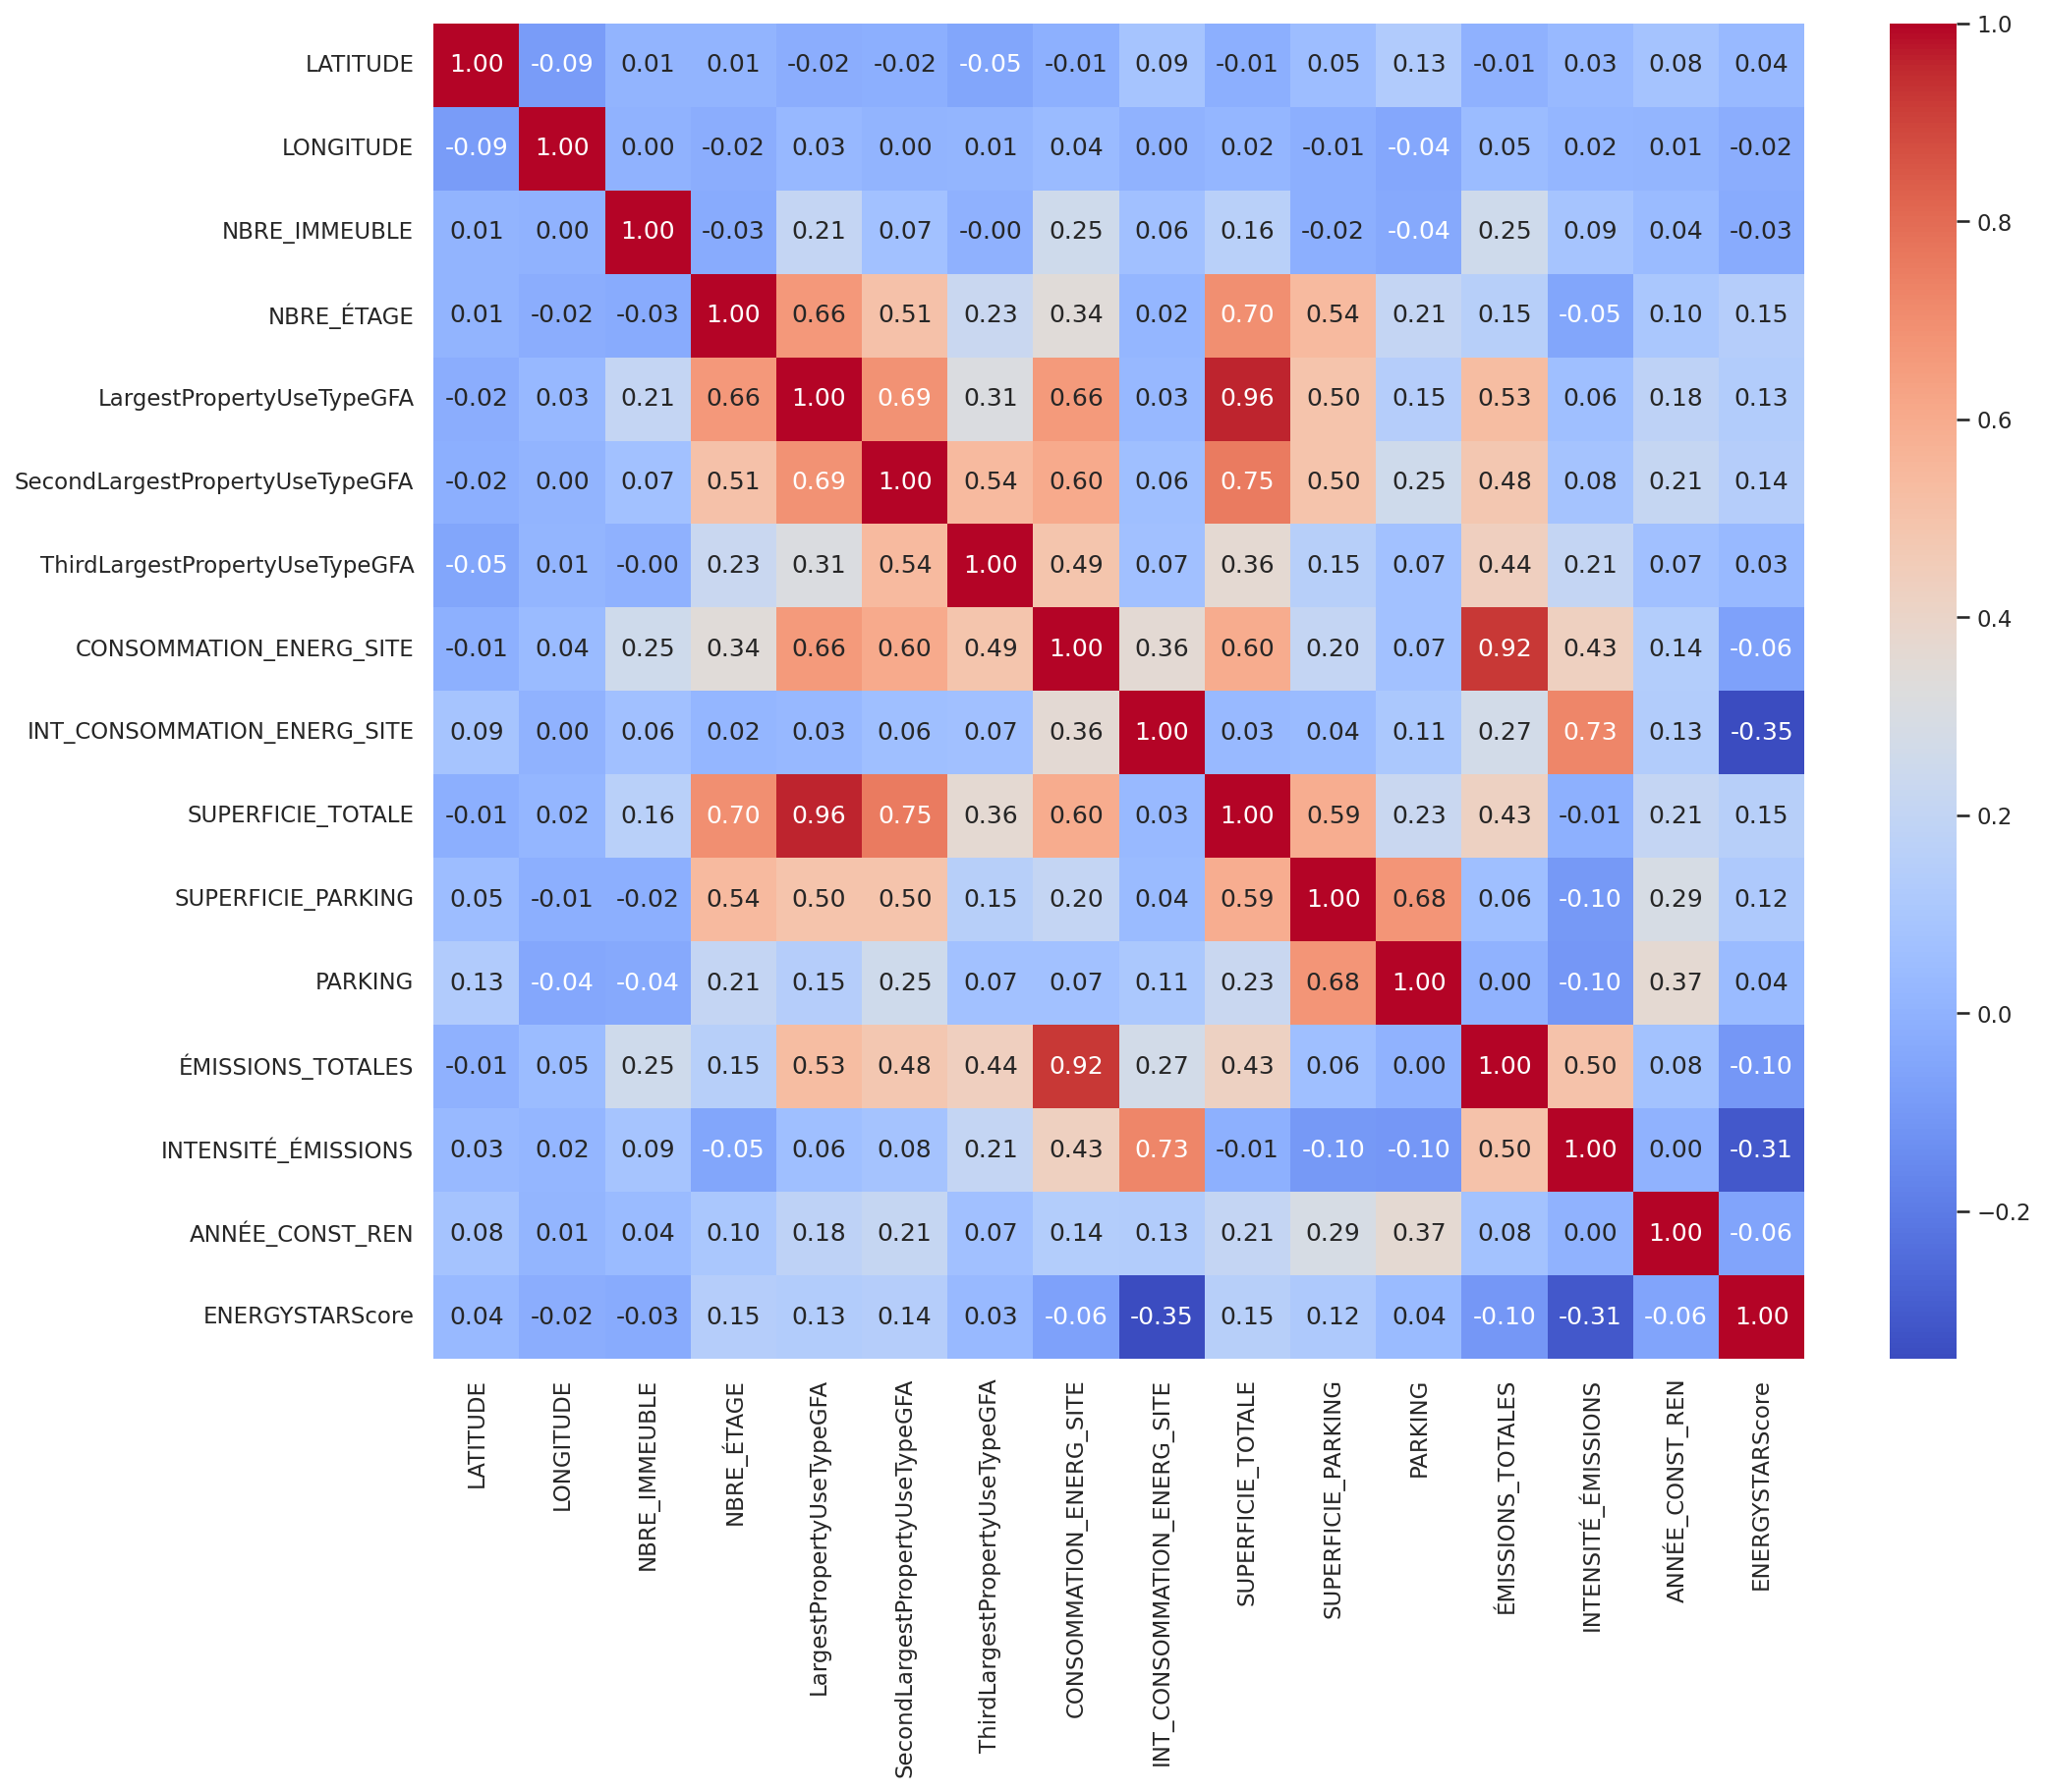

In [ ]:
var_quant = ['LATITUDE', 'LONGITUDE', 'NBRE_IMMEUBLE', 'NBRE_ÉTAGE','LargestPropertyUseTypeGFA',
             'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
             'CONSOMMATION_ENERG_SITE', 'INT_CONSOMMATION_ENERG_SITE','SUPERFICIE_TOTALE',
             'SUPERFICIE_PARKING','PARKING','ÉMISSIONS_TOTALES','INTENSITÉ_ÉMISSIONS',
            'ANNÉE_CONST_REN','ENERGYSTARScore'] 
sns.set()
fig, ax = plt.subplots(figsize=(15,12), dpi = 150)
sns.heatmap(df[var_quant].corr(),annot=True, cmap="coolwarm", fmt="0.2f")
#plt.savefig('P4_N1_42a.png',bbox_inches = 'tight')

Commentaires : L'année de construction n'a pas de corrélation linéaire remarquable. On pourrait penser que les vieux immeubles seraient moins bien isolés. Il doit exister une corrélation d'un autre ordre, directement liée à la consommation en énergie.

- ### Intensité de consommation 

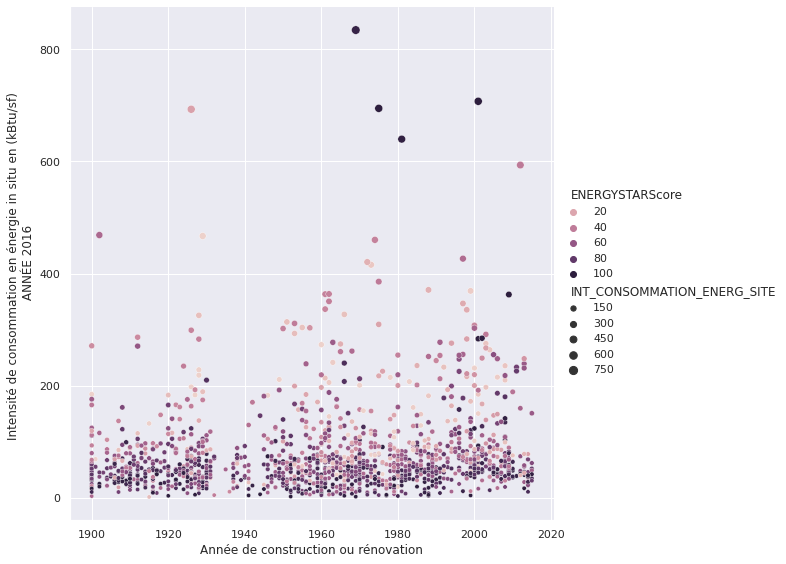

In [ ]:
#my_order = df.groupby(by=['ANNÉE_CONST_REN'])['INT_CONSOMMATION_ENERG_SITE'].median().sort_values().index
g = sns.relplot(data = df , y = 'INT_CONSOMMATION_ENERG_SITE' , x = 'ANNÉE_CONST_REN', 
                size = 'INT_CONSOMMATION_ENERG_SITE', height = 8., aspect = 1., hue = 'ENERGYSTARScore')
g.set_ylabels('Intensité de consommation en énergie in situ en (kBtu/sf) \n ANNÉE 2016')
g.set_xlabels('Année de construction ou rénovation')

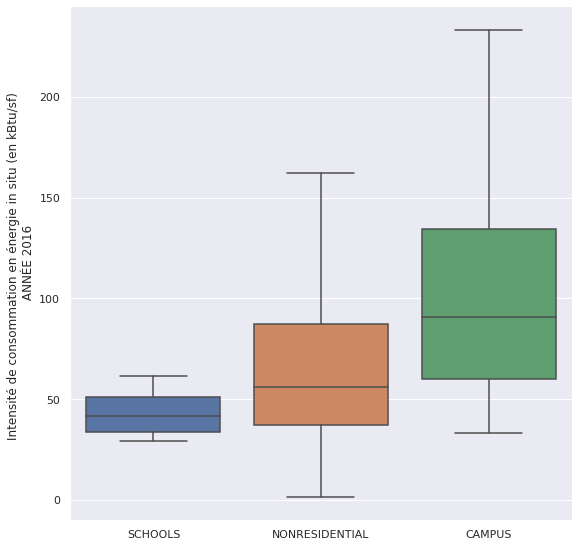

In [ ]:
my_order = df.groupby(by=['TYPE'])['INT_CONSOMMATION_ENERG_SITE'].median().sort_values().index
g = sns.catplot(data = df , y = 'INT_CONSOMMATION_ENERG_SITE' , x = 'TYPE',
           height = 8., aspect = 1., kind = 'box', order = my_order, showfliers = False)
g.set_ylabels('Intensité de consommation en énergie in situ (en kBtu/sf) \n ANNÉE 2016')
g.set_xlabels('')

In [ ]:
df.loc[122]

ID                                              261
TYPE                                         CAMPUS
FONCTION_1                                   OFFICE
QUARTIER                           GREATER DUWAMISH
LATITUDE                                   47.52429
LONGITUDE                                -122.31234
ANNÉE_CONST_REN                                1980
NBRE_IMMEUBLE                                  14.0
NBRE_ÉTAGE                                        2
SUPERFICIE_TOTALE                            334368
SUPERFICIE_PARKING                            31874
LargestPropertyUseTypeGFA                  240984.0
FONCTION_2                               LABORATORY
SecondLargestPropertyUseTypeGFA             72963.0
FONCTION_3                                    OTHER
ThirdLargestPropertyUseTypeGFA              16766.0
INT_CONSOMMATION_ENERG_SITE              161.899994
CONSOMMATION_ENERG_SITE                  54136068.0
STEAM(kBtu)                                     0.0
Electricity(

In [ ]:
cons = 45321378.0 + 8145300.0
cons

53466678.0

## Création de 3 features, type d'énergie

In [ ]:
for en in var_type_en:
    df[en+'_part'] = df[en]/(df['STEAM(kBtu)']+ df['Electricity(kBtu)']+ df['NaturalGas(kBtu)'])

NameError: ignored

Text(0.5, 0, '')

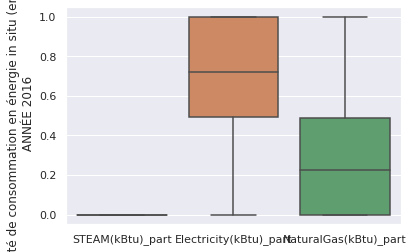

In [ ]:
g = sns.boxplot(data = df[['STEAM(kBtu)_part','Electricity(kBtu)_part', 'NaturalGas(kBtu)_part']],
               showfliers = False)
g.set_ylabel('Intensité de consommation en énergie in situ (en kBtu/sf) \n ANNÉE 2016')
g.set_xlabel('')

In [ ]:
df_type_en = df[['STEAM(kBtu)_part', 'Electricity(kBtu)_part', 'NaturalGas(kBtu)_part',
                'INTENSITÉ_ÉMISSIONS', 'INT_CONSOMMATION_ENERG_SITE']]

In [ ]:
sns.set()
bins = pd.IntervalIndex.from_tuples([(-0.1, 0.20), (0.20, .40), (.40, .60), (.60, .80) , (.80, 1.)],
                                   name = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
mapping = {bins[0] : bins.name[0],
          bins[1]:bins.name[1], 
          bins[2]:bins.name[2],
          bins[3]:bins.name[3],
          bins[4]:bins.name[4]}
for en in ['STEAM(kBtu)_part', 'Electricity(kBtu)_part', 'NaturalGas(kBtu)_part']:
    df_type_en[en] = pd.cut(df_type_en[en],bins)
    df_type_en[en] = df_type_en[en].replace(mapping)
    df_type_en[en]= df_type_en[en].astype('object')

In [ ]:
df_type_en

STEAM(kBtu)_part Electricity(kBtu)_part NaturalGas(kBtu)_part  \
0              20-40%                 40-60%                 0-20%   
1               0-20%                 20-40%                60-80%   
2              20-40%                 60-80%                 0-20%   
3              20-40%                 40-60%                20-40%   
4               0-20%                 20-40%                60-80%   
...               ...                    ...                   ...   
1454            0-20%                 60-80%                20-40%   
1455            0-20%                 40-60%                40-60%   
1456            0-20%                 20-40%                60-80%   
1457            0-20%                 40-60%                40-60%   
1458            0-20%                 20-40%                60-80%   

      INTENSITÉ_ÉMISSIONS  INT_CONSOMMATION_ENERG_SITE  
0                    2.83                    84.300003  
1                    2.86                    97.900002  
2                    2.19                    97.699997  
3                    4.67                   113.300003  
4                    2.88                   118.699997  
...                   ...                          ...  
1454                 1.11                    56.200001  
1455                 2.01                    65.900002  
1456                16.99                   460.100006  
1457                 1.57                    55.500000  
1458                 2.26                    70.900002  

[1459 rows x 5 columns]

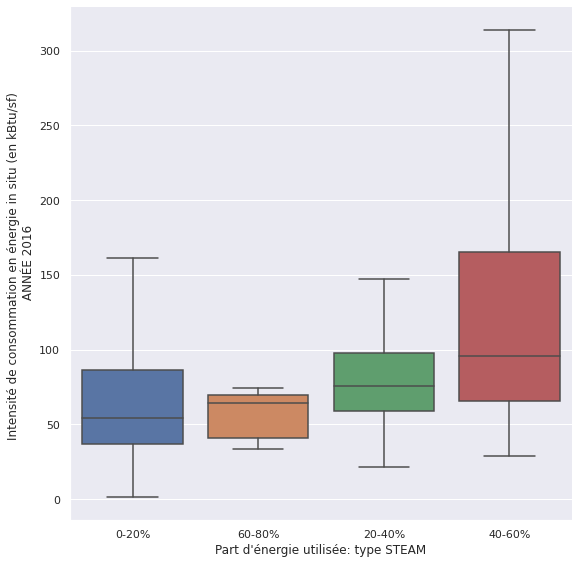

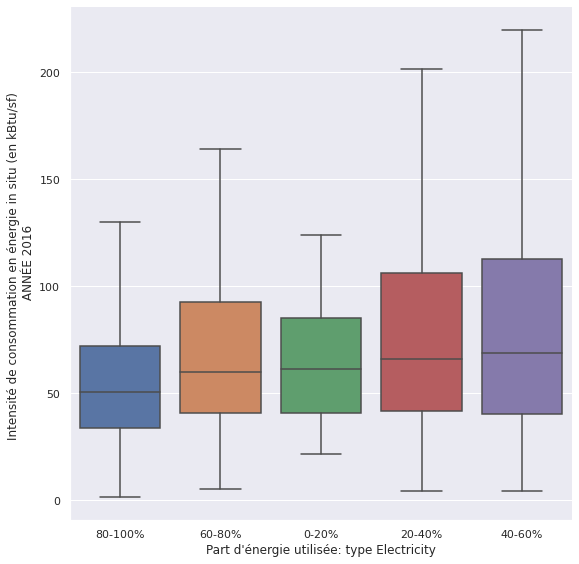

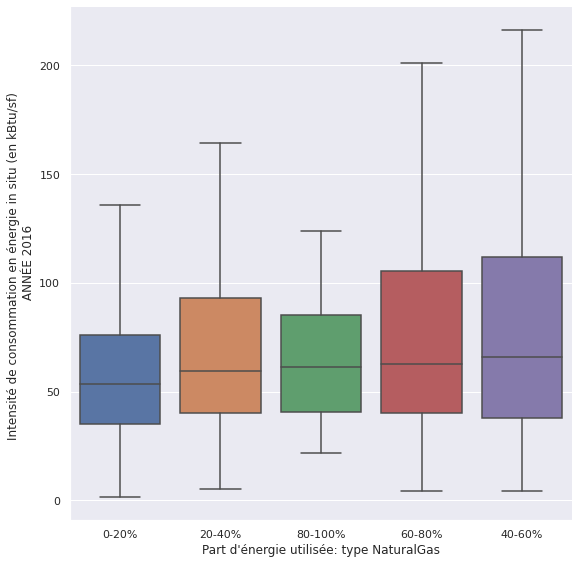

In [ ]:
for en in ['STEAM(kBtu)_part', 'Electricity(kBtu)_part', 'NaturalGas(kBtu)_part']:
    my_order = df_type_en.groupby(by=[en])['INT_CONSOMMATION_ENERG_SITE'].median().sort_values().index
    g = sns.catplot(data = df_type_en, y = 'INT_CONSOMMATION_ENERG_SITE' , x = en,
           height = 8., aspect = 1., kind = 'box', order = my_order, showfliers = False)
    g.set_ylabels('Intensité de consommation en énergie in situ (en kBtu/sf) \n ANNÉE 2016')
    g.set_xlabels('Part d\'énergie utilisée: type '+en[:-11])

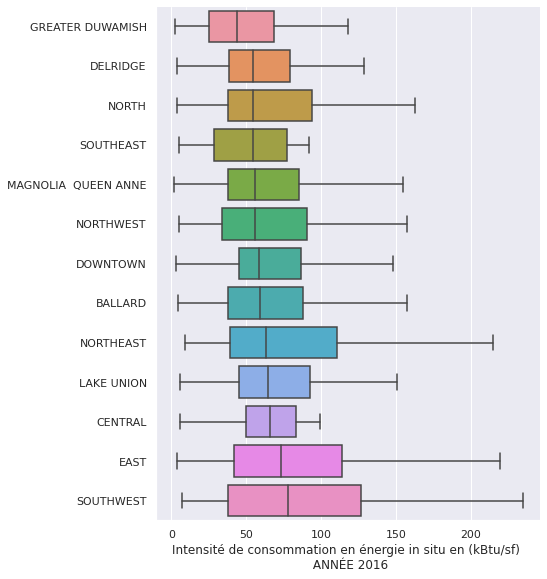

In [ ]:
my_order = df.groupby(by=['QUARTIER'])['INT_CONSOMMATION_ENERG_SITE'].median().sort_values().index
g = sns.catplot(data = df , x = 'INT_CONSOMMATION_ENERG_SITE' , y = 'QUARTIER',
           height = 8., aspect = 1., kind = 'box', orient = 'h',showfliers = False, order = my_order)
g.set_xlabels('Intensité de consommation en énergie in situ en (kBtu/sf) \n ANNÉE 2016')
g.set_ylabels('')

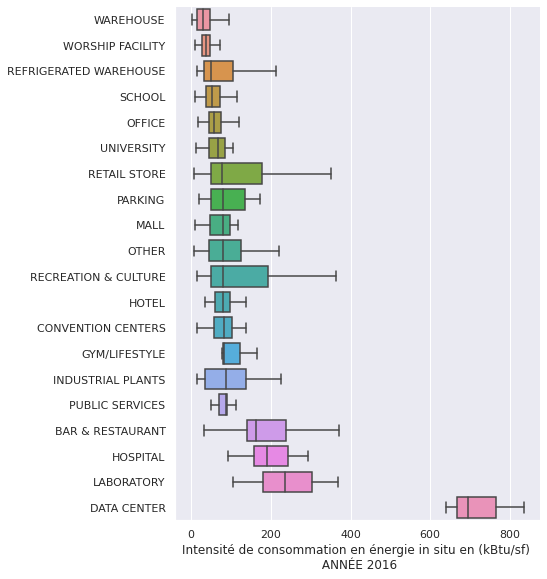

In [ ]:
my_order = df.groupby(by=['FONCTION_1'])['INT_CONSOMMATION_ENERG_SITE'].median().sort_values().index
g = sns.catplot(data = df , x = 'INT_CONSOMMATION_ENERG_SITE' , y = 'FONCTION_1',orient ='h',
           height = 8., aspect = 1., kind = 'box', order = my_order, showfliers = False)
g.set_xlabels('Intensité de consommation en énergie in situ en (kBtu/sf) \n ANNÉE 2016')
g.set_ylabels('')

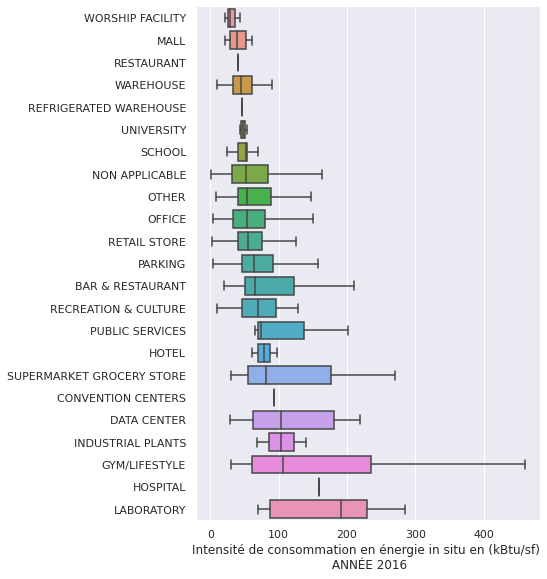

In [ ]:
my_order = df.groupby(by=['FONCTION_2'])['INT_CONSOMMATION_ENERG_SITE'].median().sort_values().index
g = sns.catplot(data = df , x = 'INT_CONSOMMATION_ENERG_SITE' , y = 'FONCTION_2',orient ='h',
           height = 8., aspect = 1., kind = 'box', order = my_order, showfliers = False)
g.set_xlabels('Intensité de consommation en énergie in situ en (kBtu/sf) \n ANNÉE 2016')
g.set_ylabels('')

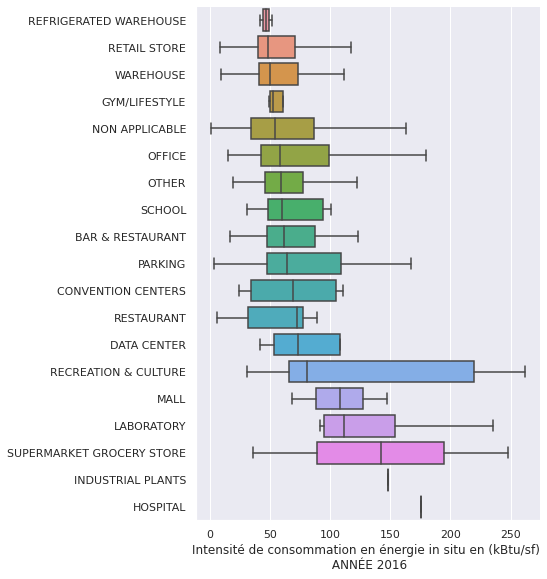

In [ ]:
my_order = df.groupby(by=['FONCTION_3'])['INT_CONSOMMATION_ENERG_SITE'].median().sort_values().index
g = sns.catplot(data = df , x = 'INT_CONSOMMATION_ENERG_SITE' , y = 'FONCTION_3',orient ='h',
           height = 8., aspect = 1., kind = 'box', order = my_order, showfliers = False)
g.set_xlabels('Intensité de consommation en énergie in situ en (kBtu/sf) \n ANNÉE 2016')
g.set_ylabels('')

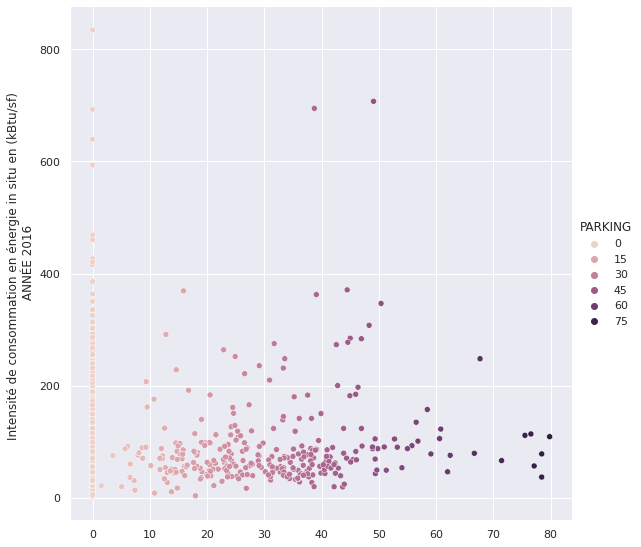

In [ ]:
#my_order = df.groupby(by=['ANNÉE_CONST_REN'])['INTENSITÉ_ÉMISSIONS'].median().sort_values().index
g = sns.relplot(data = df , y = 'INT_CONSOMMATION_ENERG_SITE' , x = 'PARKING',
           height = 8., aspect = 1., hue = 'PARKING')
g.set_ylabels('Intensité de consommation en énergie in situ en (kBtu/sf) \n ANNÉE 2016')
g.set_xlabels('')

- ### Intensité des émissions 

Text(0.5, 0, 'Année de construction ou rénovation')

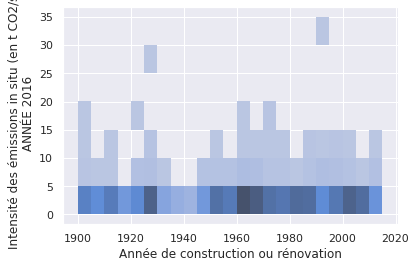

In [ ]:
g = sns.histplot(data = df , y = 'INTENSITÉ_ÉMISSIONS' , x = 'ANNÉE_CONST_REN',binwidth = 5)
          # height = 8., aspect = 1., hue = 'PARKING')
g.set_ylabel('Intensité des émissions in situ (en t CO2/sf) \n ANNÉE 2016')
g.set_xlabel('Année de construction ou rénovation')
#g.legend()

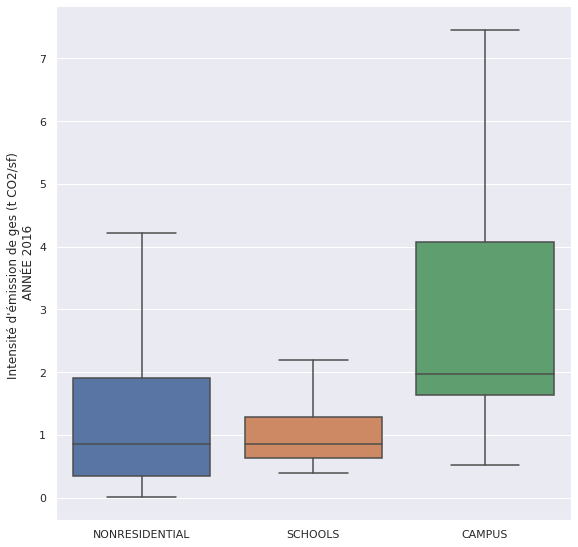

In [ ]:
my_order = df.groupby(by=['TYPE'])['INTENSITÉ_ÉMISSIONS'].median().sort_values().index
g = sns.catplot(data = df, y = 'INTENSITÉ_ÉMISSIONS' , x = 'TYPE',
           height = 8., aspect = 1., kind = 'box', order = my_order, showfliers = False)
g.set_ylabels('Intensité d\'émission de ges (t CO2/sf) \n ANNÉE 2016')
g.set_xlabels('')

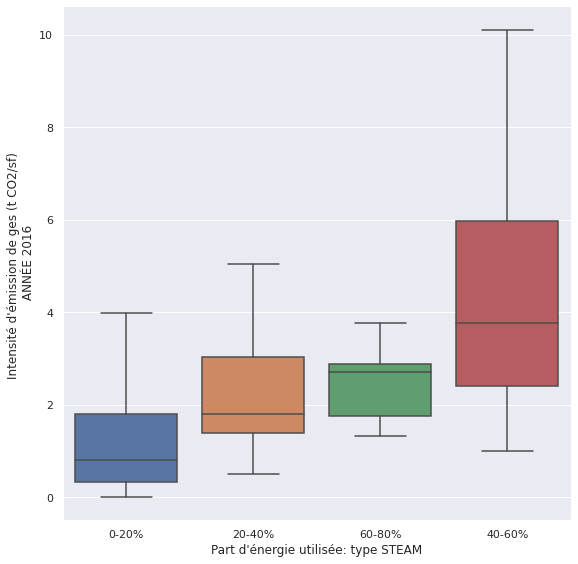

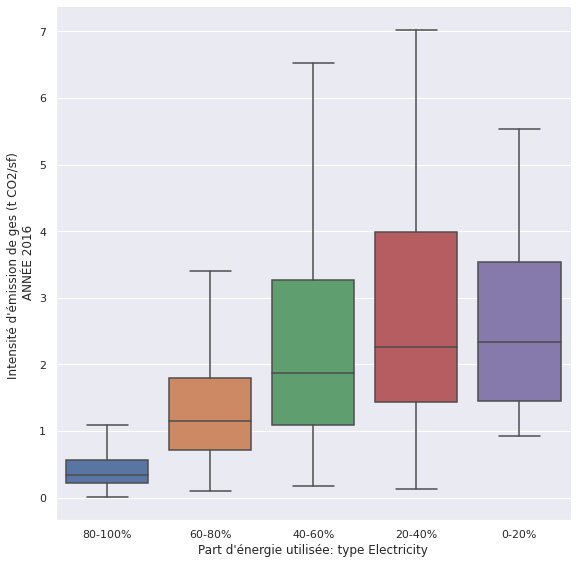

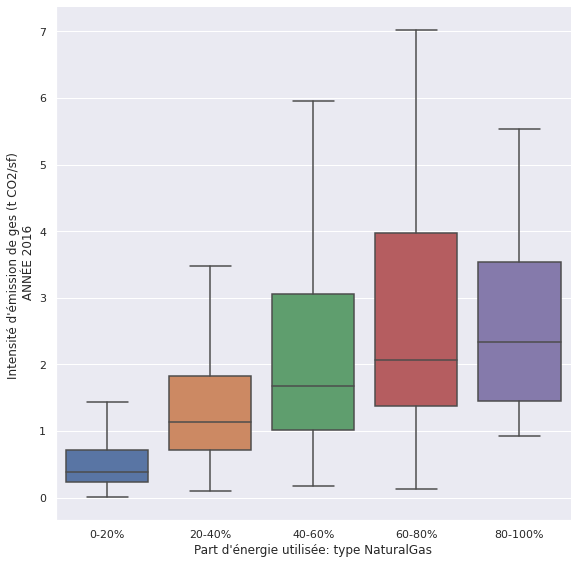

In [ ]:
for en in ['STEAM(kBtu)_part', 'Electricity(kBtu)_part', 'NaturalGas(kBtu)_part']:
    my_order = df_type_en.groupby(by=[en])['INTENSITÉ_ÉMISSIONS'].median().sort_values().index
    g = sns.catplot(data = df_type_en, y = 'INTENSITÉ_ÉMISSIONS' , x = en,
           height = 8., aspect = 1., kind = 'box', order = my_order, showfliers = False)
    g.set_ylabels('Intensité d\'émission de ges (t CO2/sf) \n ANNÉE 2016')
    g.set_xlabels('Part d\'énergie utilisée: type '+en[:-11])

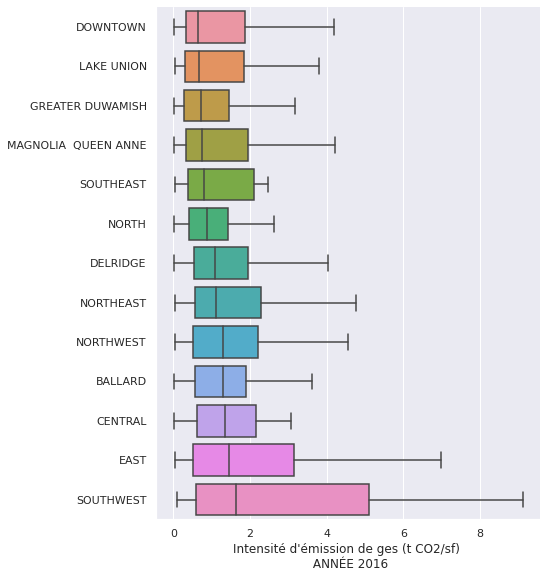

In [ ]:
my_order = df.groupby(by=['QUARTIER'])['INTENSITÉ_ÉMISSIONS'].median().sort_values().index
g = sns.catplot(data = df , x = 'INTENSITÉ_ÉMISSIONS' , y = 'QUARTIER',
           height = 8., aspect = 1., kind = 'box', orient = 'h',showfliers = False, order = my_order)
g.set_xlabels('Intensité d\'émission de ges (t CO2/sf) \n ANNÉE 2016')
g.set_ylabels('')

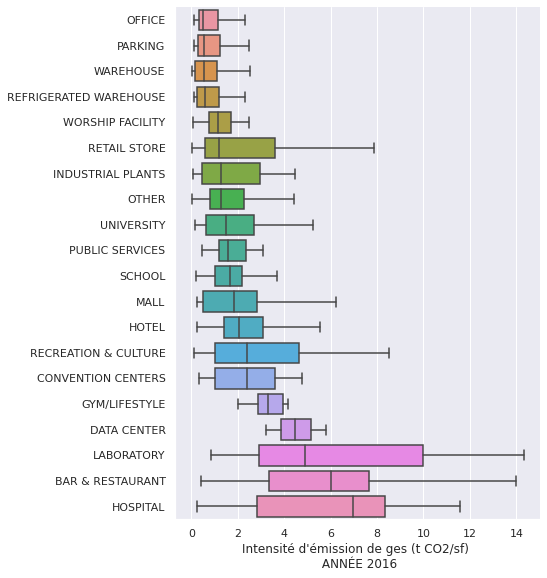

In [ ]:
my_order = df.groupby(by=['FONCTION_1'])['INTENSITÉ_ÉMISSIONS'].median().sort_values().index
g = sns.catplot(data = df , x = 'INTENSITÉ_ÉMISSIONS' , y = 'FONCTION_1',orient ='h',
           height = 8., aspect = 1., kind = 'box', order = my_order, showfliers = False)
g.set_xlabels('Intensité d\'émission de ges (t CO2/sf) \n ANNÉE 2016')
g.set_ylabels('')

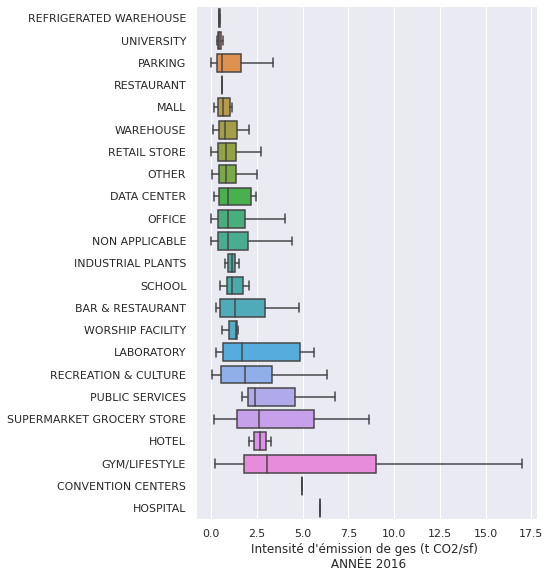

In [ ]:
my_order = df.groupby(by=['FONCTION_2'])['INTENSITÉ_ÉMISSIONS'].median().sort_values().index
g = sns.catplot(data = df , x = 'INTENSITÉ_ÉMISSIONS' , y = 'FONCTION_2',orient ='h',
           height = 8., aspect = 1., kind = 'box', order = my_order, showfliers = False)
g.set_xlabels('Intensité d\'émission de ges (t CO2/sf) \n ANNÉE 2016')
g.set_ylabels('')

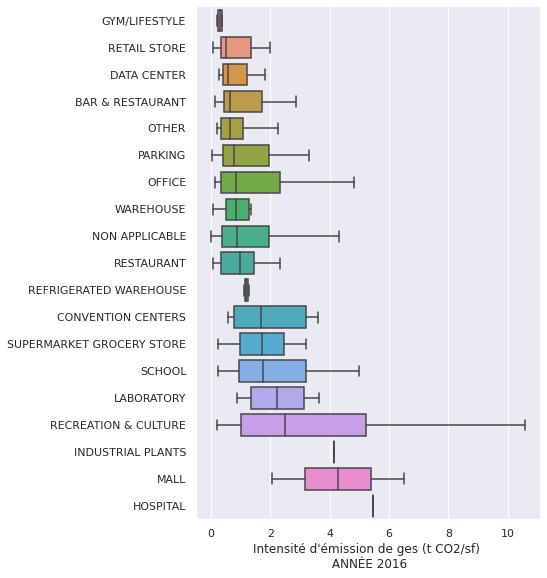

In [ ]:
my_order = df.groupby(by=['FONCTION_3'])['INTENSITÉ_ÉMISSIONS'].median().sort_values().index
g = sns.catplot(data = df , x = 'INTENSITÉ_ÉMISSIONS' , y = 'FONCTION_3',orient ='h',
           height = 8., aspect = 1., kind = 'box', order = my_order, showfliers = False)
g.set_xlabels('Intensité d\'émission de ges (t CO2/sf) \n ANNÉE 2016')
g.set_ylabels('')

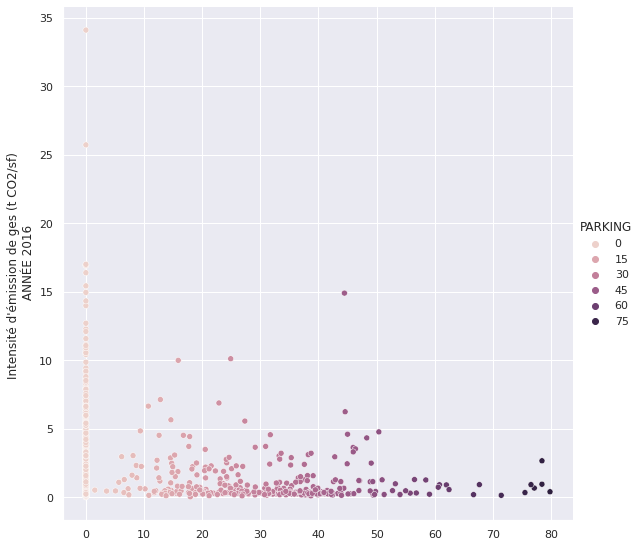

In [ ]:
#my_order = df.groupby(by=['ANNÉE_CONST_REN'])['INTENSITÉ_ÉMISSIONS'].median().sort_values().index
g = sns.relplot(data = df , y = 'INTENSITÉ_ÉMISSIONS' , x = 'PARKING',
           height = 8., aspect = 1., hue = 'PARKING')
g.set_ylabels('Intensité d\'émission de ges (t CO2/sf) \n ANNÉE 2016')
g.set_xlabels('')

- ### ENERGYSTARScore

Text(0.5, 0, 'Année de construction ou rénovation')

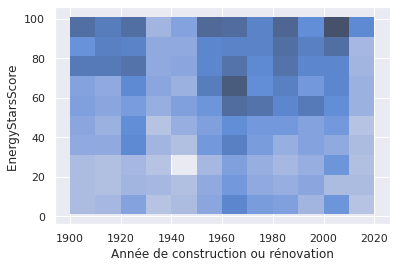

In [ ]:
#my_order = df.groupby(by=['ANNÉE_CONST_REN'])['ENERGYSTARScore'].median().sort_values().index

g = sns.histplot(data = df , y = 'ENERGYSTARScore' , x = 'ANNÉE_CONST_REN', binwidth = 10)
g.set_ylabel('EnergyStarsScore ')
g.set_xlabel('Année de construction ou rénovation')

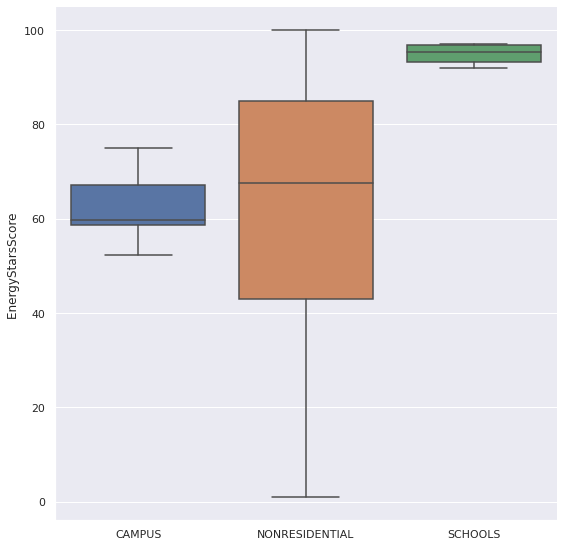

In [ ]:
my_order = df.groupby(by=['TYPE'])['ENERGYSTARScore'].median().sort_values().index
g = sns.catplot(data = df , y = 'ENERGYSTARScore' , x = 'TYPE',
           height = 8., aspect = 1., kind = 'box',showfliers = False, order = my_order)
g.set_ylabels('EnergyStarsScore ')
g.set_xlabels('')

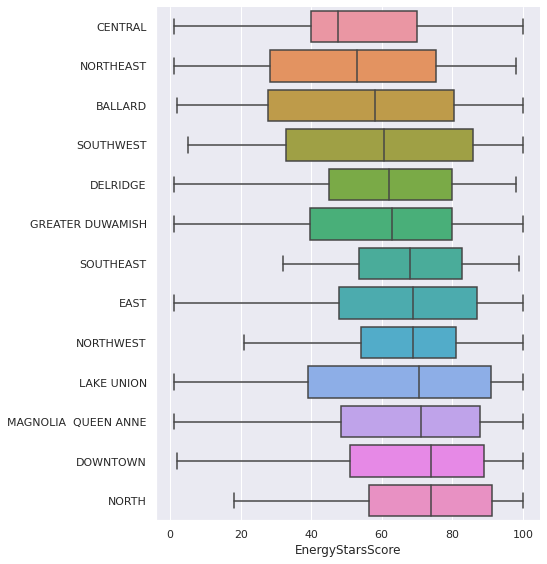

In [ ]:
my_order = df.groupby(by=['QUARTIER'])['ENERGYSTARScore'].median().sort_values().index
g = sns.catplot(data = df , x = 'ENERGYSTARScore' , y = 'QUARTIER',
           height = 8., aspect = 1., kind = 'box',showfliers = False, order = my_order)
g.set_xlabels('EnergyStarsScore')
g.set_ylabels('')

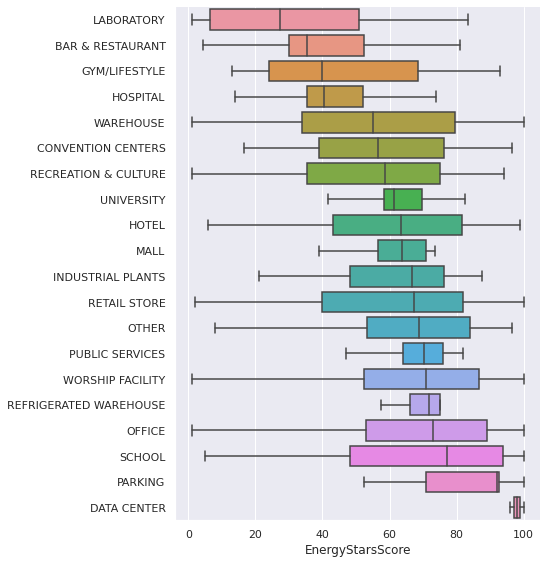

In [ ]:
my_order = df.groupby(by=['FONCTION_1'])['ENERGYSTARScore'].median().sort_values().index
g = sns.catplot(data = df , x = 'ENERGYSTARScore' , y = 'FONCTION_1',
           height = 8., aspect = 1., kind = 'box',showfliers = False, order = my_order)
g.set_xlabels('EnergyStarsScore')
g.set_ylabels('')

- ### Caractéristiques immeubles 

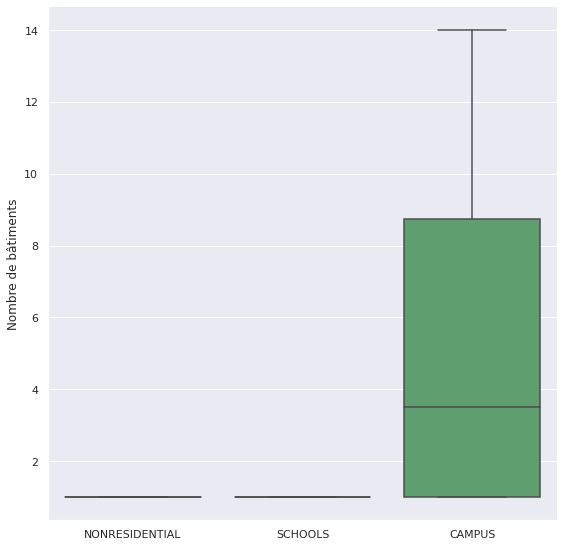

In [ ]:
my_order = df.groupby(by=['TYPE'])['NBRE_IMMEUBLE'].median().sort_values().index
g = sns.catplot(data = df , y = 'NBRE_IMMEUBLE' , x = 'TYPE',
           height = 8., aspect = 1., kind = 'box',showfliers = False, order = my_order)
g.set_ylabels('Nombre de bâtiments')
g.set_xlabels('')

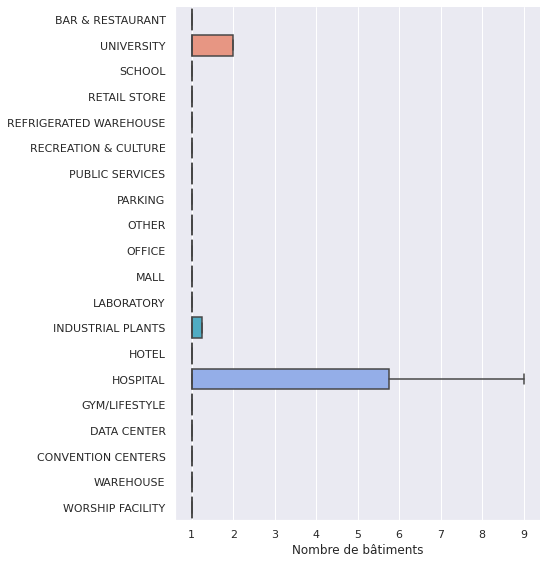

In [ ]:
my_order = df.groupby(by=['FONCTION_1'])['NBRE_IMMEUBLE'].median().sort_values().index
g = sns.catplot(data = df , x = 'NBRE_IMMEUBLE' , y = 'FONCTION_1',
           height = 8., aspect = 1., kind = 'box',showfliers = False, order = my_order)
g.set_xlabels('Nombre de bâtiments')
g.set_ylabels('')

## <a name="C43"> 4.3 Analyses multivariées </a>

## Analyse en composantes principales. 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df.isna().sum()

ID                                 0
TYPE                               0
FONCTION_1                         0
QUARTIER                           0
LATITUDE                           0
LONGITUDE                          0
ANNÉE_CONST_REN                    0
NBRE_IMMEUBLE                      0
NBRE_ÉTAGE                         0
SUPERFICIE_TOTALE                  0
SUPERFICIE_PARKING                 0
LargestPropertyUseTypeGFA          0
FONCTION_2                         0
SecondLargestPropertyUseTypeGFA    0
FONCTION_3                         0
ThirdLargestPropertyUseTypeGFA     0
INT_CONSOMMATION_ENERG_SITE        0
CONSOMMATION_ENERG_SITE            0
STEAM(kBtu)                        0
Electricity(kBtu)                  0
NaturalGas(kBtu)                   0
ÉMISSIONS_TOTALES                  0
INTENSITÉ_ÉMISSIONS                0
NAN_ENERGY                         0
ENERGYSTARScore                    0
PARKING                            0
STEAM(kBtu)_part                   0
E

In [ ]:
var_quant

['LATITUDE',
 'LONGITUDE',
 'NBRE_IMMEUBLE',
 'NBRE_ÉTAGE',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'CONSOMMATION_ENERG_SITE',
 'INT_CONSOMMATION_ENERG_SITE',
 'SUPERFICIE_TOTALE',
 'SUPERFICIE_PARKING',
 'PARKING',
 'ÉMISSIONS_TOTALES',
 'INTENSITÉ_ÉMISSIONS',
 'ANNÉE_CONST_REN',
 'ENERGYSTARScore']

In [ ]:
## Séparation des data
X = df[var_quant].values
feature = df[var_quant].columns
ind = df[var_quant].index
X, feature, ind

(array([[ 4.76122000e+01, -1.22337990e+02,  1.00000000e+00, ...,
          2.83000000e+00,  1.92700000e+03,  6.00000000e+01],
        [ 4.76131700e+01, -1.22333930e+02,  1.00000000e+00, ...,
          2.86000000e+00,  1.99600000e+03,  6.10000000e+01],
        [ 4.76139300e+01, -1.22338100e+02,  1.00000000e+00, ...,
          2.19000000e+00,  1.96900000e+03,  4.30000000e+01],
        ...,
        [ 4.76364400e+01, -1.22357840e+02,  1.00000000e+00, ...,
          1.69900000e+01,  1.97400000e+03,  3.65210032e+01],
        [ 4.75283200e+01, -1.22324310e+02,  1.00000000e+00, ...,
          1.57000000e+00,  1.98900000e+03,  6.74990375e+01],
        [ 4.75393900e+01, -1.22295360e+02,  1.00000000e+00, ...,
          2.26000000e+00,  1.93800000e+03,  7.74334042e+01]]),
 Index(['LATITUDE', 'LONGITUDE', 'NBRE_IMMEUBLE', 'NBRE_ÉTAGE',
        'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
        'ThirdLargestPropertyUseTypeGFA', 'CONSOMMATION_ENERG_SITE',
        'INT_CONSOMMATIO

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-6.95769671e-02, -1.74370412e-01, -1.20659380e-01, ...,
         4.81648168e-01, -1.05617481e+00, -8.54821754e-02],
       [-4.89784843e-02,  8.01723158e-04, -1.20659380e-01, ...,
         4.93996674e-01,  1.06166553e+00, -4.86661729e-02],
       [-3.28394669e-02, -1.79116455e-01, -1.20659380e-01, ...,
         2.18213368e-01,  2.32945398e-01, -7.11354217e-01],
       ...,
       [ 4.45172747e-01, -1.03081546e+00, -1.20659380e-01, ...,
         6.31014311e+00,  3.86412089e-01, -9.49884978e-01],
       [-1.85081484e+00,  4.15864762e-01, -1.20659380e-01, ...,
        -3.69890942e-02,  8.46812163e-01,  1.90602409e-01],
       [-1.61573731e+00,  1.66493700e+00, -1.20659380e-01, ...,
         2.47026549e-01, -7.18548090e-01,  5.56346077e-01]])

In [ ]:
#vérification 
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
mean  0.0 -0.0  0.0  0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       14   15  
mean -0.0 -0.0  
std   1.0  1.0

In [ ]:
n_components = 5
pca = PCA(n_components=n_components)
pca.fit(X_scaled) 
pca.explained_variance_ratio_

array([0.30412137, 0.15688172, 0.10286115, 0.06782356, 0.06560003])

In [ ]:
scree = (pca.explained_variance_ratio_*100).round(2) #on stocke les contributions dans la variable scree
scree

array([30.41, 15.69, 10.29,  6.78,  6.56])

[30. 46. 56. 63. 70.]


Text(0.5, 1.0, 'Éboulis des valeurs propres')

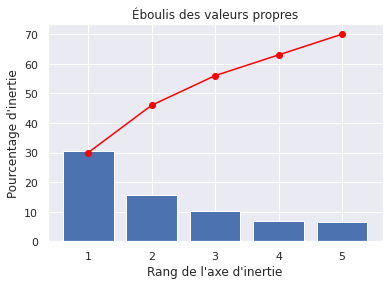

In [ ]:
scree_cum = scree.cumsum().round()
print(scree_cum)

#Définisons ensuite une variable avec la liste de nos composantes :
x_list = range(1, n_components+1)
list(x_list)

fig = plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Éboulis des valeurs propres")
#plt.savefig('P3_N2_41a.png',dpi = 150,bbox_inches = 'tight')

In [ ]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = feature
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

LATITUDE  LONGITUDE  NBRE_IMMEUBLE  NBRE_ÉTAGE  LargestPropertyUseTypeGFA  \
F1      0.01       0.01           0.09        0.30                       0.40   
F2     -0.01       0.04           0.13       -0.23                      -0.09   
F3     -0.26       0.09           0.12        0.03                       0.16   
F4      0.58      -0.53           0.52       -0.07                       0.07   
F5     -0.23       0.52           0.63       -0.13                       0.10   

    SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
F1                             0.38                            0.25   
F2                            -0.08                            0.10   
F3                             0.08                            0.15   
F4                            -0.07                           -0.20   
F5                            -0.12                           -0.32   

    CONSOMMATION_ENERG_SITE  INT_CONSOMMATION_ENERG_SITE  SUPERFICIE_TOTALE  \
F1                     0.37                         0.10               0.41   
F2                     0.27                         0.41              -0.16   
F3                     0.11                        -0.40               0.10   
F4                     0.06                        -0.07               0.02   
F5                     0.02                        -0.07               0.05   

    SUPERFICIE_PARKING  PARKING  ÉMISSIONS_TOTALES  INTENSITÉ_ÉMISSIONS  \
F1                0.27     0.15               0.31                 0.11   
F2               -0.31    -0.24               0.34                 0.51   
F3               -0.33    -0.52               0.15                -0.18   
F4               -0.09    -0.04               0.09                -0.06   
F5                0.03     0.06               0.03                -0.14   

    ANNÉE_CONST_REN  ENERGYSTARScore  
F1             0.13             0.03  
F2            -0.08            -0.32  
F3            -0.41             0.27  
F4            -0.00             0.20  
F5             0.29            -0.13

In [ ]:
pcs.T

F1        F2        F3        F4  \
LATITUDE                         0.006020 -0.012230 -0.259796  0.575311   
LONGITUDE                        0.010385  0.038347  0.089110 -0.526525   
NBRE_IMMEUBLE                    0.089830  0.132779  0.121322  0.519348   
NBRE_ÉTAGE                       0.300090 -0.226574  0.025740 -0.073623   
LargestPropertyUseTypeGFA        0.400829 -0.094848  0.156084  0.073780   
SecondLargestPropertyUseTypeGFA  0.378855 -0.080234  0.075814 -0.070610   
ThirdLargestPropertyUseTypeGFA   0.246522  0.102155  0.152922 -0.198159   
CONSOMMATION_ENERG_SITE          0.371040  0.270915  0.111317  0.061975   
INT_CONSOMMATION_ENERG_SITE      0.104909  0.409304 -0.396606 -0.065108   
SUPERFICIE_TOTALE                0.405302 -0.157827  0.101726  0.024021   
SUPERFICIE_PARKING               0.273450 -0.312559 -0.326961 -0.088764   
PARKING                          0.151380 -0.239045 -0.522754 -0.035527   
ÉMISSIONS_TOTALES                0.308505  0.339808  0.149189  0.089035   
INTENSITÉ_ÉMISSIONS              0.111780  0.510937 -0.175173 -0.055120   
ANNÉE_CONST_REN                  0.132128 -0.082025 -0.411352 -0.001942   
ENERGYSTARScore                  0.031594 -0.315627  0.270784  0.195404   

                                       F5  
LATITUDE                        -0.225546  
LONGITUDE                        0.518250  
NBRE_IMMEUBLE                    0.630425  
NBRE_ÉTAGE                      -0.133542  
LargestPropertyUseTypeGFA        0.097879  
SecondLargestPropertyUseTypeGFA -0.115293  
ThirdLargestPropertyUseTypeGFA  -0.323004  
CONSOMMATION_ENERG_SITE          0.015384  
INT_CONSOMMATION_ENERG_SITE     -0.071411  
SUPERFICIE_TOTALE                0.049558  
SUPERFICIE_PARKING               0.029622  
PARKING                          0.063750  
ÉMISSIONS_TOTALES                0.028936  
INTENSITÉ_ÉMISSIONS             -0.144150  
ANNÉE_CONST_REN                  0.293680  
ENERGYSTARScore                 -0.132187

<Axes: >

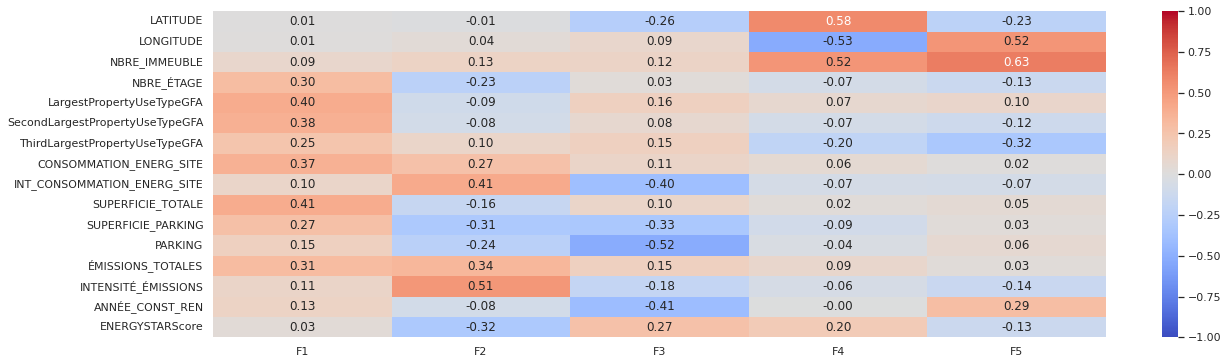

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
#plt.savefig('P3_N2_41b.png',dpi = 150,bbox_inches = 'tight')

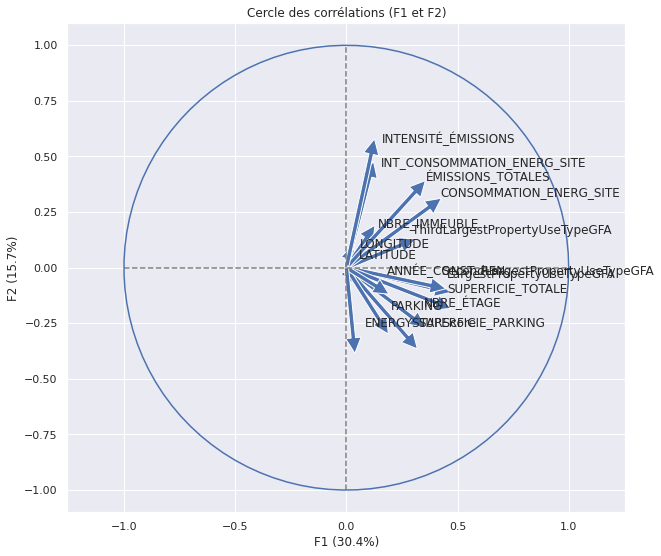

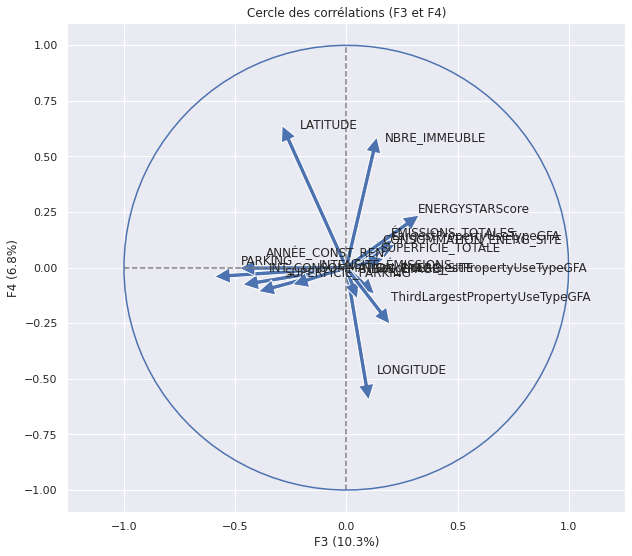

In [ ]:
#fig, ax = 
plot_.correlation_graph(pca, (0,1), feature)
#fig.savefig('P3_N2_41c1.png',dpi = 150,bbox_inches = 'tight')
plot_.correlation_graph(pca, (2,3), feature)
#fig, ax = plot_.correlation_graph(pca, (2,3), feature)
#fig1.savefig('P3_N2_41c2.png',dpi = 150,bbox_inches = 'tight')
#plot_.correlation_graph(pca, (4,5), feature)

In [ ]:
X_proj = pca.transform(X_scaled) #Apply dimensionality reduction to X.
X_proj[:5]

array([[-0.12923965,  0.3534953 ,  0.58827827, -0.04378787, -0.63585128],
       [ 0.6037497 , -0.03302572, -0.90314783, -0.25042931,  0.03714625],
       [ 8.0254844 , -1.84965473, -0.47104497, -0.12196261,  0.18601475],
       [-0.22158523,  1.06365814,  0.2313284 , -0.13525132, -0.7203382 ],
       [ 2.16676471, -1.00232857, -1.59414944, -0.19133901, -0.34781982]])

In [ ]:
labels = df['FONCTION_1'].values.tolist()

# <a name="C5">5. Feature Engineering </a>

Jusqu'ici : 

- Missing data imputation : à l'aide de l'algorithme KNN-Imputer pour la variable ENERGYSTARScores, mention 'NON APPLICABLE' pour les PropertyUseType et valeur 0. pour les PropertyUseTypeGFA manquantes
- Variable discretization : pour l'année de construction

Ce que je prévois de faire dans la suite : 

- Categorical variable encoding
- Handling Outliers
- Scaling the features (Propre à chaque algorithme de ML utilisé)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               1459 non-null   object 
 1   TYPE                             1459 non-null   object 
 2   FONCTION_1                       1459 non-null   object 
 3   QUARTIER                         1459 non-null   object 
 4   LATITUDE                         1459 non-null   float64
 5   LONGITUDE                        1459 non-null   float64
 6   ANNÉE_CONST_REN                  1459 non-null   int64  
 7   NBRE_IMMEUBLE                    1459 non-null   float64
 8   NBRE_ÉTAGE                       1459 non-null   int64  
 9   SUPERFICIE_TOTALE                1459 non-null   int64  
 10  SUPERFICIE_PARKING               1459 non-null   int64  
 11  LargestPropertyUseTypeGFA        1459 non-null   float64
 12  FONCTION_2          

In [ ]:
from google.colab import files
df.to_csv('/content/Fichier_N1/'+'df_set0.csv') 


## <a name="C51"> 5.1 Set 3 : one_Hot encoding modifié, FONCTION_1 </a>

Pour cette encodage, il est plus simple de procéder "à la main" et non par le biais des pipeline implémenter dans les notebook 2 et 3. 

Démarche : 

- One-hot encoding sur les usages principaux FONCTION_1
- multiplication des 1 par des coefficients de pondération qui représente la part des usages sur les usages totaux. 

L'étude du feature importance de l'algorithme XGBoost me pousse à revoir le feature engineering pour améliorer le résultats, et notamment, affiné le one-hot encoding des usages principaux. 

In [ ]:
from category_encoders import *

# OneHotEncoder
enc = OneHotEncoder(cols=['FONCTION_1'], 
                    use_cat_names= True).fit(df.sort_values('FONCTION_1'))

# transform the dataset
df = enc.transform(df)

In [ ]:
df.columns

Index(['ID', 'TYPE', 'FONCTION_1_BAR & RESTAURANT',
       'FONCTION_1_CONVENTION CENTERS', 'FONCTION_1_DATA CENTER',
       'FONCTION_1_GYM/LIFESTYLE', 'FONCTION_1_HOSPITAL', 'FONCTION_1_HOTEL',
       'FONCTION_1_INDUSTRIAL PLANTS', 'FONCTION_1_LABORATORY',
       'FONCTION_1_MALL', 'FONCTION_1_OFFICE', 'FONCTION_1_OTHER',
       'FONCTION_1_PARKING', 'FONCTION_1_PUBLIC SERVICES',
       'FONCTION_1_RECREATION & CULTURE', 'FONCTION_1_REFRIGERATED WAREHOUSE',
       'FONCTION_1_RETAIL STORE', 'FONCTION_1_SCHOOL', 'FONCTION_1_UNIVERSITY',
       'FONCTION_1_WAREHOUSE', 'FONCTION_1_WORSHIP FACILITY', 'QUARTIER',
       'LATITUDE', 'LONGITUDE', 'ANNÉE_CONST_REN', 'NBRE_IMMEUBLE',
       'NBRE_ÉTAGE', 'SUPERFICIE_TOTALE', 'SUPERFICIE_PARKING',
       'LargestPropertyUseTypeGFA', 'FONCTION_2',
       'SecondLargestPropertyUseTypeGFA', 'FONCTION_3',
       'ThirdLargestPropertyUseTypeGFA', 'INT_CONSOMMATION_ENERG_SITE',
       'CONSOMMATION_ENERG_SITE', 'STEAM(kBtu)', 'Electricity(kBtu)',
 

In [ ]:
df['part1'] = round((df['LargestPropertyUseTypeGFA']/df['SUPERFICIE_TOTALE']),2)

df.loc[df['part1'] > 1]

#Anomalie : pour 154 indivifus, la surface totale PropertyGFATotal, est inférieur à la surface 'LargestPropertyUseTypeGFA'
#Je choisie de maximiser la variable part1 par la valeur 1

#df['part2'] = round((df['SecondLargestPropertyUseTypeGFA']/df['SUPERFICIE_TOTALE']),2)
#df['part3'] = round((df['ThirdLargestPropertyUseTypeGFA']/ df['SUPERFICIE_TOTALE']),2)

df.loc[df['part1'] > 1] = 1

ls_fonc = ['FONCTION_1_BAR & RESTAURANT',
       'FONCTION_1_CONVENTION CENTERS', 'FONCTION_1_DATA CENTER',
       'FONCTION_1_GYM/LIFESTYLE', 'FONCTION_1_HOSPITAL', 'FONCTION_1_HOTEL',
       'FONCTION_1_INDUSTRIAL PLANTS', 'FONCTION_1_LABORATORY',
       'FONCTION_1_MALL', 'FONCTION_1_OFFICE', 'FONCTION_1_OTHER',
       'FONCTION_1_PARKING', 'FONCTION_1_PUBLIC SERVICES',
       'FONCTION_1_RECREATION & CULTURE', 'FONCTION_1_REFRIGERATED WAREHOUSE',
       'FONCTION_1_RETAIL STORE', 'FONCTION_1_SCHOOL', 'FONCTION_1_UNIVERSITY',
       'FONCTION_1_WAREHOUSE', 'FONCTION_1_WORSHIP FACILITY']

for fonc in ls_fonc:
  df[fonc] = df[fonc]*df['part1']



In [ ]:
df

ID            TYPE  FONCTION_1_BAR & RESTAURANT  \
0         1  NONRESIDENTIAL                          0.0   
1         2  NONRESIDENTIAL                          0.0   
2         3  NONRESIDENTIAL                          0.0   
3         5  NONRESIDENTIAL                          0.0   
4         8  NONRESIDENTIAL                          0.0   
...     ...             ...                          ...   
1454  50221  NONRESIDENTIAL                          0.0   
1455  50223  NONRESIDENTIAL                          0.0   
1456  50224  NONRESIDENTIAL                          0.0   
1457  50225  NONRESIDENTIAL                          0.0   
1458  50226  NONRESIDENTIAL                          0.0   

      FONCTION_1_CONVENTION CENTERS  FONCTION_1_DATA CENTER  \
0                               0.0                     0.0   
1                               0.0                     0.0   
2                               0.0                     0.0   
3                               0.0                     0.0   
4                               0.0                     0.0   
...                             ...                     ...   
1454                            0.0                     0.0   
1455                            0.0                     0.0   
1456                            0.0                     0.0   
1457                            0.0                     0.0   
1458                            0.0                     0.0   

      FONCTION_1_GYM/LIFESTYLE  FONCTION_1_HOSPITAL  FONCTION_1_HOTEL  \
0                          0.0                  0.0            1.0000   
1                          0.0                  0.0            0.6561   
2                          0.0                  0.0            0.6241   
3                          0.0                  0.0            1.0000   
4                          0.0                  0.0            0.4900   
...                        ...                  ...               ...   
1454                       0.0                  0.0            0.0000   
1455                       0.0                  0.0            0.0000   
1456                       0.0                  0.0            0.0000   
1457                       0.0                  0.0            0.0000   
1458                       0.0                  0.0            0.0000   

      FONCTION_1_INDUSTRIAL PLANTS  FONCTION_1_LABORATORY  ...  \
0                              0.0                    0.0  ...   
1                              0.0                    0.0  ...   
2                              0.0                    0.0  ...   
3                              0.0                    0.0  ...   
4                              0.0                    0.0  ...   
...                            ...                    ...  ...   
1454                           0.0                    0.0  ...   
1455                           0.0                    0.0  ...   
1456                           0.0                    0.0  ...   
1457                           0.0                    0.0  ...   
1458                           0.0                    0.0  ...   

      NaturalGas(kBtu)  ÉMISSIONS_TOTALES  INTENSITÉ_ÉMISSIONS  NAN_ENERGY  \
0         1.276453e+06             249.98                 2.83           0   
1         5.145082e+06             295.86                 2.86           0   
2         1.493800e+06            2089.28                 2.19           0   
3         1.811213e+06             286.43                 4.67           0   
4         8.803998e+06             505.01                 2.88           0   
...                ...                ...                  ...         ...   
1454      2.997200e+05              20.33                 1.11           1   
1455      5.537300e+05              32.17                 2.01           1   
1456      3.973739e+06             223.54                16.99           1   
1457      3.706010e+05              22.11                 1.57           1   
145

In [ ]:
from google.colab import files
df.to_csv('Fichier_N1/'+'df_set3.csv') 

In [ ]:
!zip -r Fichier_N1.zip Fichier_N1

updating: Fichier_N1/ (stored 0%)
updating: Fichier_N1/P4_N1_GHG.png (deflated 20%)
updating: Fichier_N1/df_set3.csv (deflated 74%)
updating: Fichier_N1/df_set0.csv (deflated 67%)
updating: Fichier_N1/P4_N1_SEUI.png (deflated 22%)


In [ ]:
files.download('Fichier_N1.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>